# Overview

- SmarAct in magnet, and Zaber driven as close to the Hall elements as possible
- Computer fan zip-tied to 80-20.
- Magnet ramp from 700k (ADC power supply) to 390k. High end constrained by warm water, low end constrained by NMR range.
    - Started at high current and let the magnet equilibrate for ~1-2 hours before ramping down in small steps.
    - After a change of current, wait until the NMR can make a reading, and allow >=3 readings from NMR + Hall probe.
    - Current ADC changed by 10k each step.
    - Temperature of slow controls in one LabView instance (3 min between, but could probably do much shorter as the process is independent)
    - Hall probe, NMR, SmarAct readout, Zaber readout, magnet current and magnet voltage in faster slow scan -- 5 seconds period but in reality takes ~20 seconds (depends on if NMR is searching)
    - Entire measurement ~30-45 min. Temperature change small in this time, which decouples us from temperature dependence.
- Want to analyze the data and determine if this test worked. If all is good, I will repeat this measurement for several Hall probes next week.
----------------------
- To Do:
    - Load / process data
        - Headers will be incorrect in slow controls.
    - Plotting
    - Quantitative statement about non-linearity
    - Estimates of location of NMR vs. Hall probe and associated uncertainties or corrections

# Imports

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import lmfit as lm
#from dateutil import parser
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline

# local imports
from plotting import config_plots, datetime_plt
from load_slow import *
from Zaber_Magnet_Convert import *
# hallprobecalib package
from hallprobecalib.hpcplots import scatter3d
from mu2e.mu2eplots import mu2e_plot3d

In [3]:
config_plots()

In [4]:
ddir = '/home/ckampa/Dropbox/LogFiles/'

In [5]:
# # 7-7-21 14:38, first Hall probe test, probe 3
# plotdir = '/home/ckampa/data/hallprobecalib_extras/plots/hall_probe_B/07-07-21_14:38/'
# slowfile = ddir+'2021-07-07 144402slow.txt'
# slowtempfile = ddir+'2021-07-07 143831slow.txt'

In [149]:
# # 7-13-21 09:23, probe 4
# plotdir = '/home/ckampa/data/hallprobecalib_extras/plots/hall_probe_B/07-13-21_09:23/'
# slowfile = ddir+'2021-07-13 092109slow.txt'
# slowtempfile = ddir+'2021-07-13 092355slow.txt'

In [159]:
# # 7-13-21 10:58, probe 5
# plotdir = '/home/ckampa/data/hallprobecalib_extras/plots/hall_probe_B/07-13-21_10:58/'
# slowfile = ddir+'2021-07-13 105438slow.txt'
# slowtempfile = ddir+'2021-07-13 105819slow.txt'

In [222]:
# # 7-13-21 11:56, probe 6
# plotdir = '/home/ckampa/data/hallprobecalib_extras/plots/hall_probe_B/07-13-21_11:56/'
# slowfile = ddir+'2021-07-13 115541slow.txt'
# slowtempfile = ddir+'2021-07-13 115646slow.txt'

In [290]:
# # 7-13-21 12:58, probe 8
# plotdir = '/home/ckampa/data/hallprobecalib_extras/plots/hall_probe_B/07-13-21_12:58/'
# slowfile = ddir+'2021-07-13 125703slow.txt'
# slowtempfile = ddir+'2021-07-13 125802slow.txt'

In [381]:
# # 7-13-21 13:56, probe 2
# plotdir = '/home/ckampa/data/hallprobecalib_extras/plots/hall_probe_B/07-13-21_13:56/'
# slowfile = ddir+'2021-07-13 135623slow.txt'
# slowtempfile = ddir+'2021-07-13 135631slow.txt'

In [452]:
# # 7-15-21 09:32, probe 9 -- new xy position
# plotdir = '/home/ckampa/data/hallprobecalib_extras/plots/hall_probe_B/07-15-21_09:32/'
# slowfile = ddir+'2021-07-15 093154slow.txt'
# slowtempfile = ddir+'2021-07-15 093253slow.txt'

In [559]:
# # 7-15-21 10:16, probe 9 -- old xy position
# plotdir = '/home/ckampa/data/hallprobecalib_extras/plots/hall_probe_B/07-15-21_10:16/'
# slowfile = ddir+'2021-07-15 101614slow.txt'
# slowtempfile = ddir+'2021-07-15 101620slow.txt'

In [651]:
# # 7-15-21 10:16, probe 9 -- old xy position, flipped current
# plotdir = '/home/ckampa/data/hallprobecalib_extras/plots/hall_probe_B/07-15-21_10:45/'
# slowfile = ddir+'2021-07-15 104540slow.txt'
# slowtempfile = ddir+'2021-07-15 104546slow.txt'

In [767]:
# # 7-15-21 12:04, probe 10 -- old xy position
# plotdir = '/home/ckampa/data/hallprobecalib_extras/plots/hall_probe_B/07-15-21_12:04/'
# slowfile = ddir+'2021-07-15 120353slow.txt'
# slowtempfile = ddir+'2021-07-15 120401slow.txt'

In [843]:
# 7-15-21 12:53, probe 5 -- old xy position -- repeat
plotdir = '/home/ckampa/data/hallprobecalib_extras/plots/hall_probe_B/07-15-21_12:53/'
slowfile = ddir+'2021-07-15 125338slow.txt'
slowtempfile = ddir+'2021-07-15 125348slow.txt'

# Load Data

In [844]:
# temperature
df_temp = load_data(slowtempfile)

In [845]:
df_temp

Time  Magnet Current [A]  \
Datetime                                                         
2021-07-15 12:53:49  7/15/2021 12:53:49 PM                 0.0   
2021-07-15 12:54:10  7/15/2021 12:54:10 PM                 0.0   
2021-07-15 12:57:10  7/15/2021 12:57:10 PM                 0.0   
2021-07-15 13:00:10   7/15/2021 1:00:10 PM                 0.0   
2021-07-15 13:03:10   7/15/2021 1:03:10 PM                 0.0   
2021-07-15 13:06:10   7/15/2021 1:06:10 PM                 0.0   
2021-07-15 13:09:10   7/15/2021 1:09:10 PM                 0.0   
2021-07-15 13:12:10   7/15/2021 1:12:10 PM                 0.0   
2021-07-15 13:15:10   7/15/2021 1:15:10 PM                 0.0   
2021-07-15 13:18:10   7/15/2021 1:18:10 PM                 0.0   
2021-07-15 13:21:10   7/15/2021 1:21:10 PM                 0.0   
2021-07-15 13:24:10   7/15/2021 1:24:10 PM                 0.0   
2021-07-15 13:27:10   7/15/2021 1:27:10 PM                 0.0   
2021-07-15 13:30:10   7/15/2021 1:30:10 PM                 0.0   
2021-07-15 13:33:10   7/15/2021 1:33:10 PM                 0.0   
2021-07-15 13:36:10   7/15/2021 1:36:10 PM                 0.0   
2021-07-15 13:39:10   7/15/2021 1:39:10 PM                 0.0   
2021-07-15 13:42:10   7/15/2021 1:42:10 PM                 0.0   
2021-07-15 13:45:10   7/15/2021 1:45:10 PM                 0.0   
2021-07-15 13:48:10   7/15/2021 1:48:10 PM                 0.0   
2021-07-15 13:51:10   7/15/2021 1:51:10 PM                 0.0   
2021-07-15 13:54:12   7/15/2021 1:54:12 PM                 0.0   

                     Magnet Voltage [V]     Coil 1     Coil 2  LCW in Coil1  \
Datetime                                                                      
2021-07-15 12:53:49                 0.0  28.723753  28.350193     26.147352   
2021-07-15 12:54:10                 0.0  32.649696  32.476399     28.688984   
2021-07-15 12:57:10                 0.0  35.813179  35.429634     28.578852   
2021-07-15 13:00:10                 0.0  37.625103  37.066910     28.529280   
2021-07-15 13:03:10                 0.0  38.427139  37.673962     28.484631   
2021-07-15 13:06:10                 0.0  38.437603  37.644352     28.463880   
2021-07-15 13:09:10                 0.0  38.028328  37.190052     28.455120   
2021-07-15 13:12:10                 0.0  37.287952  36.410610     28.482819   
2021-07-15 13:15:10                 0.0  36.296356  35.473766     28.450060   
2021-07-15 13:18:10                 0.0  35.324902  34.541893     28.407007   
2021-07-15 13:21:10                 0.0  34.503513  33.789906     28.496225   
2021-07-15 13:24:10                 0.0  33.952148  33.289841     28.572022   
2021-07-15 13:27:10                 0.0  33.503475  32.919930     28.616377   
2021-07-15 13:30:10                 0.0  33.195564  32.676128     28.581884   
2021-07-15 13:33:10                 0.0  32.984489  32.513989     28.630117   
2021-07-15 13:36:10                 0.0  32.843800  32.361492     28.646046   
2021-07-15 13:39:10                 0.0  32.708714  32.263615     28.634764   
2021-07-15 13:42:10                 0.0  32.612740  32.182732     28.589346   
2021-07-15 13:45:10                 0.0  32.530369  32.148655     28.568064   
2021-07-15 13:48:10                 0.0  32.463352  32.086475     28.582829   
2021-07-15 13:51:10                 0.0  32.399845  32.073608     28.558456   
2021-07-15 13:54:12                 0.0  32.407059  32.009934     28.507172   

                     LCW out Coil 1  LCW in Coil 2  LCW out Coil 2  \
Datetime                                                             
2021-07-15 12:53:49       25.752577      25.034712       26.927084   
2021-07-15 12:54:10       28.388285      26.955223       29.918387   
2021-07-15 12:57:10       28.690264      27.414257       30.818890   
2021-07-15 13:00:10       28.929363      27.592960       31.364222   
2021-07-15 13:03:10       29.065458      27.613113       31.624399   
2021-07-15 13:06:10       28.988096      27.655548       31.576042

In [846]:
df_headers = load_data(slowfile, header=None)
cols = list(df_headers.columns)

In [847]:
cols[0:3]

['Time', 'Magnet Current [A]', 'Magnet Voltage [V]']

In [848]:
cols[44:-6]

['NMR [FFT]',
 'DF0000000D5E803A_Raw_X',
 'DF0000000D5E803A_Raw_Y',
 'DF0000000D5E803A_Raw_Z',
 'DF0000000D5E803A_Raw_T',
 'DF0000000D5E803A_Cal_X',
 'DF0000000D5E803A_Cal_Y',
 'DF0000000D5E803A_Cal_Z',
 'DF0000000D5E803A_Cal_T',
 'Zaber_Meas_Encoder_X',
 'Zaber_Meas_Micron_X',
 'Zaber_Meas_Encoder_Y',
 'Zaber_Meas_Micron_Y',
 'Zaber_Meas_Encoder_Z',
 'Zaber_Meas_Micron_Z',
 'SmarAct_Meas_Angle_1',
 'SmarAct_Meas_Rotation_Angle_1',
 'SmarAct_Meas_Angle_2',
 'SmarAct_Meas_Rotation_Angle_2']

In [849]:
# ACCOUNTS FOR FLIPPED MICRON/ENCODER
main_header = cols[0:3] + cols[43:53] +\
['Zaber_Meas_Micron_X', 'Zaber_Meas_Encoder_X', 'Zaber_Meas_Micron_Y', 'Zaber_Meas_Encoder_Y',
 'Zaber_Meas_Micron_Z', 'Zaber_Meas_Encoder_Z'] + cols[59:-6] #+ ['']
main_header

['Time',
 'Magnet Current [A]',
 'Magnet Voltage [V]',
 'NMR [T]',
 'NMR [FFT]',
 'DF0000000D5E803A_Raw_X',
 'DF0000000D5E803A_Raw_Y',
 'DF0000000D5E803A_Raw_Z',
 'DF0000000D5E803A_Raw_T',
 'DF0000000D5E803A_Cal_X',
 'DF0000000D5E803A_Cal_Y',
 'DF0000000D5E803A_Cal_Z',
 'DF0000000D5E803A_Cal_T',
 'Zaber_Meas_Micron_X',
 'Zaber_Meas_Encoder_X',
 'Zaber_Meas_Micron_Y',
 'Zaber_Meas_Encoder_Y',
 'Zaber_Meas_Micron_Z',
 'Zaber_Meas_Encoder_Z',
 'SmarAct_Meas_Angle_1',
 'SmarAct_Meas_Rotation_Angle_1',
 'SmarAct_Meas_Angle_2',
 'SmarAct_Meas_Rotation_Angle_2']

In [850]:
len(main_header)

23

In [851]:
# main data
df = load_data(slowfile, header=main_header)

In [852]:
df

Time  Magnet Current [A]  \
Datetime                                                         
2021-07-15 12:53:39  7/15/2021 12:53:39 PM          224.063740   
2021-07-15 12:54:12  7/15/2021 12:54:12 PM          224.061643   
2021-07-15 12:54:31  7/15/2021 12:54:31 PM          224.061700   
2021-07-15 12:54:51  7/15/2021 12:54:51 PM          224.061587   
2021-07-15 12:55:10  7/15/2021 12:55:10 PM          224.061473   
...                                    ...                 ...   
2021-07-15 13:20:27   7/15/2021 1:20:27 PM          124.835760   
2021-07-15 13:20:48   7/15/2021 1:20:48 PM          124.835760   
2021-07-15 13:21:12   7/15/2021 1:21:12 PM          124.835760   
2021-07-15 13:21:31   7/15/2021 1:21:31 PM          124.835760   
2021-07-15 13:21:50   7/15/2021 1:21:50 PM          124.835703   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  \
Datetime                                                       
2021-07-15 12:53:39           26.662583  1.160282        0.0   
2021-07-15 12:54:12           27.224767  1.160284        0.0   
2021-07-15 12:54:31           27.275183  1.160284        0.0   
2021-07-15 12:54:51           27.317700  1.160285        0.0   
2021-07-15 12:55:10           27.358967  1.160285        0.0   
...                                 ...       ...        ...   
2021-07-15 13:20:27           15.219205  0.722646        0.0   
2021-07-15 13:20:48           15.214413  0.722646        0.0   
2021-07-15 13:21:12           15.208927  0.722645        0.0   
2021-07-15 13:21:31           15.204890  0.722645        0.0   
2021-07-15 13:21:50           15.200917  0.722645        0.0   

                     DF0000000D5E803A_Raw_X  DF0000000D5E803A_Raw_Y  \
Datetime                                                              
2021-07-15 12:53:39                132112.0               -106847.0   
2021-07-15 12:54:12                132810.0               -105969.0   
2021-07-15 12:54:31                132893.0               -105881.0   
2021-07-15 12:54:51                132953.0               -105947.0   
2021-07-15 12:55:10                132872.0               -105974.0   
...                                     ...                     ...   
2021-07-15 13:20:27                 81097.0                -64425.0   
2021-07-15 13:20:48                 81193.0                -64369.0   
2021-07-15 13:21:12                 81279.0                -64309.0   
2021-07-15 13:21:31                 81208.0                -64366.0   
2021-07-15 13:21:50                 81152.0                -64392.0   

                     DF0000000D5E803A_Raw_Z  DF0000000D5E803A_Raw_T  \
Datetime                                                              
2021-07-15 12:53:39              -3386668.0                 18236.0   
2021-07-15 12:54:12              -3386224.0                 18490.0   
2021-07-15 12:54:31              -3386349.0                 18546.0   
2021-07-15 12:54:51              -3386354.0                 18536.0   
2021-07-15 12:55:10              -3386209.0                 18555.0   
...                                     ...                     ...   
2021-07-15 13:20:27              -2087245.0                 18598.0   
2021-07-15 13:20:48              -2087335.0                 18605.0   
2021-07-15 13:21:12              -2087197.0                 18605.0   
2021-07-15 13:21:31              -2087270.0                 18599.0   
2021-07-15 13:21:50              -2087277.0                 18598.0   

                     DF0000000D5E803A_Cal_X  ...  SmarAct_Meas_Angle_1  \
Datetime                                     ...                         
2021-07-15 12:53:39                1.159098  ...              0.000648   
2021-07-15 12:54:12                1.159062  ...              0.000640   
2021-07-15 12:54:31                1.159129  ...              0.000646   
2021-07-15 12:54:51                1.159126  ...              0.000645   
2021-07-15 12:55:10                1.159087  ...      

In [854]:
#df.tail(20)

In [855]:
def get_probe_IDs(df):
    probes = [c[:-6] for c in df.columns if "Raw_X" in c]
    return sorted(probes)

In [856]:
probes = get_probe_IDs(df)
probe = probes[0]

In [857]:
probes, probe

(['DF0000000D5E803A'], 'DF0000000D5E803A')

In [858]:
# Hall probe calculations
for p in probes:
    for t in ['Raw', 'Cal']:
        df[f'{p}_{t}_Bmag'] = (df[f'{p}_{t}_X']**2 + df[f'{p}_{t}_Y']**2 + df[f'{p}_{t}_Z']**2)**(1/2)
        df[f'{p}_{t}_Theta'] = np.arccos(df[f'{p}_{t}_Z']/df[f'{p}_{t}_Bmag'])
        df[f'{p}_{t}_Phi'] = np.arctan2(df[f'{p}_{t}_Y'],df[f'{p}_{t}_X'])

In [859]:
df['Magnet Resistance [Ohm]'] = df['Magnet Voltage [V]'] / df['Magnet Current [A]']
df['Coil Resistance [Ohm]'] = 2*df['Magnet Resistance [Ohm]']
df['Magnet Power [W]'] = df['Magnet Voltage [V]'] * df['Magnet Current [A]']

In [860]:
df

Time  Magnet Current [A]  \
Datetime                                                         
2021-07-15 12:53:39  7/15/2021 12:53:39 PM          224.063740   
2021-07-15 12:54:12  7/15/2021 12:54:12 PM          224.061643   
2021-07-15 12:54:31  7/15/2021 12:54:31 PM          224.061700   
2021-07-15 12:54:51  7/15/2021 12:54:51 PM          224.061587   
2021-07-15 12:55:10  7/15/2021 12:55:10 PM          224.061473   
...                                    ...                 ...   
2021-07-15 13:20:27   7/15/2021 1:20:27 PM          124.835760   
2021-07-15 13:20:48   7/15/2021 1:20:48 PM          124.835760   
2021-07-15 13:21:12   7/15/2021 1:21:12 PM          124.835760   
2021-07-15 13:21:31   7/15/2021 1:21:31 PM          124.835760   
2021-07-15 13:21:50   7/15/2021 1:21:50 PM          124.835703   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  \
Datetime                                                       
2021-07-15 12:53:39           26.662583  1.160282        0.0   
2021-07-15 12:54:12           27.224767  1.160284        0.0   
2021-07-15 12:54:31           27.275183  1.160284        0.0   
2021-07-15 12:54:51           27.317700  1.160285        0.0   
2021-07-15 12:55:10           27.358967  1.160285        0.0   
...                                 ...       ...        ...   
2021-07-15 13:20:27           15.219205  0.722646        0.0   
2021-07-15 13:20:48           15.214413  0.722646        0.0   
2021-07-15 13:21:12           15.208927  0.722645        0.0   
2021-07-15 13:21:31           15.204890  0.722645        0.0   
2021-07-15 13:21:50           15.200917  0.722645        0.0   

                     DF0000000D5E803A_Raw_X  DF0000000D5E803A_Raw_Y  \
Datetime                                                              
2021-07-15 12:53:39                132112.0               -106847.0   
2021-07-15 12:54:12                132810.0               -105969.0   
2021-07-15 12:54:31                132893.0               -105881.0   
2021-07-15 12:54:51                132953.0               -105947.0   
2021-07-15 12:55:10                132872.0               -105974.0   
...                                     ...                     ...   
2021-07-15 13:20:27                 81097.0                -64425.0   
2021-07-15 13:20:48                 81193.0                -64369.0   
2021-07-15 13:21:12                 81279.0                -64309.0   
2021-07-15 13:21:31                 81208.0                -64366.0   
2021-07-15 13:21:50                 81152.0                -64392.0   

                     DF0000000D5E803A_Raw_Z  DF0000000D5E803A_Raw_T  \
Datetime                                                              
2021-07-15 12:53:39              -3386668.0                 18236.0   
2021-07-15 12:54:12              -3386224.0                 18490.0   
2021-07-15 12:54:31              -3386349.0                 18546.0   
2021-07-15 12:54:51              -3386354.0                 18536.0   
2021-07-15 12:55:10              -3386209.0                 18555.0   
...                                     ...                     ...   
2021-07-15 13:20:27              -2087245.0                 18598.0   
2021-07-15 13:20:48              -2087335.0                 18605.0   
2021-07-15 13:21:12              -2087197.0                 18605.0   
2021-07-15 13:21:31              -2087270.0                 18599.0   
2021-07-15 13:21:50              -2087277.0                 18598.0   

                     DF0000000D5E803A_Cal_X  ...  magnet_Z_mm  \
Datetime                                     ...                
2021-07-15 12:53:39                1.159098  ...   114.310547   
2021-07-15 12:54:12                1.159062  ...   114.310547   
2021-07-15 12:54:31                1.159129  ...   114.310547   
2021-07-15 12:54:51                1.159126  ...   114.310547   
2021-07-15 12:55:10                1.159087  ...   114.310547   
...                                     ...

In [861]:
df.columns

Index(['Time', 'Magnet Current [A]', 'Magnet Voltage [V]', 'NMR [T]',
       'NMR [FFT]', 'DF0000000D5E803A_Raw_X', 'DF0000000D5E803A_Raw_Y',
       'DF0000000D5E803A_Raw_Z', 'DF0000000D5E803A_Raw_T',
       'DF0000000D5E803A_Cal_X', 'DF0000000D5E803A_Cal_Y',
       'DF0000000D5E803A_Cal_Z', 'DF0000000D5E803A_Cal_T',
       'Zaber_Meas_Micron_X', 'Zaber_Meas_Encoder_X', 'Zaber_Meas_Micron_Y',
       'Zaber_Meas_Encoder_Y', 'Zaber_Meas_Micron_Z', 'Zaber_Meas_Encoder_Z',
       'SmarAct_Meas_Angle_1', 'SmarAct_Meas_Rotation_Angle_1',
       'SmarAct_Meas_Angle_2', 'SmarAct_Meas_Rotation_Angle_2',
       'seconds_delta', 'hours_delta', 'days_delta', 'magnet_X_mm',
       'magnet_Y_mm', 'magnet_Z_mm', 'DF0000000D5E803A_Raw_Bmag',
       'DF0000000D5E803A_Raw_Theta', 'DF0000000D5E803A_Raw_Phi',
       'DF0000000D5E803A_Cal_Bmag', 'DF0000000D5E803A_Cal_Theta',
       'DF0000000D5E803A_Cal_Phi', 'Magnet Resistance [Ohm]',
       'Coil Resistance [Ohm]', 'Magnet Power [W]'],
      dtype='objec

In [863]:
#df_ = df.copy()

# tf = '2021-07-07 16:00'
##tf = '2021-07-07 15:20' # probe 3
##tf = '2021-07-13 09:59' # probe 4
##tf = '2021-07-13 11:32' # probe 5
##tf = '2021-07-13 12:35' # probe 6
##tf = '2021-07-13 13:35' # probe 8
##tf = '2021-07-13 14:25' # probe 2
##tf = '2021-07-15 10:09' # probe 9 -- new position
# tf = '2021-07-15 10:40' # probe 9 -- old position
# tf = '2021-07-15 11:10' # probe 9 -- old position, flipped current
# ALL THE REST ARE OLD POSITION
# tf = '2021-07-15 12:30' # probe 10
tf = '2021-07-15 13:18' # probe 5 - repeat

df_ = df.query(f'Datetime <= "{tf}"').copy()

In [864]:
len(df_), len(df)

(73, 85)

In [865]:
df_.tail()[['Magnet Current [A]', 'Magnet Voltage [V]']]

Magnet Current [A]  Magnet Voltage [V]
Datetime                                                   
2021-07-15 13:16:29          124.835817           15.290470
2021-07-15 13:16:48          124.835873           15.283530
2021-07-15 13:17:07          124.835817           15.276770
2021-07-15 13:17:27          124.835873           15.270230
2021-07-15 13:17:46          124.835760           15.263992

<ipython-input-866-2f771ec0aa8c>:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



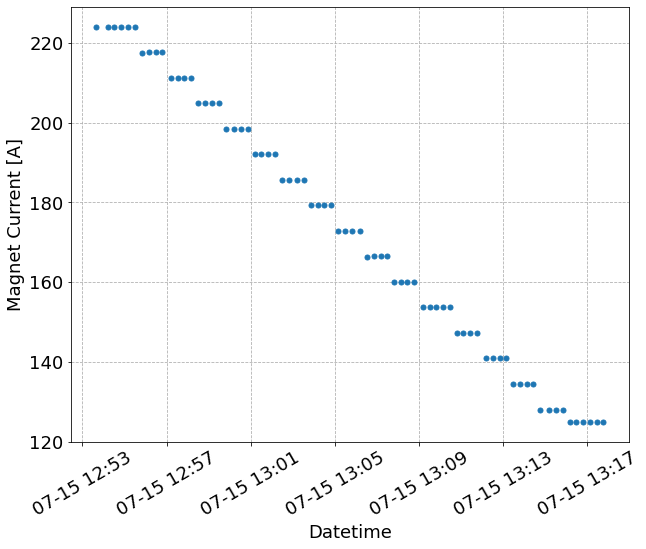

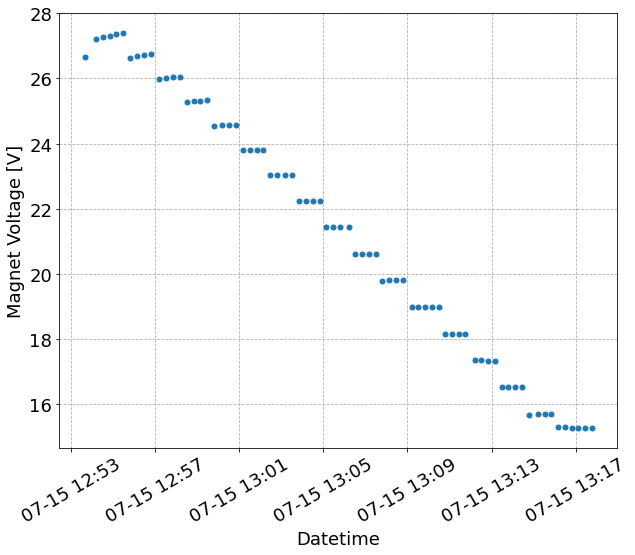

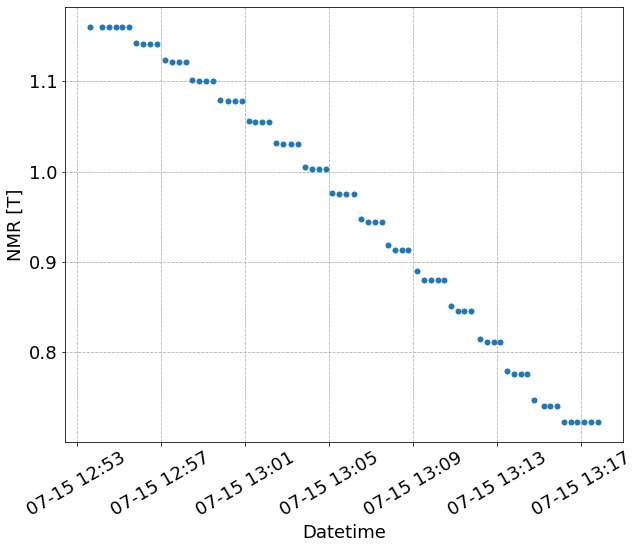

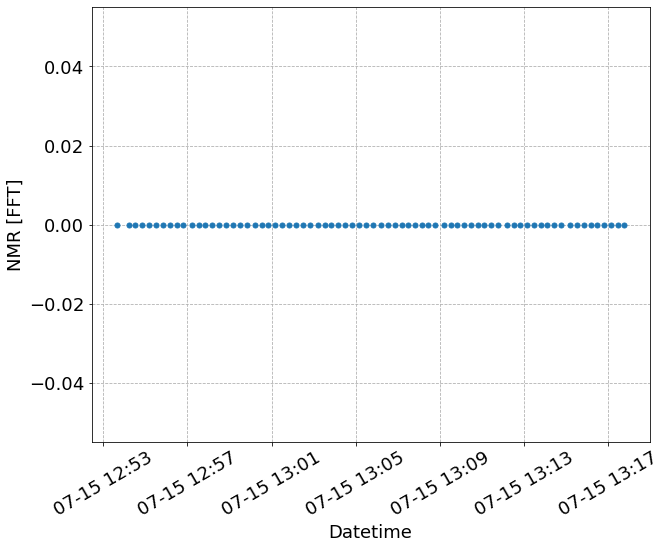

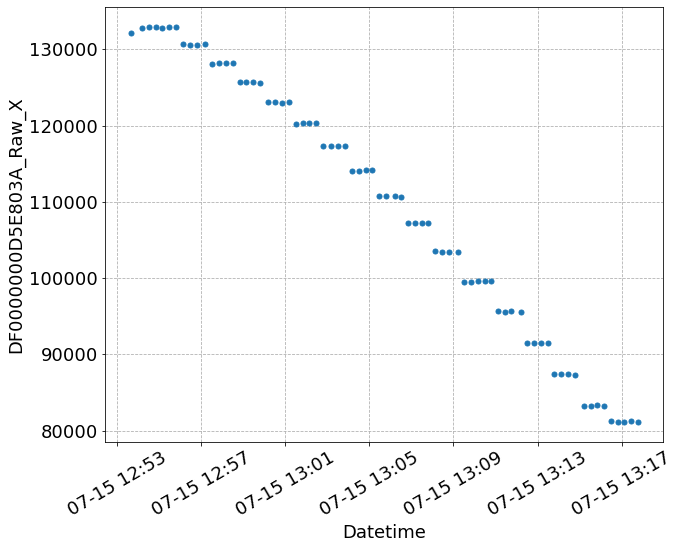

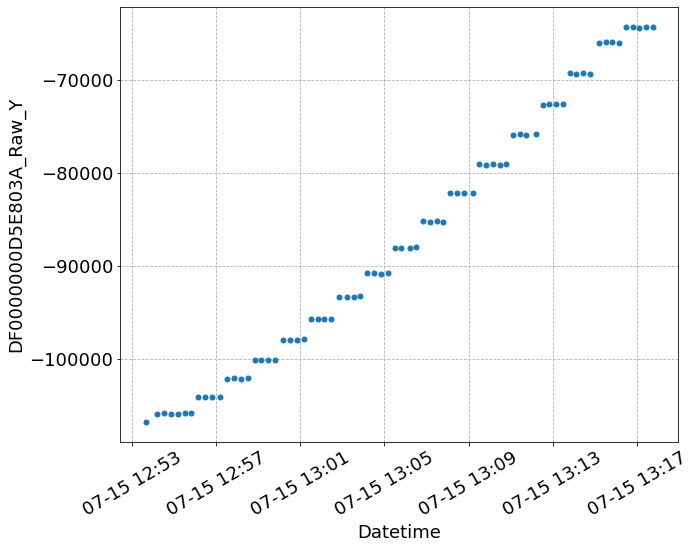

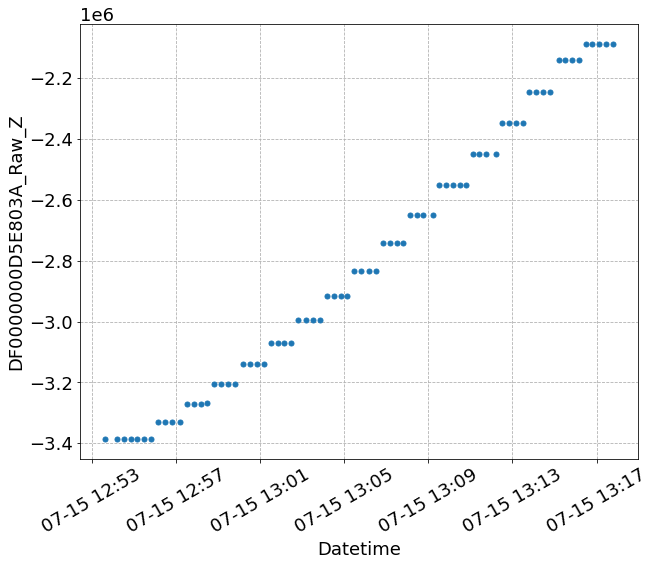

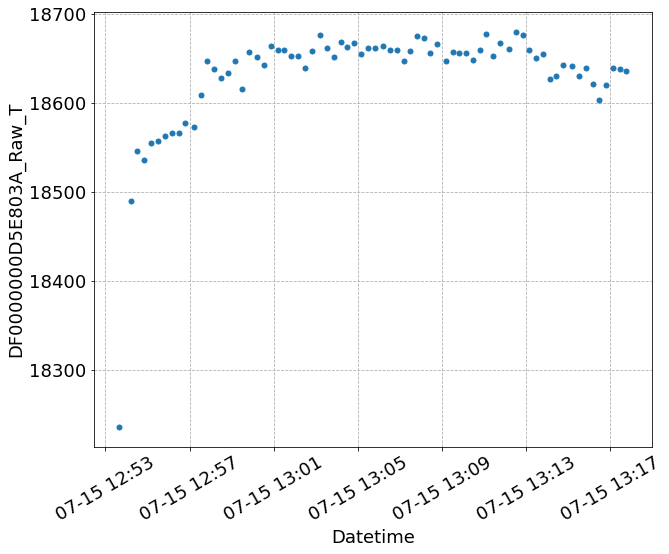

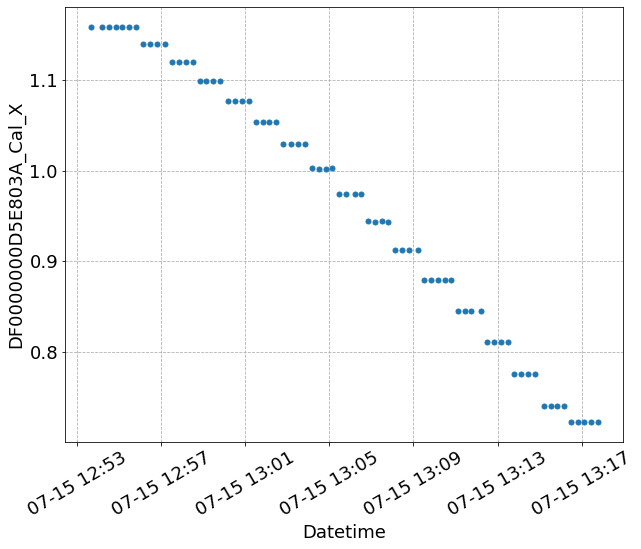

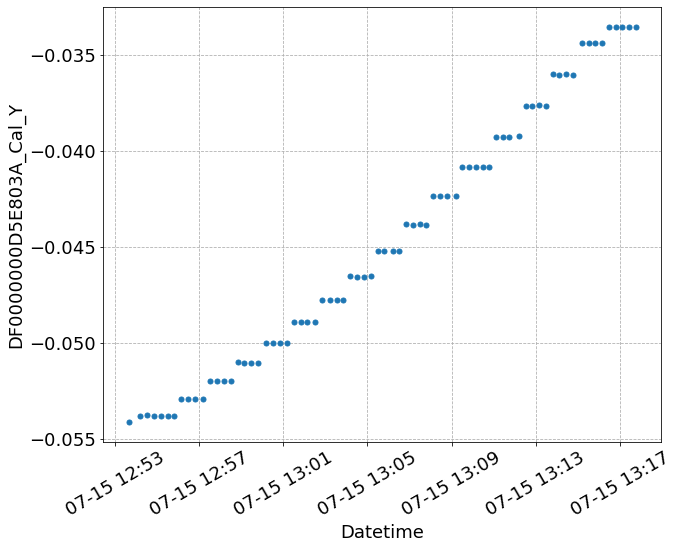

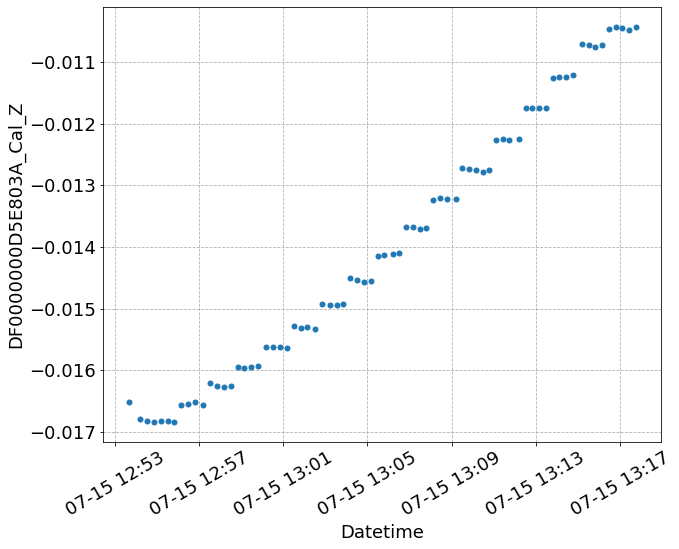

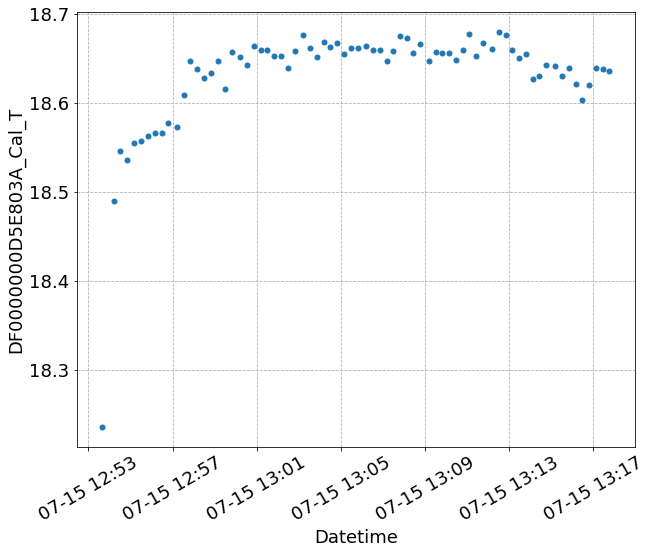

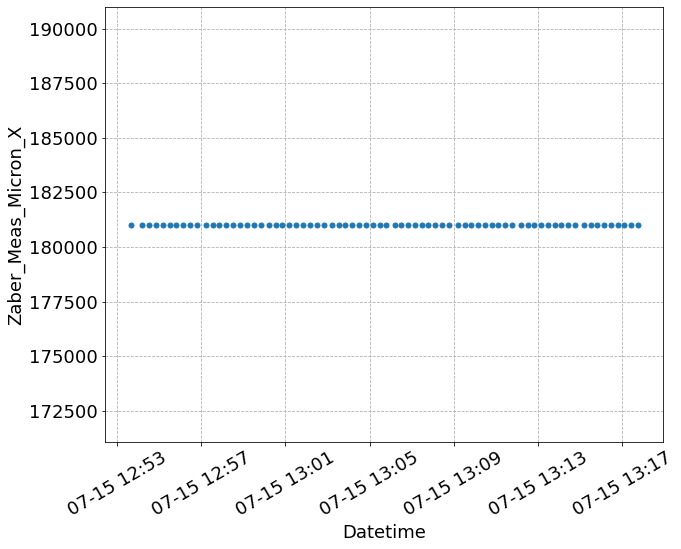

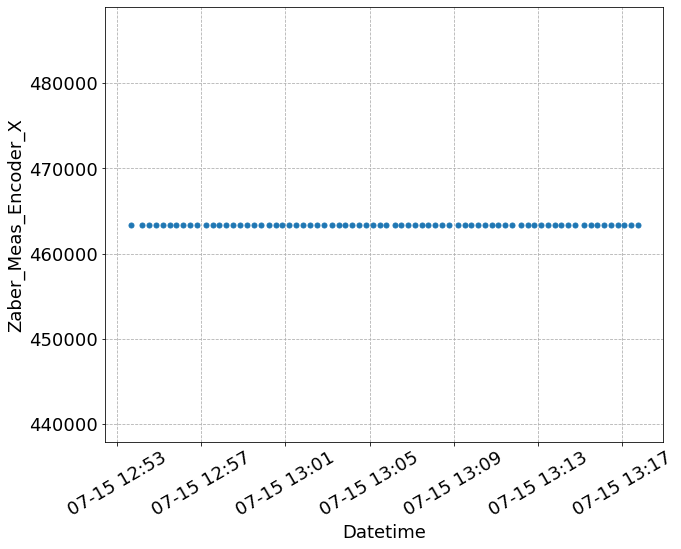

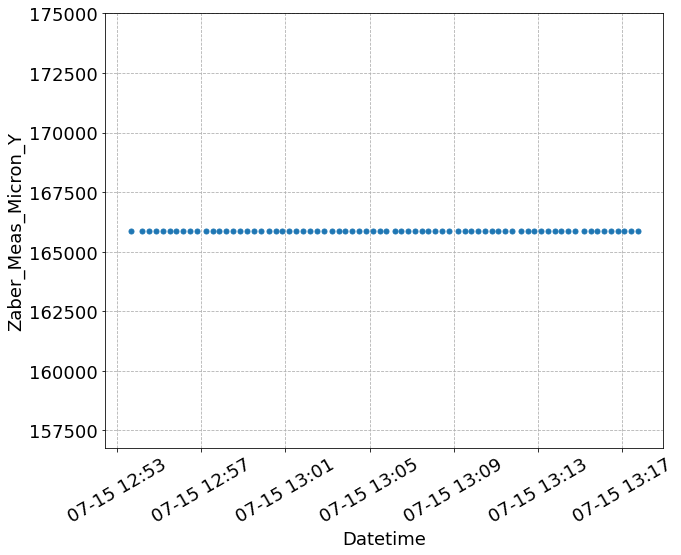

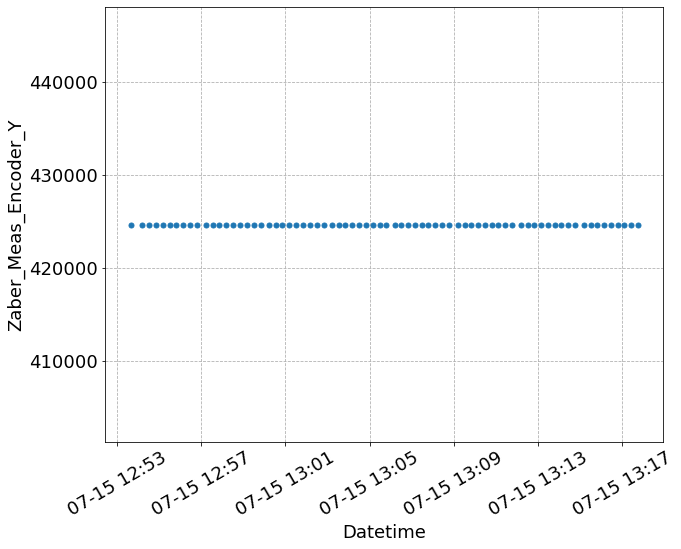

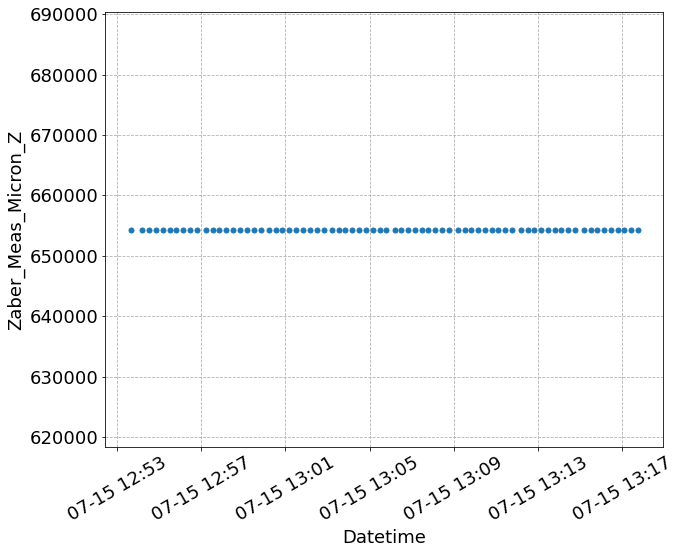

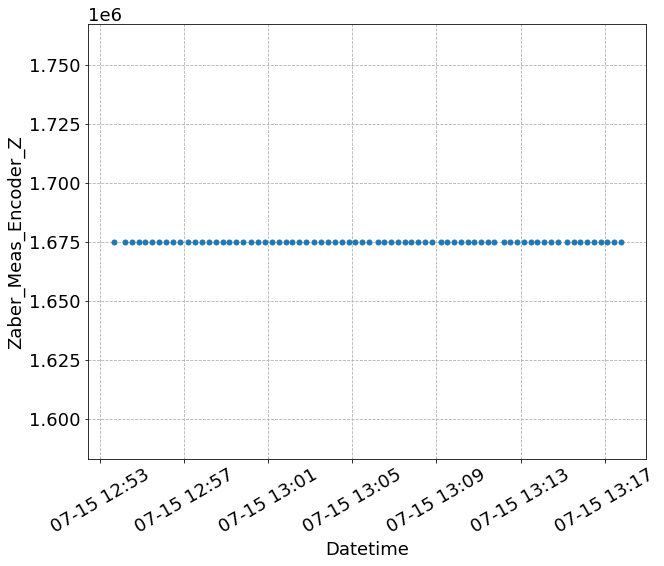

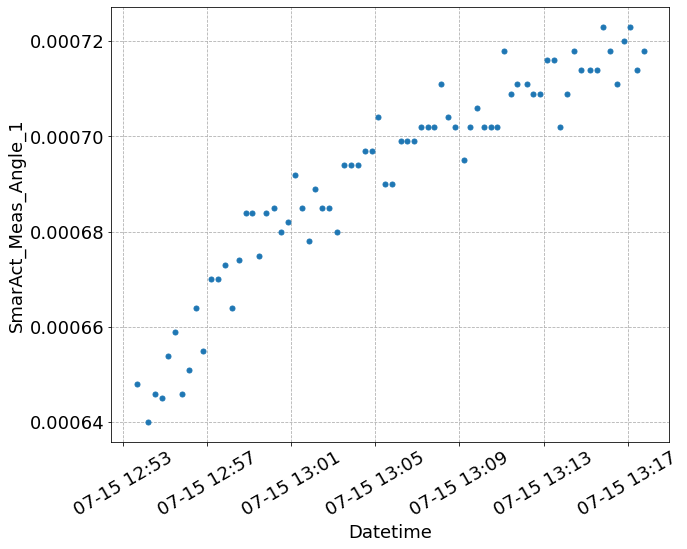

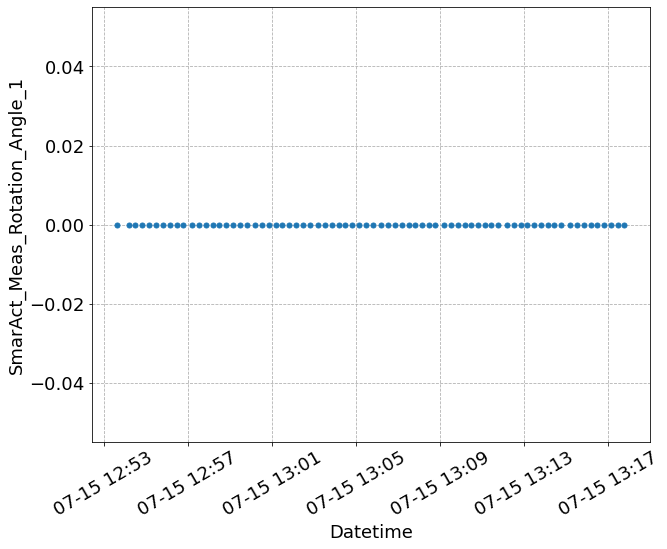

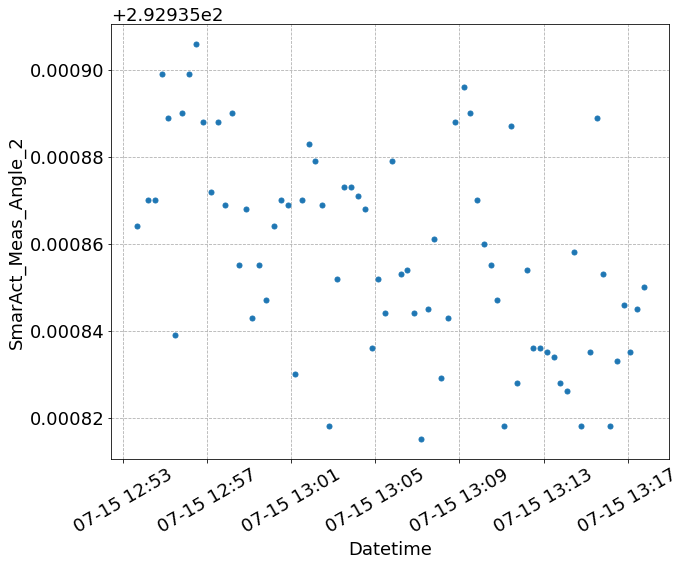

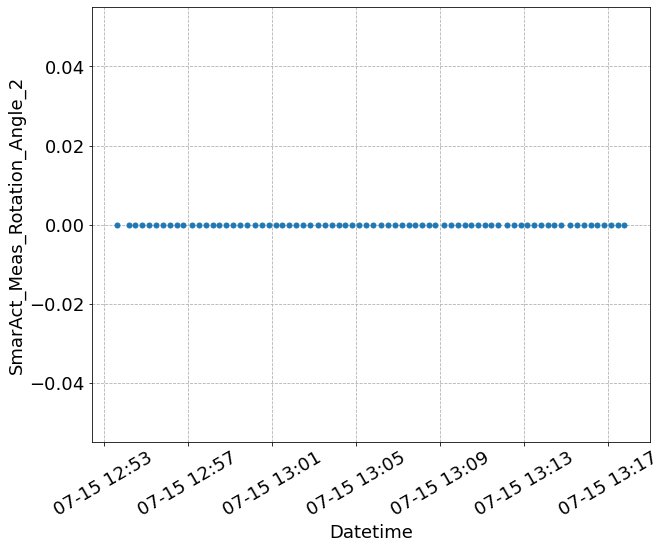

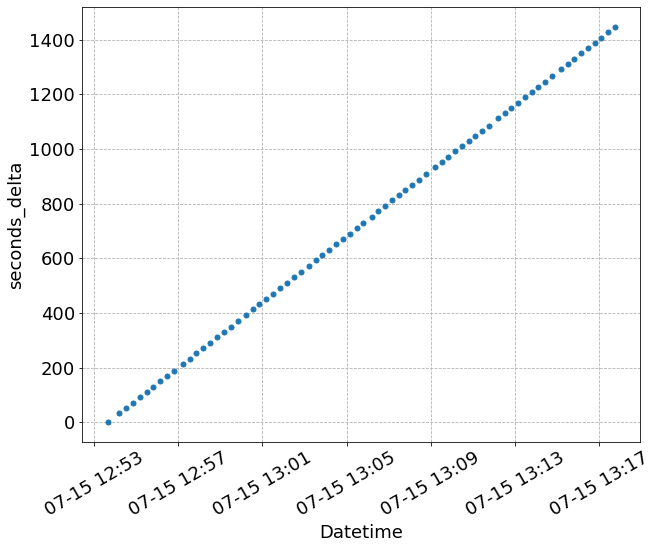

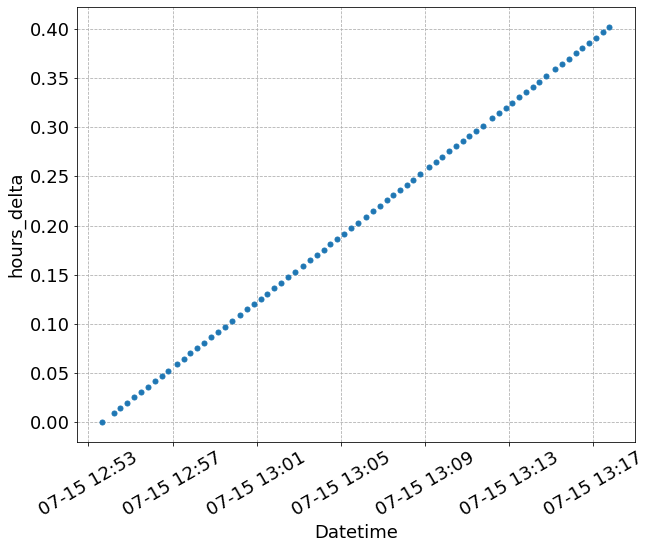

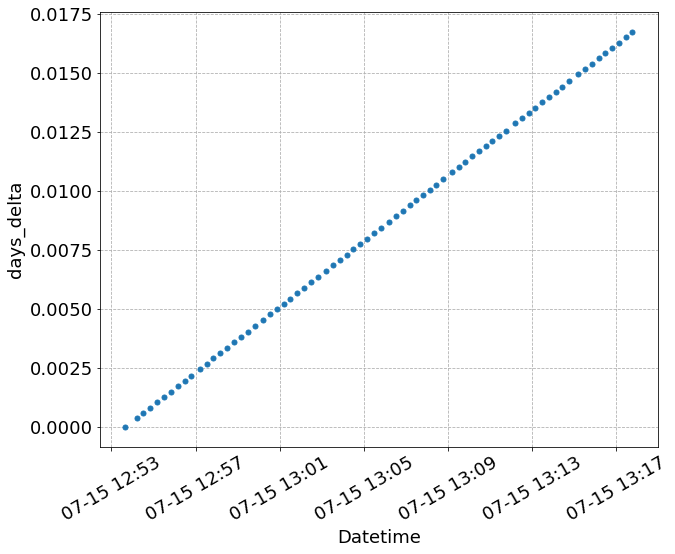

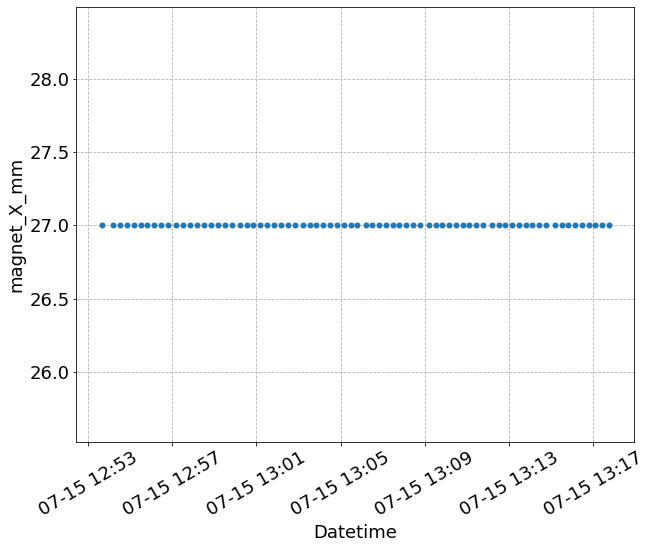

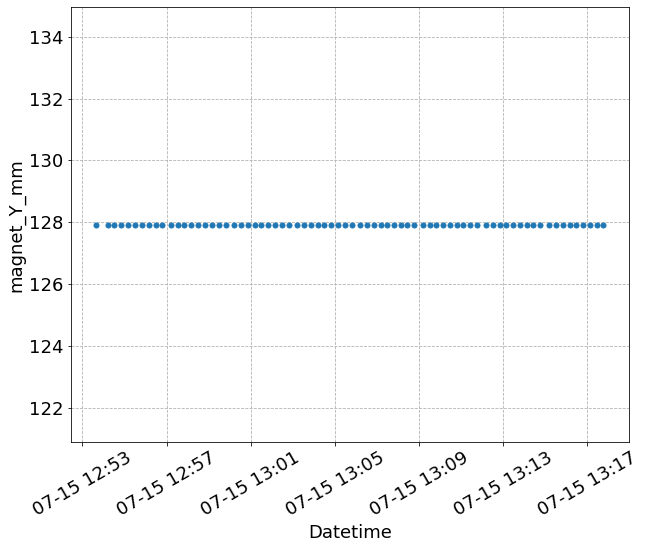

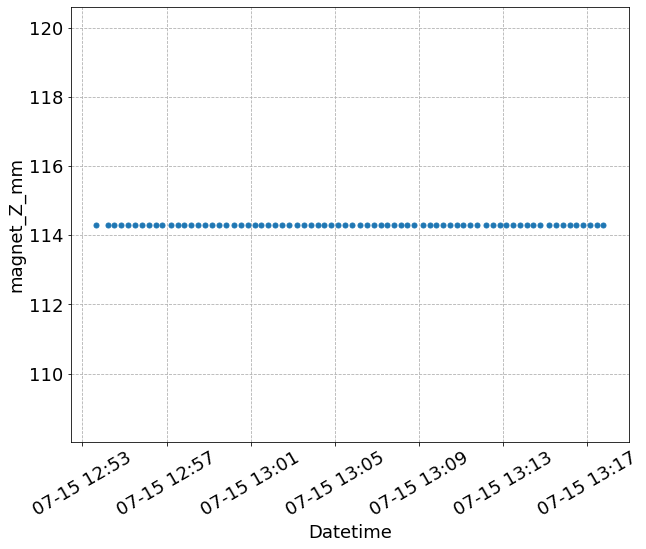

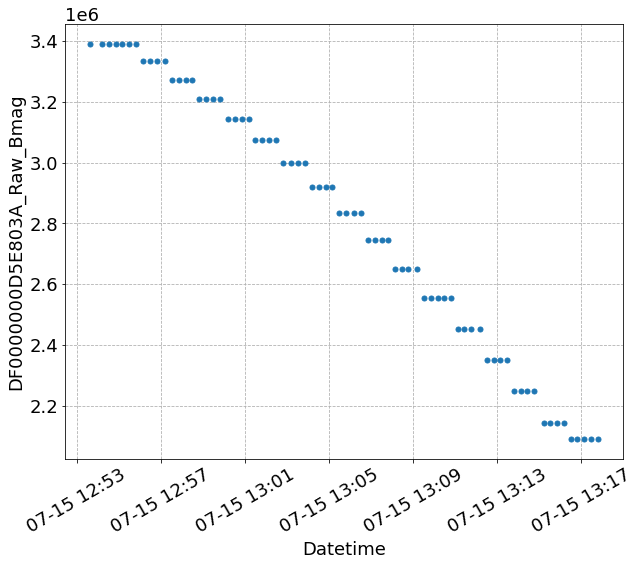

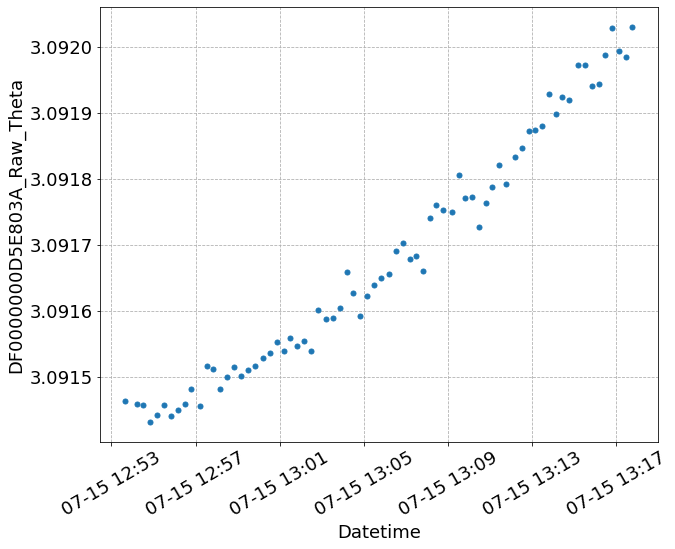

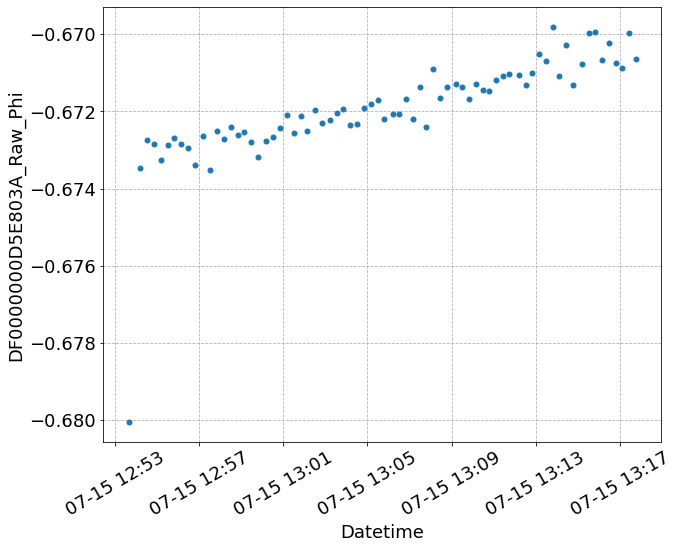

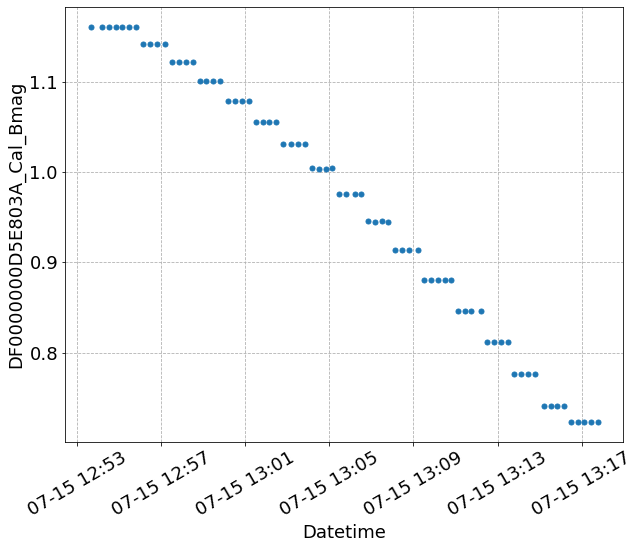

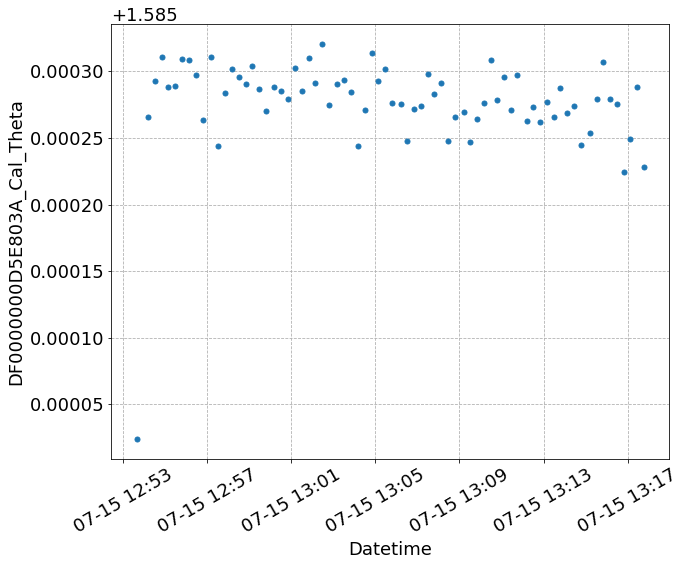

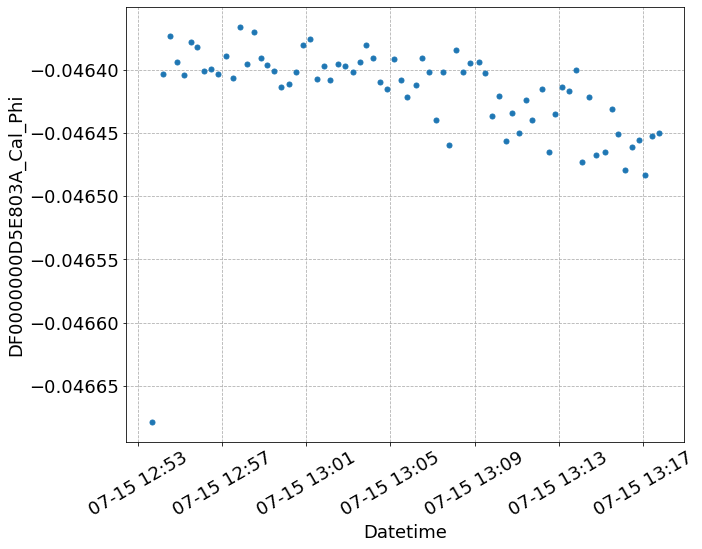

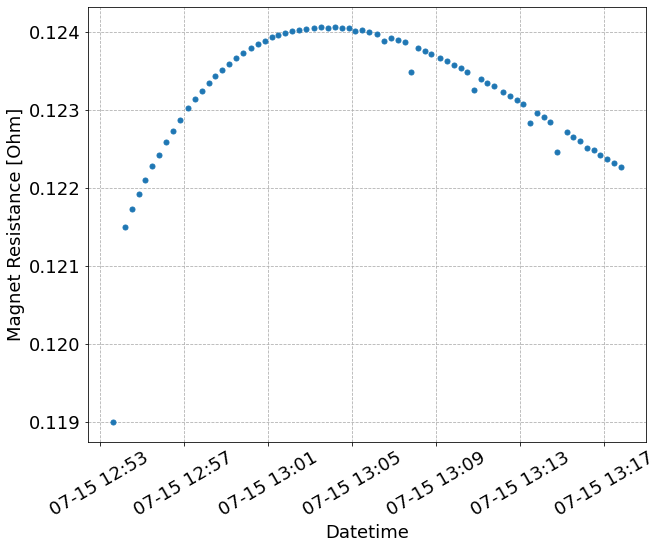

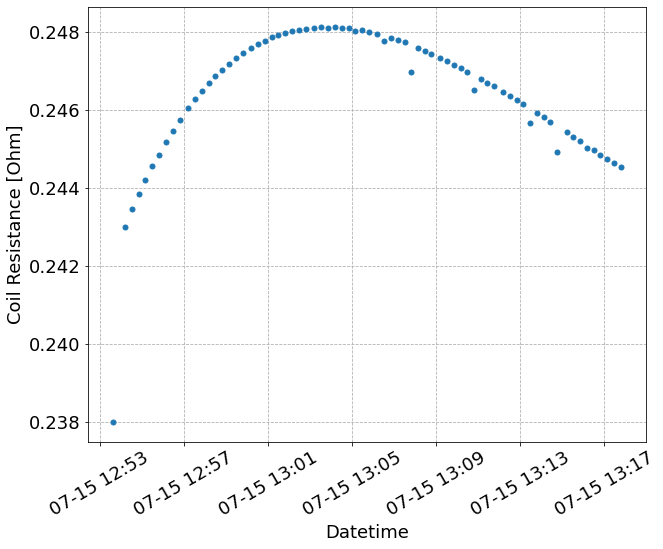

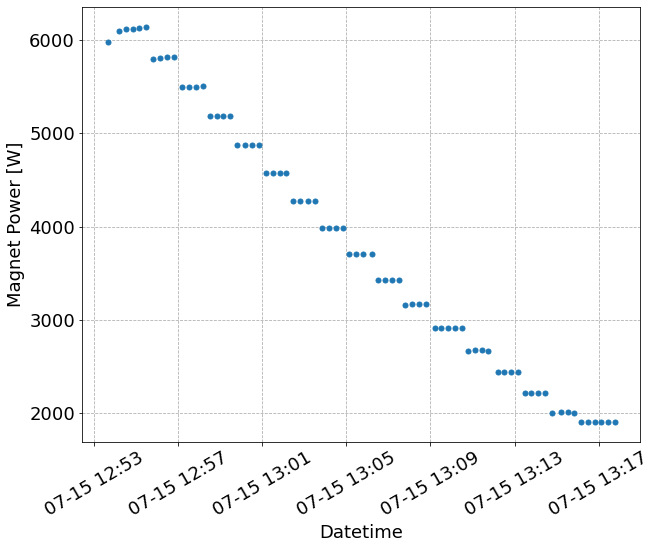

In [866]:
# plot vs. time
for col in df_.columns:
    if is_numeric_dtype(df_[col]):
        fig, ax = plt.subplots()
        ax = datetime_plt(ax, df_.index, df_[col], nmaj=6, Locator='Minute')
        ax.set_xlabel('Datetime')
        ax.set_ylabel(col)

# Simple Analysis

In [875]:
# tf = '2021-07-07 15:20' # probe 3
# tf = '2021-07-13 09:57' # probe 4
# tf = '2021-07-13 11:32' # probe 5
# tf = '2021-07-13 12:35' # probe 6
# tf = '2021-07-13 13:35' # probe 8
# tf = '2021-07-13 14:25' # probe 2
### tf = '2021-07-15 10:09' # probe 9
# tf = '2021-07-15 10:11' # probe 9 -- new position
# tf = '2021-07-15 10:40' # probe 9 -- old position
# tf = '2021-07-15 11:10' # probe 9 -- old position, flipped current
# tf = '2021-07-15 12:30' # probe 10
tf = '2021-07-15 13:18' # probe 5 - repeat
#df_ = df.query(f'Datetime <= "{tf}"').copy()
# df_ = df.query(f'(Datetime <= "{tf}") & (`NMR [T]` > 0.68)').copy() # check -- seems to miss a lot of the data
df_ = df.query(f'(Datetime <= "{tf}") and (`NMR [T]` > 0.68)').copy() # check

In [876]:
len(df)

85

In [877]:
currents = np.unique(np.round(df_['Magnet Current [A]']))
# currents = np.unique(np.round(df_['Magnet Current [A]'], 1)) # 1 decimal round
currents

array([125., 128., 134., 141., 147., 154., 160., 166., 173., 179., 186.,
       192., 198., 205., 211., 218., 224.])

In [878]:
np.diff(currents)

array([3., 6., 7., 6., 7., 6., 6., 7., 6., 7., 6., 6., 7., 6., 7., 6.])

In [879]:
len(currents)

17

In [880]:
dfs = []
t = 0
for c in currents:
    df2_ = df_.query(f'({c} - 0.5 <= `Magnet Current [A]` <= {c} + 0.5)').copy()
    print(f'current: {c}, n data: {len(df2_)}')
    # probes: 3, 4, 5, 6
    if len(df2_) > 1:
        t += len(df2_)-1
        dfs.append(df2_.iloc[1:])
    # probes: 8, 9
#     if len(df2_) > 2:
#         t += len(df2_)-2
#         dfs.append(df2_.iloc[2:])
df3_ = pd.concat(dfs)

current: 125.0, n data: 6
current: 128.0, n data: 4
current: 134.0, n data: 4
current: 141.0, n data: 4
current: 147.0, n data: 4
current: 154.0, n data: 5
current: 160.0, n data: 4
current: 166.0, n data: 4
current: 173.0, n data: 4
current: 179.0, n data: 4
current: 186.0, n data: 4
current: 192.0, n data: 4
current: 198.0, n data: 4
current: 205.0, n data: 4
current: 211.0, n data: 4
current: 218.0, n data: 4
current: 224.0, n data: 6


In [881]:
t

56

In [882]:
len(df3_)

56

In [883]:
df3_

Time  Magnet Current [A]  \
Datetime                                                         
2021-07-15 13:16:29   7/15/2021 1:16:29 PM          124.835817   
2021-07-15 13:16:48   7/15/2021 1:16:48 PM          124.835873   
2021-07-15 13:17:07   7/15/2021 1:17:07 PM          124.835817   
2021-07-15 13:17:27   7/15/2021 1:17:27 PM          124.835873   
2021-07-15 13:17:46   7/15/2021 1:17:46 PM          124.835760   
2021-07-15 13:15:12   7/15/2021 1:15:12 PM          128.035953   
2021-07-15 13:15:31   7/15/2021 1:15:31 PM          128.036123   
2021-07-15 13:15:50   7/15/2021 1:15:50 PM          128.035897   
2021-07-15 13:13:48   7/15/2021 1:13:48 PM          134.438210   
2021-07-15 13:14:07   7/15/2021 1:14:07 PM          134.438040   
2021-07-15 13:14:26   7/15/2021 1:14:26 PM          134.438267   
2021-07-15 13:12:31   7/15/2021 1:12:31 PM          140.839730   
2021-07-15 13:12:50   7/15/2021 1:12:50 PM          140.839843   
2021-07-15 13:13:09   7/15/2021 1:13:09 PM          140.839617   
2021-07-15 13:11:07   7/15/2021 1:11:07 PM          147.241420   
2021-07-15 13:11:26   7/15/2021 1:11:26 PM          147.241477   
2021-07-15 13:11:45   7/15/2021 1:11:45 PM          147.241420   
2021-07-15 13:09:31   7/15/2021 1:09:31 PM          153.644073   
2021-07-15 13:09:50   7/15/2021 1:09:50 PM          153.644243   
2021-07-15 13:10:10   7/15/2021 1:10:10 PM          153.644187   
2021-07-15 13:10:29   7/15/2021 1:10:29 PM          153.644187   
2021-07-15 13:08:08   7/15/2021 1:08:08 PM          160.044743   
2021-07-15 13:08:27   7/15/2021 1:08:27 PM          160.044630   
2021-07-15 13:08:46   7/15/2021 1:08:46 PM          160.044743   
2021-07-15 13:06:51   7/15/2021 1:06:51 PM          166.445243   
2021-07-15 13:07:11   7/15/2021 1:07:11 PM          166.445300   
2021-07-15 13:07:30   7/15/2021 1:07:30 PM          166.445300   
2021-07-15 13:05:29   7/15/2021 1:05:29 PM          172.847953   
2021-07-15 13:05:48   7/15/2021 1:05:48 PM          172.847840   
2021-07-15 13:06:12   7/15/2021 1:06:12 PM          172.848067   
2021-07-15 13:04:11   7/15/2021 1:04:11 PM          179.249700   
2021-07-15 13:04:30   7/15/2021 1:04:30 PM          179.249700   
2021-07-15 13:04:50   7/15/2021 1:04:50 PM          179.249700   
2021-07-15 13:02:49   7/15/2021 1:02:49 PM          185.651220   
2021-07-15 13:03:12   7/15/2021 1:03:12 PM          185.651220   
2021-07-15 13:03:32   7/15/2021 1:03:32 PM          185.651220   
2021-07-15 13:01:30   7/15/2021 1:01:30 PM          192.053193   
2021-07-15 13:01:50   7/15/2021 1:01:50 PM          192.053193   
2021-07-15 13:02:09   7/15/2021 1:02:09 PM          192.053080   
2021-07-15 13:00:12   7/15/2021 1:00:12 PM          198.455393   
2021-07-15 13:00:32   7/15/2021 1:00:32 PM          198.455280   
2021-07-15 13:00:51   7/15/2021 1:00:51 PM          198.455280   
2021-07-15 12:58:50  7/15/2021 12:58:50 PM          204.857027   
2021-07-15 12:59:09  7/15/2021 12:59:09 PM          204.856913   
2021-07-15 12:59:29  7/15/2021 12:59:29 PM          204.856857   
2021-07-15 12:57:32  7/15/2021 12:57:32 PM          211.258320   
2021-07-15 12:57:51  7/15/2021 12:57:51 PM          211.258320   
2021-07-15 12:58:11  7/15/2021 12:58:11 PM          211.258150   
2021-07-15 12:56:09  7/15/2021 12:56:09 PM          217.659217   
2021-07-15 12:56:29  7/15/2021 12:56:29 PM          217.659160   
2021-07-15 12:56:48  7/15/2021 12:56:48 PM          217.659160   
2021-07-15 12:54:12  7/15/2021 12:54:12 PM          224.061643   
2021-07-15 12:54:31  7/15/2021 12:54:31 PM          224.061700   
2021-07-15 12:54:51  7/15/2021 12:54:51 PM          224.061587   
2021-07-15 12:55:10  7/15/2021 12:55:10 PM          224.061473   
2021-07-15 12:55:30  7/15/2021 12:55:30 PM          224.061643   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  \
Datetime                                                       
2021-07-15 13:16:29           15.290470  0.722665        0.0   
2021-07-15 13:16:

In [884]:
len(df_)

73

In [885]:
df_ = df3_.copy()

In [886]:
i = 1
df2_ = df_.query(f'({currents[i]} - 0.75 <= `Magnet Current [A]` <= {currents[i]} + 0.75)').copy()

In [806]:
df2_[['Magnet Current [A]', 'NMR [T]', f'{probe}_Cal_Bmag']]

Magnet Current [A]   NMR [T]  AB0000000D57943A_Cal_Bmag
Datetime                                                                    
2021-07-15 12:25:45          128.036010  0.740612                   0.740311
2021-07-15 12:26:05          128.036180  0.740611                   0.740279
2021-07-15 12:26:24          128.036067  0.740610                   0.740267
2021-07-15 12:26:43          128.036123  0.740609                   0.740286
2021-07-15 12:27:02          128.036010  0.740608                   0.740249

In [807]:
np.abs(np.diff(df2_[f'{probe}_Cal_Bmag']))

array([3.28100303e-05, 1.10449424e-05, 1.86272185e-05, 3.72502980e-05])

In [808]:
for c in currents:
    df2_ = df_.query(f'({c} - 0.75 <= `Magnet Current [A]` <= {c} + 0.75)').copy()
#     print(c, np.abs(np.diff(df2_[f'{probe}_Cal_Bmag'])))
    print(c, np.abs(np.diff(df2_[f'{probe}_Cal_Bmag']))/(np.abs(np.diff(df2_['NMR [T]'])) + 1e-6))

125.0 [ 5.2827817  16.87895677 24.79392895 17.17145284  1.37476761]
128.0 [13.62542787  4.62518526 11.08103419 23.90904876]
134.0 [2.38611484]
141.0 [2.08140117 4.9419318 ]
147.0 [0.4865562]
154.0 [3.90562531 5.78635702]
160.0 [3.56114703]
166.0 [2.28554149]
173.0 [ 8.56181809 12.79035536]
179.0 [4.95423807]
186.0 [10.89743737]
192.0 [8.27741263]
198.0 []
199.0 []
205.0 [13.97558563]
211.0 [12.08586843]
218.0 [21.9835288]
224.0 [10.7856491]


In [887]:
def plot_current(df, current, x, y, query_NMR=True, label=None, fig=None, ax=None):
    df_ = df.query(f'({current} - 0.75 <= `Magnet Current [A]` <= {current} + 0.75)').copy()
    if query_NMR:
        df_ = df_.query('`NMR [T]` > 0.68').copy()
#     tf = '2021-07-07 15:20' # probe 3
#     tf = '2021-07-13 09:59' # probe 4
#     tf = '2021-07-13 11:32' # probe 5
#     tf = '2021-07-13 12:35' # probe 6
#     tf = '2021-07-13 13:35' # probe 8
#     tf = '2021-07-13 14:25' # probe 2
#     tf = '2021-07-15 10:09' # probe 9 -- new position
#     tf = '2021-07-15 10:40' # probe 9 -- old position
#     tf = '2021-07-15 11:10' # probe 9 -- old position, flipped current
#     tf = '2021-07-15 12:30' # probe 10
    tf = '2021-07-15 13:18' # probe 5 - repeat
    df_ = df_.query(f'Datetime <= "{tf}"').copy()
    if label is None:
        label = y
    if fig is None:
        fig, ax = plt.subplots()
    ax.scatter(df_[x], df_[y], label=label)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.legend()
    return fig, ax

In [888]:
#df

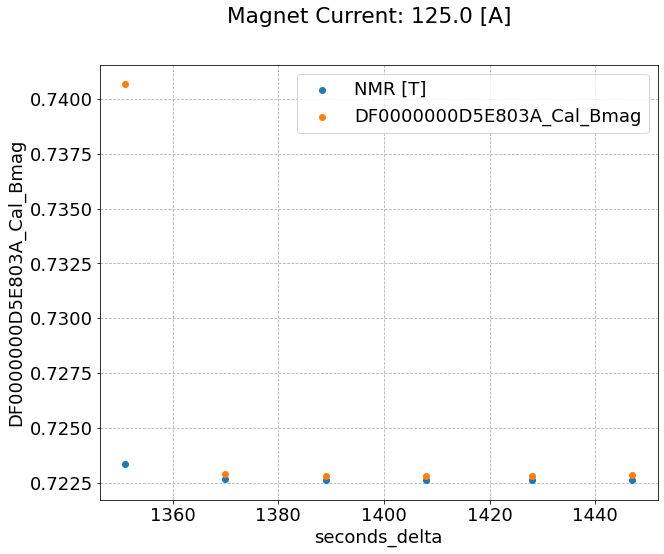

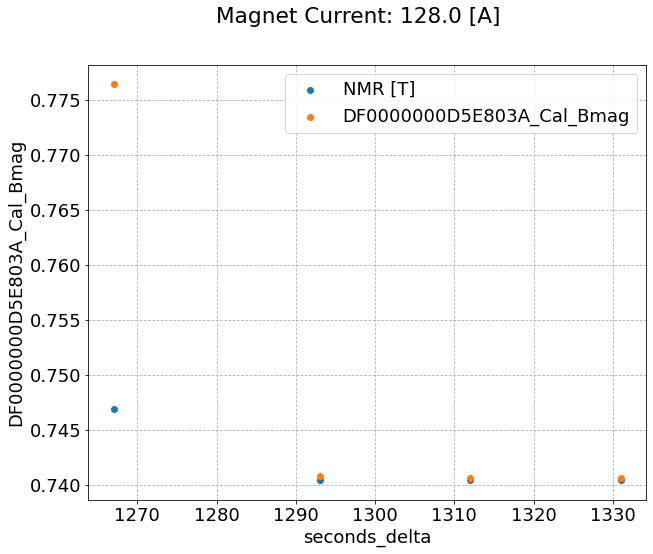

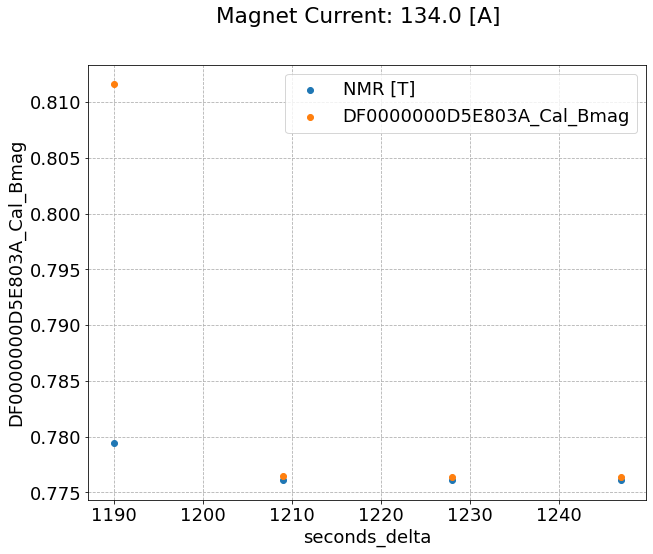

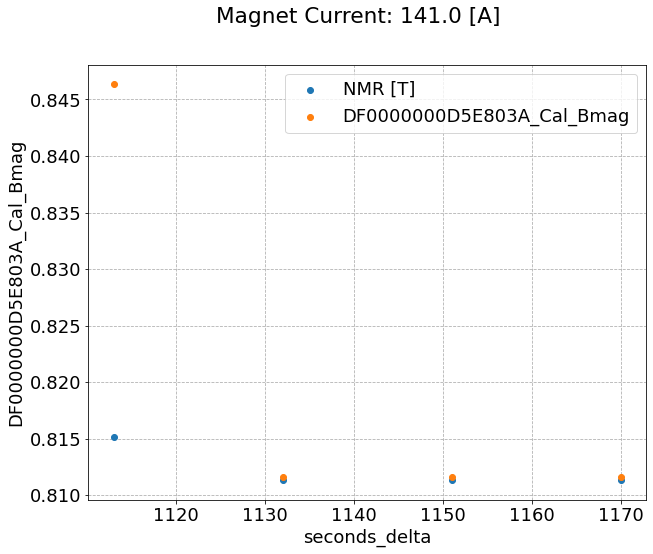

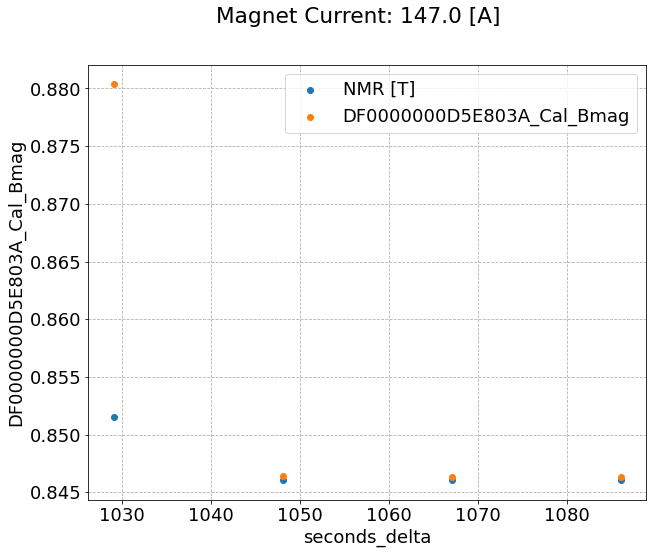

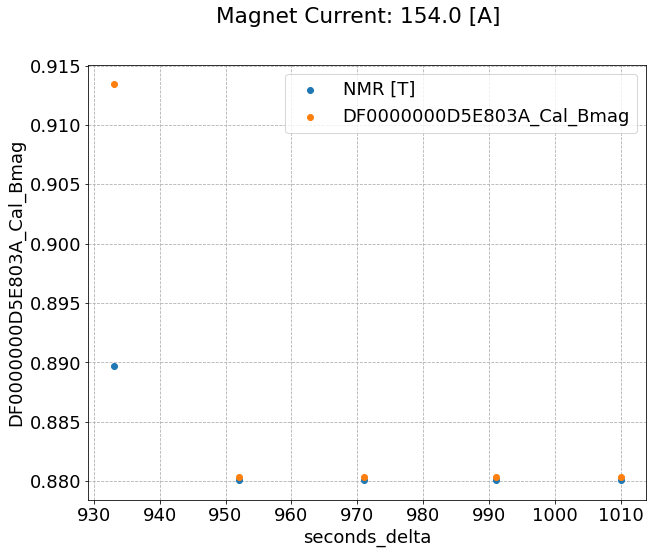

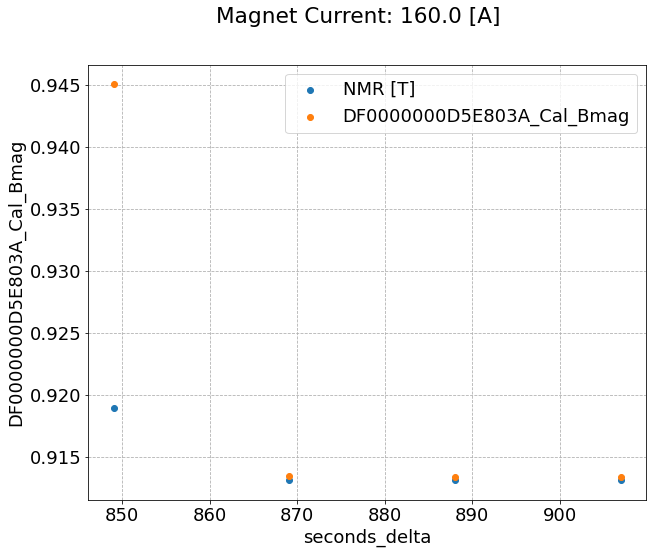

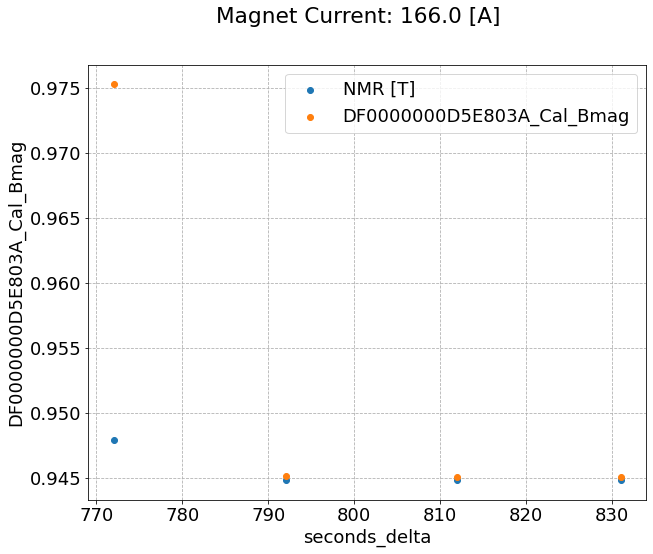

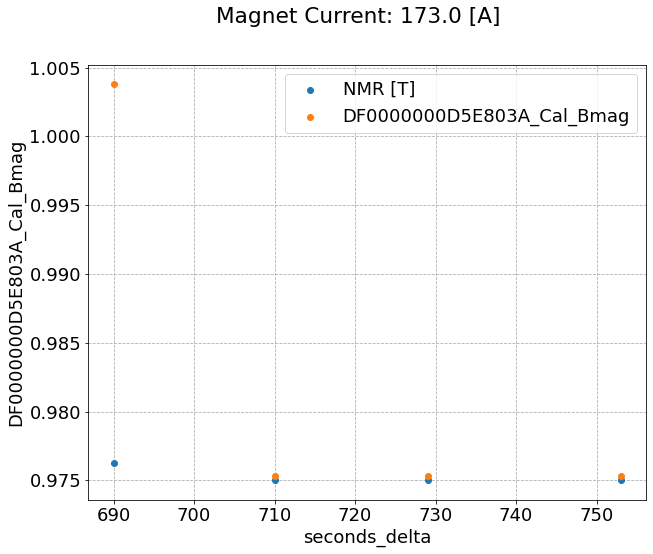

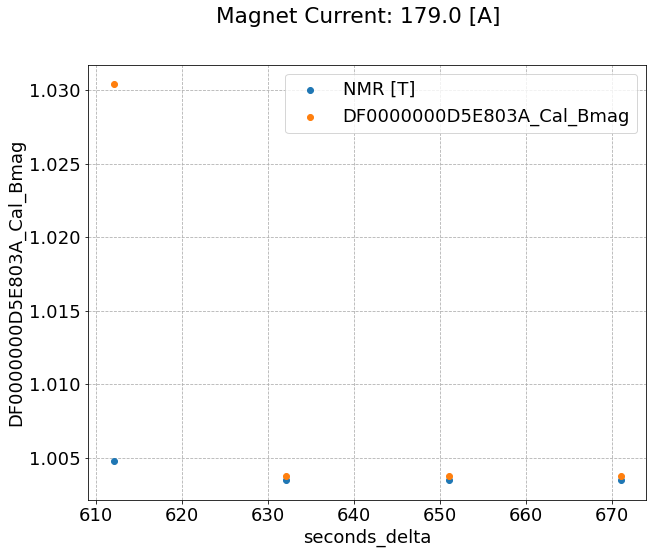

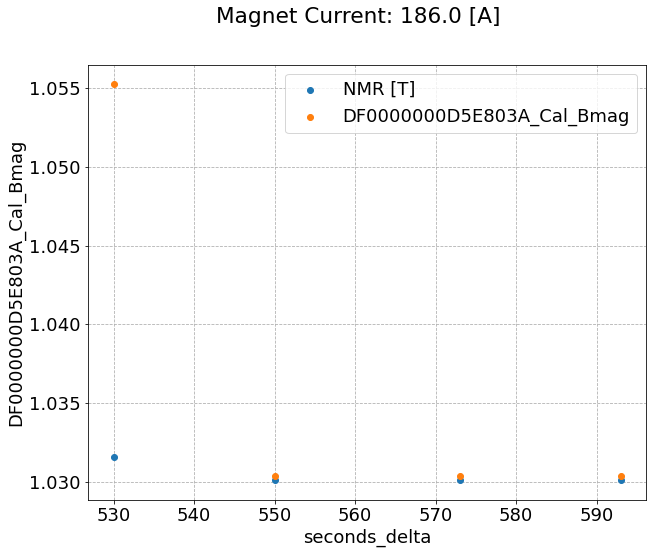

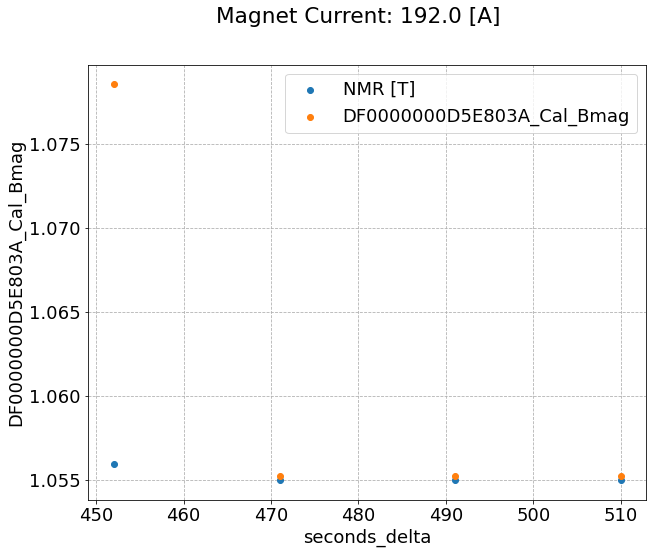

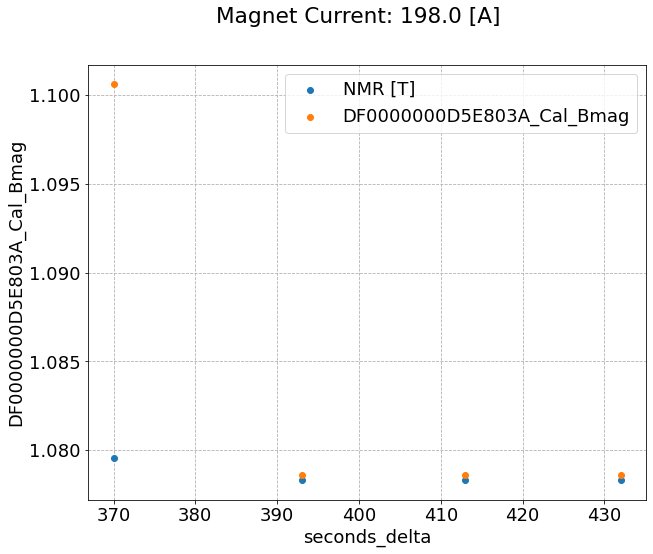

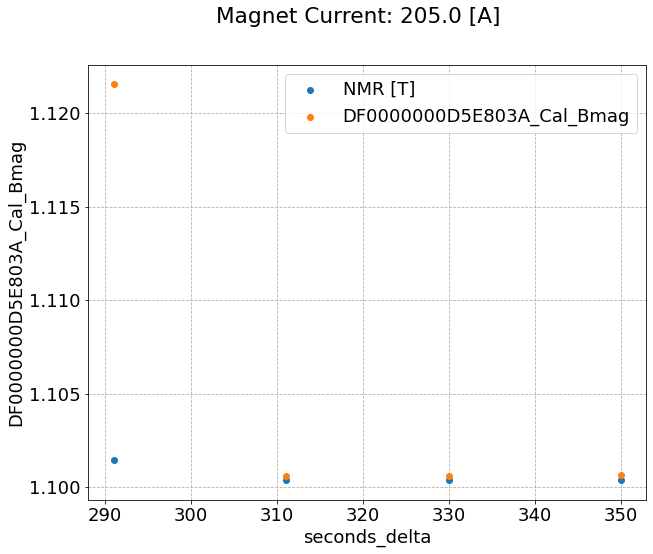

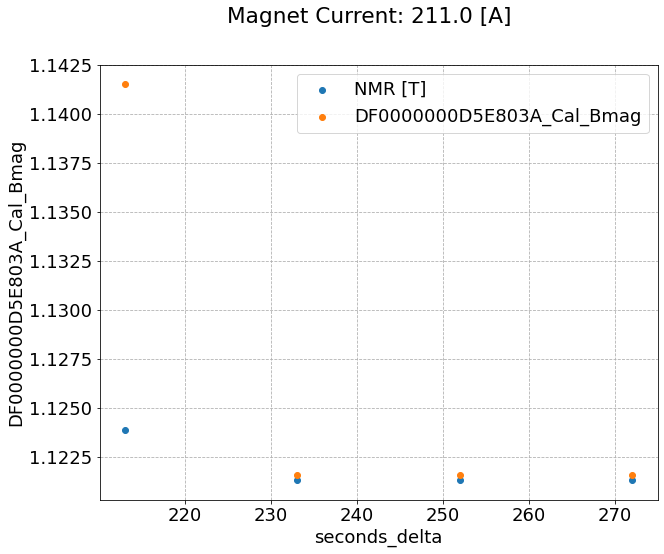

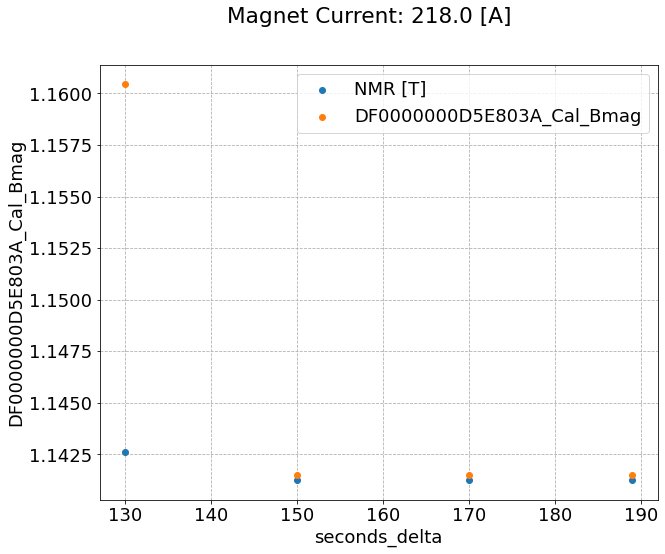

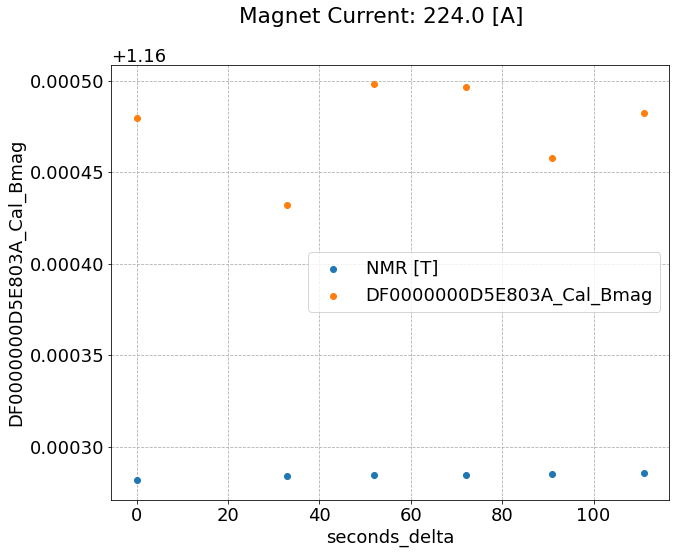

In [889]:
for c in currents:
    fig, ax = plot_current(df, c, f'seconds_delta', 'NMR [T]')
    fig, ax = plot_current(df, c, f'seconds_delta', f'{probe}_Cal_Bmag', fig=fig, ax=ax)
    fig.suptitle(f'Magnet Current: {c} [A]')

In [890]:
(df_['Magnet Current [A]'] - np.round(df_['Magnet Current [A]'])).describe()

count    56.000000
mean      0.023125
std       0.267127
min      -0.355927
25%      -0.164127
50%       0.044687
75%       0.249700
max       0.455393
Name: Magnet Current [A], dtype: float64

In [891]:
len(df_.index.unique()), len(df_)

(56, 56)

In [41]:
'''
# NOTE HAND SELECTED OUTLIER
tf = '2021-07-07 15:20'
df_ = df.query(f'(`NMR [T]` > 0.65) & (Datetime != "2021-07-07 14:51:34") & (Datetime <= "{tf}")').copy()
'''
# check this

'\n# NOTE HAND SELECTED OUTLIER\ntf = \'2021-07-07 15:20\'\ndf_ = df.query(f\'(`NMR [T]` > 0.65) & (Datetime != "2021-07-07 14:51:34") & (Datetime <= "{tf}")\').copy()\n'

In [599]:
df_

Time  Magnet Current [A]  \
Datetime                                                         
2021-07-15 10:39:01  7/15/2021 10:39:01 AM          124.835590   
2021-07-15 10:39:20  7/15/2021 10:39:20 AM          124.835760   
2021-07-15 10:39:39  7/15/2021 10:39:39 AM          124.835987   
2021-07-15 10:39:59  7/15/2021 10:39:59 AM          124.835817   
2021-07-15 10:38:03  7/15/2021 10:38:03 AM          128.036067   
2021-07-15 10:38:22  7/15/2021 10:38:22 AM          128.036123   
2021-07-15 10:38:42  7/15/2021 10:38:42 AM          128.036180   
2021-07-15 10:36:40  7/15/2021 10:36:40 AM          134.438097   
2021-07-15 10:36:59  7/15/2021 10:36:59 AM          134.438040   
2021-07-15 10:35:03  7/15/2021 10:35:03 AM          140.839617   
2021-07-15 10:35:22  7/15/2021 10:35:22 AM          140.839787   
2021-07-15 10:35:42  7/15/2021 10:35:42 AM          140.839617   
2021-07-15 10:33:59  7/15/2021 10:33:59 AM          147.241420   
2021-07-15 10:34:18  7/15/2021 10:34:18 AM          147.241363   
2021-07-15 10:32:41  7/15/2021 10:32:41 AM          153.644187   
2021-07-15 10:33:01  7/15/2021 10:33:01 AM          153.644187   
2021-07-15 10:31:20  7/15/2021 10:31:20 AM          160.044573   
2021-07-15 10:31:44  7/15/2021 10:31:44 AM          160.044573   
2021-07-15 10:30:03  7/15/2021 10:30:03 AM          166.445017   
2021-07-15 10:30:22  7/15/2021 10:30:22 AM          166.445073   
2021-07-15 10:28:21  7/15/2021 10:28:21 AM          172.847840   
2021-07-15 10:28:44  7/15/2021 10:28:44 AM          172.847840   
2021-07-15 10:29:03  7/15/2021 10:29:03 AM          172.847840   
2021-07-15 10:27:22  7/15/2021 10:27:22 AM          179.249700   
2021-07-15 10:27:42  7/15/2021 10:27:42 AM          179.249700   
2021-07-15 10:25:44  7/15/2021 10:25:44 AM          185.650937   
2021-07-15 10:26:03  7/15/2021 10:26:03 AM          185.651050   
2021-07-15 10:26:23  7/15/2021 10:26:23 AM          185.650880   
2021-07-15 10:24:22  7/15/2021 10:24:22 AM          192.053080   
2021-07-15 10:24:42  7/15/2021 10:24:42 AM          192.053080   
2021-07-15 10:23:04  7/15/2021 10:23:04 AM          198.455110   
2021-07-15 10:23:23  7/15/2021 10:23:23 AM          198.455223   
2021-07-15 10:21:41  7/15/2021 10:21:41 AM          204.856800   
2021-07-15 10:22:00  7/15/2021 10:22:00 AM          204.856857   
2021-07-15 10:20:22  7/15/2021 10:20:22 AM          211.258150   
2021-07-15 10:20:41  7/15/2021 10:20:41 AM          211.258037   
2021-07-15 10:18:46  7/15/2021 10:18:46 AM          217.658877   
2021-07-15 10:19:05  7/15/2021 10:19:05 AM          217.658933   
2021-07-15 10:17:08  7/15/2021 10:17:08 AM          224.061530   
2021-07-15 10:17:27  7/15/2021 10:17:27 AM          224.061417   
2021-07-15 10:17:47  7/15/2021 10:17:47 AM          224.061360   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  \
Datetime                                                       
2021-07-15 10:39:01           15.346915  0.723132        0.0   
2021-07-15 10:39:20           15.342043  0.722683        0.0   
2021-07-15 10:39:39           15.334563  0.722673        0.0   
2021-07-15 10:39:59           15.327260  0.722671        0.0   
2021-07-15 10:38:03           15.767250  0.740577        0.0   
2021-07-15 10:38:22           15.759103  0.740576        0.0   
2021-07-15 10:38:42           15.751232  0.740574        0.0   
2021-07-15 10:36:40           16.593088  0.776179        0.0   
2021-07-15 10:36:59           16.584743  0.776177        0.0   
2021-07-15 10:35:03           17.426797  0.811411        0.0   
2021-07-15 10:35:22           17.418198  0.811404        0.0   
2021-07-15 10:35:42           17.409902  0.811402        0.0   
2021-07-15 10:33:59           18.247913  0.846117        0.0   
2021-07-15 10:34:18           18.239628  0.846115        0.0   
2021-07-15 10:32:41           19.075420  0.880088        0.0   
2021-07-15 10:33:01           19.067403  0.880087        0.0   
2021-07-15 10:31:20           19.903283  0.9130

In [600]:
len(df_)

41

In [601]:
len(df)

72

In [602]:
3e6 * 3e-5

90.0

In [604]:
3**(1/2) * 3e-5

5.196152422706632e-05

In [605]:
5.2e-5 * 3e6

156.0

In [892]:
#std_V = 600 # 2e-4, microvolts
std_V = 90 # 3e-5, microvolts
#std_V = 160 # 5.2e-5, microvolts

# std_B = 1e-4
std_B = 3e-5 * df_[f'{probe}_Cal_Bmag']

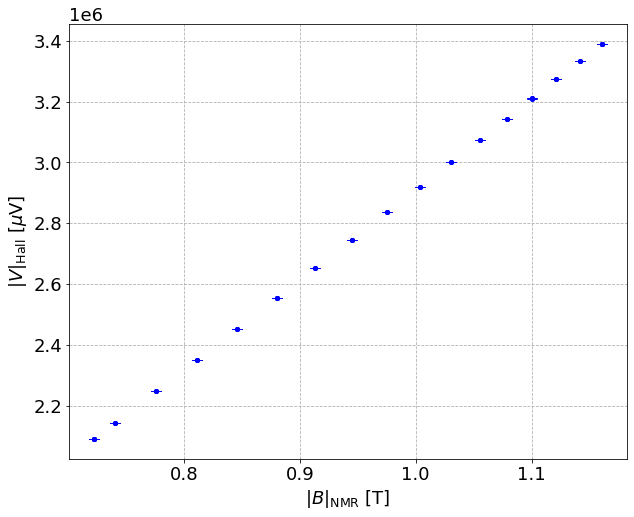

In [893]:
fig, ax = plt.subplots()
B = df_['NMR [T]']
V = df_[f'{probe}_Raw_Bmag']
# xs = np.linspace(np.min(B)-0.02, np.max(B)+0.02, 100)
# ys = xs
# ax.plot(xs, ys, linecolor='gray', linestyle='--', label=)

#ax.scatter(B, V, label='Data', s=6)
ax.errorbar(B, V, yerr=std_V, c='blue',
            fmt='o', ls='none', ms=4, capsize=5,)
            #label='Hall', zorder=101,)

ax.set_xlabel(r'$|B|_{\mathrm{NMR}}$ [T]')
ax.set_ylabel(r'$|V|_{\mathrm{Hall}}$ [$\mu$V]');

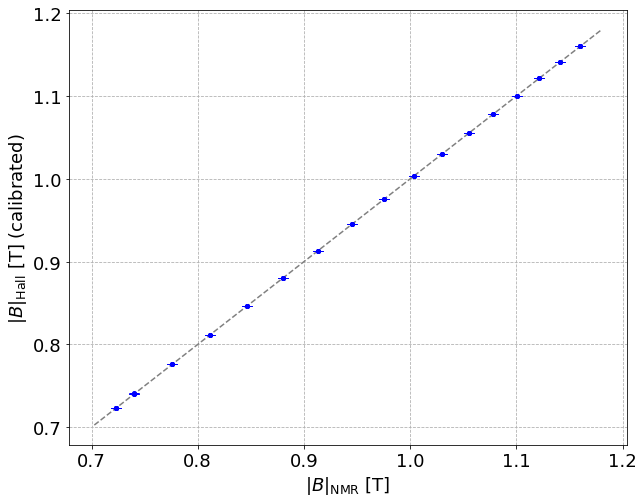

In [894]:
fig, ax = plt.subplots()
B = df_['NMR [T]']
V = df_[f'{probe}_Cal_Bmag']
xs = np.linspace(np.min(B)-0.02, np.max(B)+0.02, 100)
ys = xs
ax.plot(xs, ys, color='gray', linestyle='--',)# label=)

#ax.scatter(B, V, label='Data', s=6)
ax.errorbar(B, V, yerr=std_B, c='blue',
            fmt='o', ls='none', ms=4, capsize=5,)
            #label='Hall', zorder=101,)

ax.set_xlabel(r'$|B|_{\mathrm{NMR}}$ [T]')
ax.set_ylabel(r'$|B|_{\mathrm{Hall}}$ [T] (calibrated)');

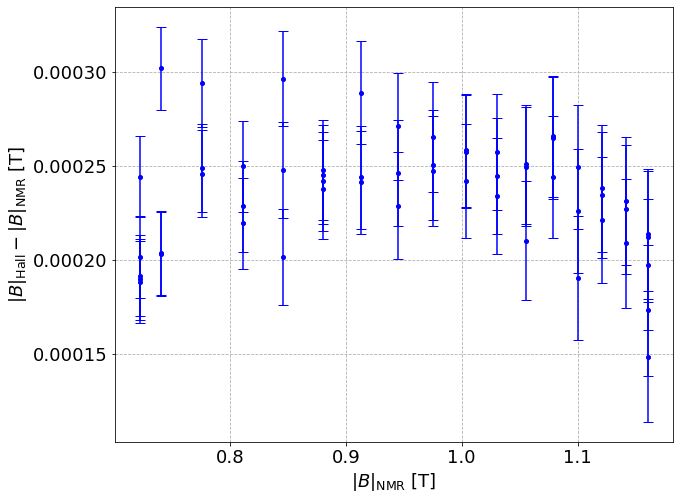

In [895]:
fig, ax = plt.subplots()
B = df_['NMR [T]']
V = df_[f'{probe}_Cal_Bmag']
# xs = np.linspace(np.min(B)-0.02, np.max(B)+0.02, 100)
# ys = xs
# ax.plot(xs, ys, color='gray', linestyle='--',)# label=)

#ax.scatter(B, V, label='Data', s=6)
ax.errorbar(B, V-B, yerr=std_B, c='blue',
            fmt='o', ls='none', ms=4, capsize=5,)
            #label='Hall', zorder=101,)

ax.set_xlabel(r'$|B|_{\mathrm{NMR}}$ [T]')
ax.set_ylabel(r'$|B|_{\mathrm{Hall}} - |B|_{\mathrm{NMR}}$ [T]');

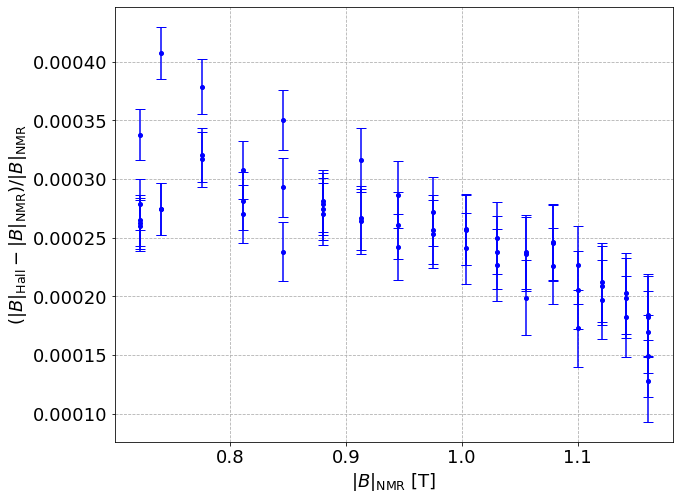

In [896]:
fig, ax = plt.subplots()
B = df_['NMR [T]']
V = df_[f'{probe}_Cal_Bmag']
# xs = np.linspace(np.min(B)-0.02, np.max(B)+0.02, 100)
# ys = xs
# ax.plot(xs, ys, color='gray', linestyle='--',)# label=)

#ax.scatter(B, V, label='Data', s=6)
ax.errorbar(B, (V-B)/B, yerr=std_B, c='blue',
            fmt='o', ls='none', ms=4, capsize=5,)
            #label='Hall', zorder=101,)

ax.set_xlabel(r'$|B|_{\mathrm{NMR}}$ [T]')
ax.set_ylabel(r'$(|B|_{\mathrm{Hall}} - |B|_{\mathrm{NMR}})/|B|_{\mathrm{NMR}}$');

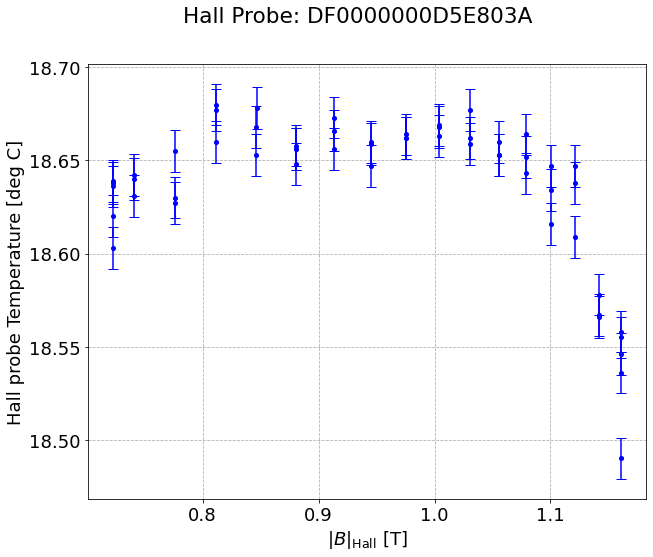

In [897]:
fig, ax = plt.subplots()
B = df_[f'{probe}_Cal_Bmag']#df_['NMR [T]']
V = df_[f'{probe}_Cal_T']
# xs = np.linspace(np.min(B)-0.02, np.max(B)+0.02, 100)
# ys = xs
# ax.plot(xs, ys, color='gray', linestyle='--',)# label=)

#ax.scatter(B, V, label='Data', s=6)
ax.errorbar(B, V, yerr=0.0006*V, c='blue',
            fmt='o', ls='none', ms=4, capsize=5,)
            #label='Hall', zorder=101,)

fig.suptitle(f'Hall Probe: {probe}')
ax.set_xlabel(r'$|B|_{\mathrm{Hall}}$ [T]')
ax.set_ylabel(f'Hall probe Temperature [deg C]');

In [898]:
fig = scatter3d([df_['NMR [T]']], [df_[f'{probe}_Cal_T']], [df_[f'{probe}_Raw_Bmag']], scale_list=[df_[f'{probe}_Raw_Bmag']], size_list=[3], inline=False)

In [899]:
df_[[f'magnet_{i}_mm' for i in ['X','Y','Z']]].describe()

magnet_X_mm  magnet_Y_mm  magnet_Z_mm
count    56.000000    56.000000    56.000000
mean     27.005859   127.921875   114.310547
std       0.000000     0.000000     0.000000
min      27.005859   127.921875   114.310547
25%      27.005859   127.921875   114.310547
50%      27.005859   127.921875   114.310547
75%      27.005859   127.921875   114.310547
max      27.005859   127.921875   114.310547

In [900]:
df[[f'magnet_{i}_mm' for i in ['X','Y','Z']]].describe()

magnet_X_mm  magnet_Y_mm  magnet_Z_mm
count    85.000000    85.000000    85.000000
mean     27.005859   127.921875   114.310547
std       0.000000     0.000000     0.000000
min      27.005859   127.921875   114.310547
25%      27.005859   127.921875   114.310547
50%      27.005859   127.921875   114.310547
75%      27.005859   127.921875   114.310547
max      27.005859   127.921875   114.310547

In [901]:
3e6 * 2e-4

600.0

In [902]:
3**(1/2) * 3e-5

5.196152422706632e-05

In [903]:
def model_lin(B, **params):
    return params['C_0'] + params['C_1'] * B

In [904]:
std_V

90

In [905]:
model = lm.Model(model_lin, independent_vars=['B'])
params = lm.Parameters()
params.add('C_0', value=0, vary=True)
params.add('C_1', value=0, vary=True)
results = model.fit(df_[f'{probe}_Raw_Bmag'].values, B=df_['NMR [T]'].values, params=params, weights= np.ones_like(df_['NMR [T]'])/std_V)

In [906]:
results

(<Figure size 720x720 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

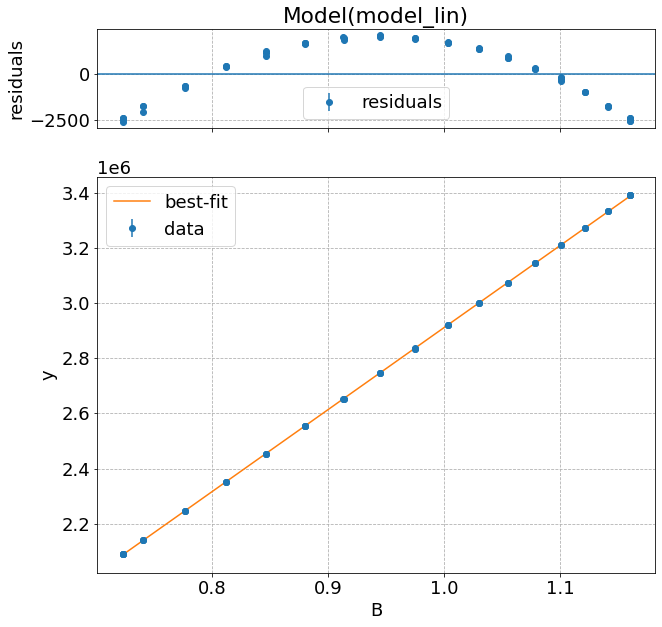

In [907]:
results.plot()

In [908]:
#plt.rcParams.update({"text.usetex": True})
plt.rcParams.update({"text.usetex": False})

In [909]:
plotdir

'/home/ckampa/data/hallprobecalib_extras/plots/hall_probe_B/07-15-21_12:53/'

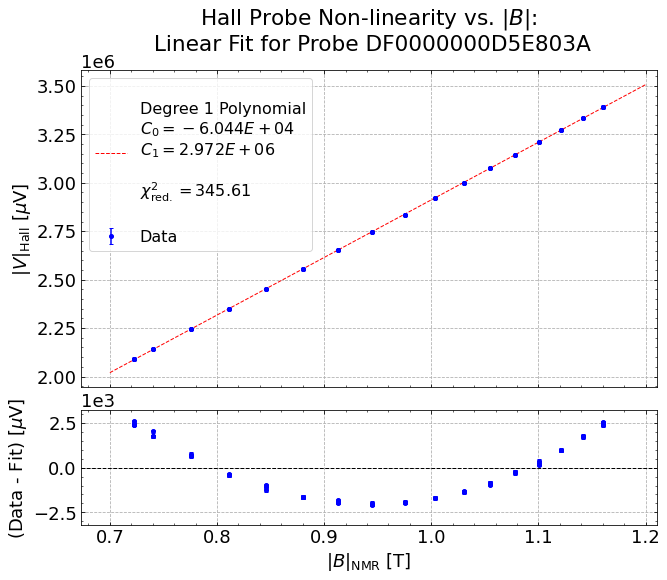

In [910]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.32, 0.8, 0.55))
ax2 = fig.add_axes((0.1, 0.08, 0.8, 0.2))
# globals
plotfile = plotdir+'V_vs_NMR_fit'
ndeg = 1
# full calculation
B_fine = np.linspace(0.7, 1.2, 100)
V_full = model_lin(B_fine, **results.params)
#B_full = ndeg_poly1d(df.I.values, **result.params)
# calculate residual (data - fit)
#res = df_.V.values - results.best_fit
res = results.data - results.best_fit
# full calculation
#res_full = df.B.values - B_full
# other formatting
fit_name = 'Polynomial Fit'
ylab = 'Fit'
datalab = ylab
# label for fit
label = '\n'
# label += (rf'$\underline{{\mathrm{{Degree\ {ndeg}\ Polynomial}}}}$'+
label += (rf'Degree {ndeg} Polynomial'+
         '\n')
label_coeffs = []
for i in range(ndeg+1):
    pv = results.params[f'C_{i}'].value
    label_coeffs.append(rf'$C_{{{i}}} = {pv:0.3E}$'+'\n')
label += (''.join(label_coeffs)+'\n'+
      rf'$\chi^2_\mathrm{{red.}} = {results.redchi:0.2f}$'+'\n')
# label_data = f'Finite Element \n+ Noise ({datalab})'
label_data = 'Data'

###

# fig.suptitle(f'Hall Probe: {probe}')
# ax.set_xlabel(r'$|B|_{\mathrm{Hall}}$ [T]')
# ax.set_ylabel(f'Hall probe Temperature [deg C]');

# ax.set_xlabel(r'$|B|_{\mathrm{NMR}}$ [T]')
# ax.set_ylabel(r'$|V|_{\mathrm{Hall}}$ [$\mu$V]');

###

ax1.errorbar(df_['NMR [T]'].values, df_[f'{probe}_Raw_Bmag'].values, yerr=np.ones_like(df_['NMR [T]'])*std_V, c='blue',
             fmt='o', ls='none', ms=4, zorder=100, capsize=2,
             label=label_data)
# residual
ax2.errorbar(df_['NMR [T]'].values, res, yerr=np.ones_like(df_['NMR [T]'])*std_V, fmt='o', ls='none', ms=4,
         c='blue', capsize=2, zorder=100)
# calculate ylimit for ax2
# yl = 1.2*(np.max(np.abs(res_full)) + ystd[0])
yl = 1.2*(np.max(np.abs(res)) + std_V)
fit_name = 'Linear Fit'
title = rf'Hall Probe Non-linearity vs. $|B|$:'+f'\n {fit_name} for Probe {probe}'

# plot
# fit
ax1.plot(B_fine, V_full, linewidth=1, color='red', linestyle='--',
         zorder=99, label=label)
# plot residual
# zero-line
xmin = np.min(df_['NMR [T]'].values) - 0.05
xmax = np.max(df_['NMR [T]'].values) + 0.05
ax2.plot([xmin, xmax], [0, 0], '--', color='black', linewidth=1,
         zorder=98)
# residual
# ax2.plot(df_['NMR'].values, res, linewidth=1, color=fitcolor,
#          zorder=99)
# formatting
# set ylimits
#ax1.set_ylim([-0.25, 1.5])
ax2.set_ylim([-yl, yl])
# remove ticklabels for ax1 xaxis
ax1.set_xticklabels([])
# axis labels
#ax2.set_xlabel('Magnet Current [A]')
ax2.set_ylabel(rf'(Data - {ylab}) [$\mu$V]')
ax2.set_xlabel(r'$|B|_{\mathrm{NMR}}$ [T]')
ax1.set_ylabel(r'$|V|_{\mathrm{Hall}}$ [$\mu$V]')
# ax1.set_ylabel(r'$|B|$')
# force consistent x axis range for ax1 and ax2
# tmin = np.min(df_.I.values) - 10
# tmax = np.max(df_.I.values) + 10
tmin = np.min(df_['NMR [T]'].values) - 0.05
tmax = np.max(df_['NMR [T]'].values) + 0.05
ax1.set_xlim([tmin, tmax])
ax2.set_xlim([tmin, tmax])
# turn on legend
ax1.legend(fontsize=16).set_zorder(101)
# add title
fig.suptitle(title)
# minor ticks
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
# inward ticks and ticks on right and top
ax1.tick_params(which='both', direction='in', top=True, right=True,
                bottom=True)
ax2.tick_params(which='both', direction='in', top=True, right=True)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
# save file
if not plotfile is None:
    fig.savefig(plotfile+'.pdf')
    fig.savefig(plotfile+'.png')

In [911]:
label

'\nDegree 1 Polynomial\n$C_{0} = -6.044E+04$\n$C_{1} = 2.972E+06$\n\n$\\chi^2_\\mathrm{red.} = 345.61$\n'

In [912]:
df_['Hall_NL_B'] = (results.data-results.best_fit)/results.best_fit * 100 # [%]

In [913]:
df_['Hall_NL_B']

Datetime
2021-07-15 13:16:29    0.124584
2021-07-15 13:16:48    0.116163
2021-07-15 13:17:07    0.115659
2021-07-15 13:17:27    0.115426
2021-07-15 13:17:46    0.117242
2021-07-15 13:15:12    0.095292
2021-07-15 13:15:31    0.082422
2021-07-15 13:15:50    0.082114
2021-07-15 13:13:48    0.034847
2021-07-15 13:14:07    0.029340
2021-07-15 13:14:26    0.029823
2021-07-15 13:12:31   -0.015701
2021-07-15 13:12:50   -0.018175
2021-07-15 13:13:09   -0.018510
2021-07-15 13:11:07   -0.040145
2021-07-15 13:11:26   -0.044962
2021-07-15 13:11:45   -0.051120
2021-07-15 13:09:31   -0.063950
2021-07-15 13:09:50   -0.064249
2021-07-15 13:10:10   -0.064562
2021-07-15 13:10:29   -0.064777
2021-07-15 13:08:08   -0.068805
2021-07-15 13:08:27   -0.073346
2021-07-15 13:08:46   -0.073982
2021-07-15 13:06:51   -0.071476
2021-07-15 13:07:11   -0.075659
2021-07-15 13:07:30   -0.074051
2021-07-15 13:05:29   -0.068292
2021-07-15 13:05:48   -0.066839
2021-07-15 13:06:12   -0.068827
2021-07-15 13:04:11   -0.057617

In [914]:
df_['Hall_NL_B'].describe()

count    56.000000
mean      0.001300
std       0.063407
min      -0.075659
25%      -0.057958
50%      -0.012971
75%       0.053018
max       0.124584
Name: Hall_NL_B, dtype: float64

In [915]:
model = lm.Model(model_lin, independent_vars=['B'])
params = lm.Parameters()
params.add('C_0', value=0, vary=True)
params.add('C_1', value=0, vary=True)
# params.add('C_1', value=1, vary=False)
results = model.fit(df_[f'{probe}_Cal_Bmag'].values, B=df_['NMR [T]'].values, params=params, weights= 1/std_B)

In [916]:
results

(<Figure size 720x720 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

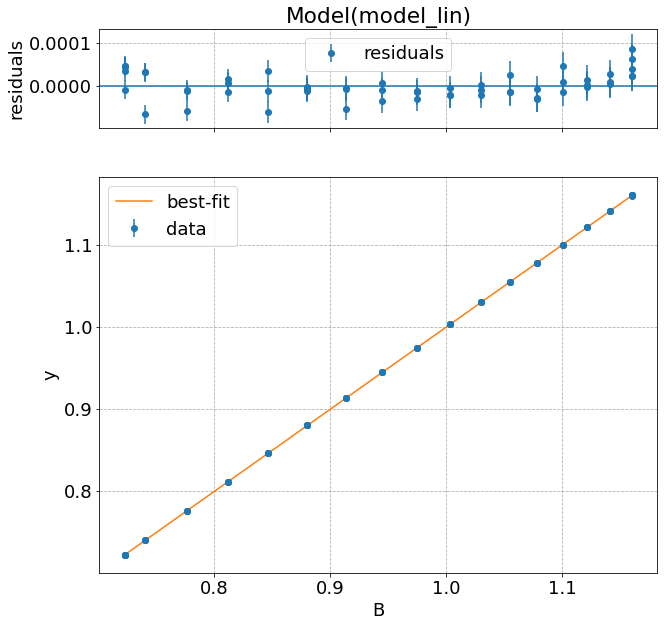

In [917]:
results.plot()

In [918]:
std_B

Datetime
2021-07-15 13:16:29    0.000022
2021-07-15 13:16:48    0.000022
2021-07-15 13:17:07    0.000022
2021-07-15 13:17:27    0.000022
2021-07-15 13:17:46    0.000022
2021-07-15 13:15:12    0.000022
2021-07-15 13:15:31    0.000022
2021-07-15 13:15:50    0.000022
2021-07-15 13:13:48    0.000023
2021-07-15 13:14:07    0.000023
2021-07-15 13:14:26    0.000023
2021-07-15 13:12:31    0.000024
2021-07-15 13:12:50    0.000024
2021-07-15 13:13:09    0.000024
2021-07-15 13:11:07    0.000025
2021-07-15 13:11:26    0.000025
2021-07-15 13:11:45    0.000025
2021-07-15 13:09:31    0.000026
2021-07-15 13:09:50    0.000026
2021-07-15 13:10:10    0.000026
2021-07-15 13:10:29    0.000026
2021-07-15 13:08:08    0.000027
2021-07-15 13:08:27    0.000027
2021-07-15 13:08:46    0.000027
2021-07-15 13:06:51    0.000028
2021-07-15 13:07:11    0.000028
2021-07-15 13:07:30    0.000028
2021-07-15 13:05:29    0.000029
2021-07-15 13:05:48    0.000029
2021-07-15 13:06:12    0.000029
2021-07-15 13:04:11    0.000030

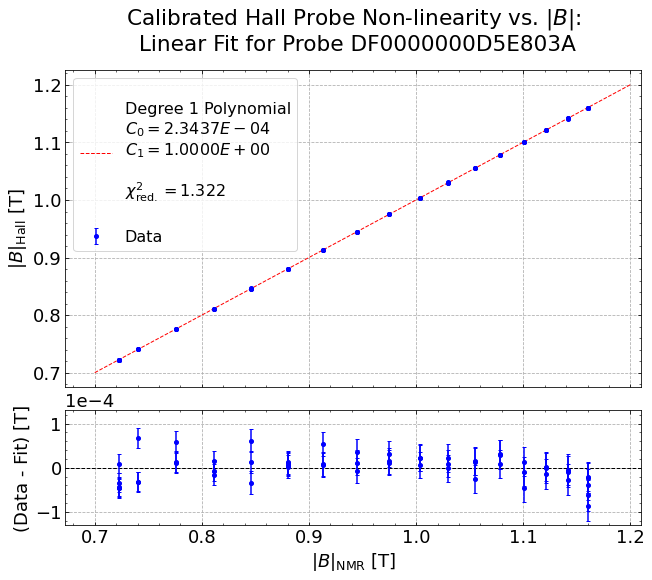

In [919]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.32, 0.8, 0.55))
ax2 = fig.add_axes((0.1, 0.08, 0.8, 0.2))
# globals
plotfile = plotdir+'B_cal_vs_NMR_fit'
ndeg = 1
# full calculation
B_fine = np.linspace(0.7, 1.2, 100)
V_full = model_lin(B_fine, **results.params)
#B_full = ndeg_poly1d(df.I.values, **result.params)
# calculate residual (data - fit)
#res = df_.V.values - results.best_fit
res = results.data - results.best_fit
# full calculation
#res_full = df.B.values - B_full
# other formatting
fit_name = 'Polynomial Fit'
ylab = 'Fit'
datalab = ylab
# label for fit
label = '\n'
# label += (rf'$\underline{{\mathrm{{Degree\ {ndeg}\ Polynomial}}}}$'+
label += (rf'Degree {ndeg} Polynomial'+
         '\n')
label_coeffs = []
for i in range(ndeg+1):
    pv = results.params[f'C_{i}'].value
    label_coeffs.append(rf'$C_{{{i}}} = {pv:0.4E}$'+'\n')
label += (''.join(label_coeffs)+'\n'+
      rf'$\chi^2_\mathrm{{red.}} = {results.redchi:0.3f}$'+'\n')
# label_data = f'Finite Element \n+ Noise ({datalab})'
label_data = 'Data'

###

# fig.suptitle(f'Hall Probe: {probe}')
# ax.set_xlabel(r'$|B|_{\mathrm{Hall}}$ [T]')
# ax.set_ylabel(f'Hall probe Temperature [deg C]');

# ax.set_xlabel(r'$|B|_{\mathrm{NMR}}$ [T]')
# ax.set_ylabel(r'$|V|_{\mathrm{Hall}}$ [$\mu$V]');

###

ax1.errorbar(df_['NMR [T]'].values, df_[f'{probe}_Cal_Bmag'].values, yerr=std_B, c='blue',
             fmt='o', ls='none', ms=4, zorder=100, capsize=2,
             label=label_data)
# residual
ax2.errorbar(df_['NMR [T]'].values, res, yerr=std_B, fmt='o', ls='none', ms=4,
         c='blue', capsize=2, zorder=100)
# calculate ylimit for ax2
# yl = 1.2*(np.max(np.abs(res_full)) + ystd[0])
yl = 1.2*(np.max(np.abs(res)) + std_B[0])
fit_name = 'Linear Fit'
title = rf'Calibrated Hall Probe Non-linearity vs. $|B|$:'+f'\n {fit_name} for Probe {probe}'

# plot
# fit
ax1.plot(B_fine, V_full, linewidth=1, color='red', linestyle='--',
         zorder=99, label=label)
# plot residual
# zero-line
xmin = np.min(df_['NMR [T]'].values) - 0.05
xmax = np.max(df_['NMR [T]'].values) + 0.05
ax2.plot([xmin, xmax], [0, 0], '--', color='black', linewidth=1,
         zorder=98)
# residual
# ax2.plot(df_['NMR'].values, res, linewidth=1, color=fitcolor,
#          zorder=99)
# formatting
# set ylimits
#ax1.set_ylim([-0.25, 1.5])
ax2.set_ylim([-yl, yl])
# remove ticklabels for ax1 xaxis
ax1.set_xticklabels([])
# axis labels
#ax2.set_xlabel('Magnet Current [A]')
ax2.set_ylabel(f'(Data - {ylab}) [T]')
ax2.set_xlabel(r'$|B|_{\mathrm{NMR}}$ [T]')
ax1.set_ylabel(r'$|B|_{\mathrm{Hall}}$ [T]')
# ax1.set_ylabel(r'$|B|$')
# force consistent x axis range for ax1 and ax2
# tmin = np.min(df_.I.values) - 10
# tmax = np.max(df_.I.values) + 10
tmin = np.min(df_['NMR [T]'].values) - 0.05
tmax = np.max(df_['NMR [T]'].values) + 0.05
ax1.set_xlim([tmin, tmax])
ax2.set_xlim([tmin, tmax])
# turn on legend
ax1.legend(fontsize=16).set_zorder(101)
# add title
fig.suptitle(title)
# minor ticks
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
# inward ticks and ticks on right and top
ax1.tick_params(which='both', direction='in', top=True, right=True,
                bottom=True)
ax2.tick_params(which='both', direction='in', top=True, right=True)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
# save file
if not plotfile is None:
    fig.savefig(plotfile+'.pdf')
    fig.savefig(plotfile+'.png')

In [842]:
df_

Time  Magnet Current [A]  \
Datetime                                                         
2021-07-15 12:27:59  7/15/2021 12:27:59 PM          124.835760   
2021-07-15 12:28:26  7/15/2021 12:28:26 PM          124.835817   
2021-07-15 12:28:45  7/15/2021 12:28:45 PM          124.835817   
2021-07-15 12:29:04  7/15/2021 12:29:04 PM          124.835760   
2021-07-15 12:29:23  7/15/2021 12:29:23 PM          124.835760   
2021-07-15 12:29:42  7/15/2021 12:29:42 PM          124.835760   
2021-07-15 12:25:45  7/15/2021 12:25:45 PM          128.036010   
2021-07-15 12:26:05  7/15/2021 12:26:05 PM          128.036180   
2021-07-15 12:26:24  7/15/2021 12:26:24 PM          128.036067   
2021-07-15 12:26:43  7/15/2021 12:26:43 PM          128.036123   
2021-07-15 12:27:02  7/15/2021 12:27:02 PM          128.036010   
2021-07-15 12:24:21  7/15/2021 12:24:21 PM          134.438380   
2021-07-15 12:24:41  7/15/2021 12:24:41 PM          134.438210   
2021-07-15 12:22:45  7/15/2021 12:22:45 PM          140.839843   
2021-07-15 12:23:04  7/15/2021 12:23:04 PM          140.839730   
2021-07-15 12:23:24  7/15/2021 12:23:24 PM          140.839787   
2021-07-15 12:21:20  7/15/2021 12:21:20 PM          147.241420   
2021-07-15 12:21:40  7/15/2021 12:21:40 PM          147.241420   
2021-07-15 12:19:45  7/15/2021 12:19:45 PM          153.644300   
2021-07-15 12:20:04  7/15/2021 12:20:04 PM          153.644187   
2021-07-15 12:20:24  7/15/2021 12:20:24 PM          153.644243   
2021-07-15 12:18:22  7/15/2021 12:18:22 PM          160.044517   
2021-07-15 12:18:42  7/15/2021 12:18:42 PM          160.044687   
2021-07-15 12:17:05  7/15/2021 12:17:05 PM          166.445300   
2021-07-15 12:17:25  7/15/2021 12:17:25 PM          166.445300   
2021-07-15 12:15:24  7/15/2021 12:15:24 PM          172.847953   
2021-07-15 12:15:44  7/15/2021 12:15:44 PM          172.847840   
2021-07-15 12:16:03  7/15/2021 12:16:03 PM          172.847953   
2021-07-15 12:14:06  7/15/2021 12:14:06 PM          179.249530   
2021-07-15 12:14:25  7/15/2021 12:14:25 PM          179.249700   
2021-07-15 12:12:44  7/15/2021 12:12:44 PM          185.651220   
2021-07-15 12:13:03  7/15/2021 12:13:03 PM          185.650880   
2021-07-15 12:11:25  7/15/2021 12:11:25 PM          192.053137   
2021-07-15 12:11:45  7/15/2021 12:11:45 PM          192.053193   
2021-07-15 12:10:26  7/15/2021 12:10:26 PM          198.455393   
2021-07-15 12:08:44  7/15/2021 12:08:44 PM          204.857140   
2021-07-15 12:09:04  7/15/2021 12:09:04 PM          204.857083   
2021-07-15 12:07:26  7/15/2021 12:07:26 PM          211.258320   
2021-07-15 12:07:46  7/15/2021 12:07:46 PM          211.258320   
2021-07-15 12:06:04  7/15/2021 12:06:04 PM          217.659160   
2021-07-15 12:06:23  7/15/2021 12:06:23 PM          217.659103   
2021-07-15 12:04:45  7/15/2021 12:04:45 PM          224.061587   
2021-07-15 12:05:05  7/15/2021 12:05:05 PM          224.061587   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  \
Datetime                                                       
2021-07-15 12:27:59           15.274835  0.722720        0.0   
2021-07-15 12:28:26           15.266255  0.722718        0.0   
2021-07-15 12:28:45           15.260263  0.722716        0.0   
2021-07-15 12:29:04           15.254553  0.722716        0.0   
2021-07-15 12:29:23           15.249018  0.722716        0.0   
2021-07-15 12:29:42           15.243697  0.722715        0.0   
2021-07-15 12:25:45           15.715013  0.740612        0.0   
2021-07-15 12:26:05           15.707545  0.740611        0.0   
2021-07-15 12:26:24           15.700372  0.740610        0.0   
2021-07-15 12:26:43           15.693470  0.740609        0.0   
2021-07-15 12:27:02           15.686720  0.740608        0.0   
2021-07-15 12:24:21           16.535785  0.776190        0.0   
2021-07-15 12:24:41           16.528258  0.776187        0.0   
2021-07-15 12:22:45           17.363082  0.811494        0.0   
2021-07-15 12:23:04           17.355322  0.

In [920]:
df_.min()

Time                             7/15/2021 12:54:12 PM
Magnet Current [A]                           124.83576
Magnet Voltage [V]                           15.263992
NMR [T]                                       0.722648
NMR [FFT]                                          0.0
DF0000000D5E803A_Raw_X                         81105.0
DF0000000D5E803A_Raw_Y                       -105974.0
DF0000000D5E803A_Raw_Z                      -3386354.0
DF0000000D5E803A_Raw_T                         18490.0
DF0000000D5E803A_Cal_X                        0.721982
DF0000000D5E803A_Cal_Y                       -0.053824
DF0000000D5E803A_Cal_Z                       -0.016844
DF0000000D5E803A_Cal_T                           18.49
Zaber_Meas_Micron_X                      181023.828125
Zaber_Meas_Encoder_X                          463421.0
Zaber_Meas_Micron_Y                      165887.890625
Zaber_Meas_Encoder_Y                          424673.0
Zaber_Meas_Micron_Z                          654343.75
Zaber_Meas

In [921]:
_ = df_.query('`Magnet Current [A]` < 125.')

In [922]:
_

Time  Magnet Current [A]  \
Datetime                                                        
2021-07-15 13:16:29  7/15/2021 1:16:29 PM          124.835817   
2021-07-15 13:16:48  7/15/2021 1:16:48 PM          124.835873   
2021-07-15 13:17:07  7/15/2021 1:17:07 PM          124.835817   
2021-07-15 13:17:27  7/15/2021 1:17:27 PM          124.835873   
2021-07-15 13:17:46  7/15/2021 1:17:46 PM          124.835760   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  \
Datetime                                                       
2021-07-15 13:16:29           15.290470  0.722665        0.0   
2021-07-15 13:16:48           15.283530  0.722653        0.0   
2021-07-15 13:17:07           15.276770  0.722651        0.0   
2021-07-15 13:17:27           15.270230  0.722650        0.0   
2021-07-15 13:17:46           15.263992  0.722648        0.0   

                     DF0000000D5E803A_Raw_X  DF0000000D5E803A_Raw_Y  \
Datetime                                                              
2021-07-15 13:16:29                 81216.0                -64373.0   
2021-07-15 13:16:48                 81105.0                -64355.0   
2021-07-15 13:17:07                 81153.0                -64410.0   
2021-07-15 13:17:27                 81228.0                -64349.0   
2021-07-15 13:17:46                 81111.0                -64345.0   

                     DF0000000D5E803A_Raw_Z  DF0000000D5E803A_Raw_T  \
Datetime                                                              
2021-07-15 13:16:29              -2087445.0                 18603.0   
2021-07-15 13:16:48              -2087238.0                 18620.0   
2021-07-15 13:17:07              -2087217.0                 18639.0   
2021-07-15 13:17:27              -2087208.0                 18638.0   
2021-07-15 13:17:46              -2087247.0                 18636.0   

                     DF0000000D5E803A_Cal_X  ...  DF0000000D5E803A_Raw_Bmag  \
Datetime                                     ...                              
2021-07-15 13:16:29                0.722053  ...               2.090016e+06   
2021-07-15 13:16:48                0.721987  ...               2.089804e+06   
2021-07-15 13:17:07                0.721986  ...               2.089787e+06   
2021-07-15 13:17:27                0.721982  ...               2.089779e+06   
2021-07-15 13:17:46                0.721995  ...               2.089813e+06   

                     DF0000000D5E803A_Raw_Theta  DF0000000D5E803A_Raw_Phi  \
Datetime                                                                    
2021-07-15 13:16:29                    3.091987                 -0.670221   
2021-07-15 13:16:48                    3.092029                 -0.670751   
2021-07-15 13:17:07                    3.091994                 -0.670879   
2021-07-15 13:17:27                    3.091984                 -0.669968   
2021-07-15 13:17:46                    3.092030                 -0.670640   

                     DF0000000D5E803A_Cal_Bmag  DF0000000D5E803A_Cal_Theta  \
Datetime                                                                     
2021-07-15 13:16:29                   0.722909                    1.585275   
2021-07-15 13:16:48                   0.722842                    1.585224   
2021-07-15 13:17:07                   0.722842                    1.585249   
2021-07-15 13:17:27                   0.722838                    1.585288   
2021-07-15 13:17:46                   0.722850                    1.585228   

                     DF0000000D5E803A_Cal_Phi  Magnet Resistance [Ohm]  \
Datetime                                                                 
2021-07-15 13:16:29                 -0.046461                 0.122485   
2021-07-15 13:16:48                 -0.046456                 0.122429   
2021-07-15 13:17:07                 -0.046483                 0.122375   
2021-07-15 13:17:27                 -0.046452                 0.122322   
2021-07-15 13:17:46                 -0.046450      

In [924]:
_[[f'{probe}_Raw_Bmag', f'{probe}_Cal_T', 'NMR [T]']]

DF0000000D5E803A_Raw_Bmag  DF0000000D5E803A_Cal_T  \
Datetime                                                                 
2021-07-15 13:16:29               2.090016e+06                  18.603   
2021-07-15 13:16:48               2.089804e+06                  18.620   
2021-07-15 13:17:07               2.089787e+06                  18.639   
2021-07-15 13:17:27               2.089779e+06                  18.638   
2021-07-15 13:17:46               2.089813e+06                  18.636   

                      NMR [T]  
Datetime                       
2021-07-15 13:16:29  0.722665  
2021-07-15 13:16:48  0.722653  
2021-07-15 13:17:07  0.722651  
2021-07-15 13:17:27  0.722650  
2021-07-15 13:17:46  0.722648

In [ ]:
results = np.linspace()

In [ ]:
lm.Mod

# OLD

In [61]:
df = pd.read_csv(slowfile, names=main_header, skiprows=1)

In [66]:
df = pd.read_csv(slowfile, skiprows=1)

In [67]:
df

7/7/2021 2:44:03 PM  224.060850000  28.968400000  1.160497934  \
0   7/7/2021 2:44:25 PM     224.060963     28.969417     1.160496   
1   7/7/2021 2:44:56 PM     224.061020     28.970050     1.160496   
2   7/7/2021 2:45:15 PM     224.061020     28.970517     1.160495   
3   7/7/2021 2:45:34 PM     224.060963     28.970900     1.160495   
4   7/7/2021 2:45:53 PM     224.061020     28.971333     1.160494   
5   7/7/2021 2:46:12 PM     224.061020     28.971783     1.160494   
6   7/7/2021 2:46:20 PM     220.866267     28.564817     0.000000   
7   7/7/2021 2:46:38 PM     220.859863     28.556217     0.000000   
8   7/7/2021 2:46:57 PM     220.859750     28.554683     0.000000   
9   7/7/2021 2:47:15 PM     220.859920     28.553267     0.000000   
10  7/7/2021 2:47:26 PM     220.859750     28.552317     0.000000   
11  7/7/2021 2:47:56 PM     220.859580     28.550333     1.151026   
12  7/7/2021 2:48:15 PM     220.859637     28.548800     1.151025   
13  7/7/2021 2:48:34 PM     220.859750     28.547467     1.151024   
14  7/7/2021 2:48:53 PM     215.151547     27.499350     1.151015   
15  7/7/2021 2:49:11 PM     214.458117     27.713883     0.000000   
16  7/7/2021 2:49:34 PM     214.458343     27.707883     1.131482   
17  7/7/2021 2:49:53 PM     214.458173     27.703150     1.131481   
18  7/7/2021 2:50:12 PM     214.458117     27.698817     1.131480   
19  7/7/2021 2:50:30 PM     204.856120     26.450267     0.000000   
20  7/7/2021 2:50:56 PM     204.856347     26.437667     1.100378   
21  7/7/2021 2:51:15 PM     204.856177     26.428917     1.100377   
22  7/7/2021 2:51:34 PM     199.167127     25.510683     1.099328   
23  7/7/2021 2:51:59 PM     198.454543     25.579917     1.078265   
24  7/7/2021 2:52:18 PM     198.454487     25.569250     1.078263   
25  7/7/2021 2:52:37 PM     198.454373     25.558983     1.078262   
26  7/7/2021 2:52:55 PM     192.052400     24.722983     0.000000   
27  7/7/2021 2:53:13 PM     192.052400     24.711267     0.000000   
28  7/7/2021 2:53:31 PM     192.052400     24.699900     0.000000   
29  7/7/2021 2:53:56 PM     192.052400     24.685083     0.000000   
30  7/7/2021 2:54:14 PM     192.052343     24.674767     0.000000   
31  7/7/2021 2:54:33 PM     192.052400     24.663983     1.054850   
32  7/7/2021 2:54:52 PM     192.052400     24.653683     1.054849   
33  7/7/2021 2:55:11 PM     192.052400     24.643650     1.054848   
34  7/7/2021 2:55:19 PM     188.659370     24.171800     0.000000   
35  7/7/2021 2:55:37 PM     185.650200     23.806450     0.000000   
36  7/7/2021 2:55:55 PM     185.650257     23.795417     0.000000   
37  7/7/2021 2:56:13 PM     185.650257     23.784583     0.000000   
38  7/7/2021 2:56:32 PM     185.650200     23.773533     1.029909   
39  7/7/2021 2:56:56 PM     185.650200     23.760117     1.029909   
40  7/7/2021 2:57:15 PM     185.650200     23.750033     1.029908   
41  7/7/2021 2:57:34 PM     185.650370     23.740100     1.029907   
42  7/7/2021 2:57:52 PM     179.248963     22.910750     0.000000   
43  7/7/2021 2:58:11 PM     179.248850     22.899133     1.003193   
44  7/7/2021 2:58:30 PM     179.248963     22.887900     1.003191   

    0.000000000  74660.000000000  -126510.000000000  -3200353.000000000  \
0           0.0          74831.0          -126642.0          -3200305.0   
1           0.0          74685.0          -126631.0          -3200553.0   
2           0.0          74804.0          -126609.0          -3200353.0   
3           0.0          74663.0          -126586.0          -3200417.0   
4           0.0          74778.0          -126513.0          -3200355.0   
5           0.0          74780.0          -126537.0          -3200441.0   
6           0.0          74717.0          -126662.0          -3200493.0   
7           0.0          74063.0          -125456.0          -3173428.0   
8           0.0          74134.0          -125469.0          -3173529.0   
9           0.0          74027.0          -125582.0          -3173400.0   
10  

In [68]:
len(df.columns)

23

In [69]:
len(main_header)

22

In [70]:
df.iloc[0]

7/7/2021 2:44:03 PM    7/7/2021 2:44:25 PM
224.060850000                   224.060963
28.968400000                     28.969417
1.160497934                       1.160496
0.000000000                            0.0
74660.000000000                    74831.0
-126510.000000000                -126642.0
-3200353.000000000              -3200305.0
19588.000000000                    19591.0
1.159595143                       1.159579
-0.051193884                     -0.051242
-0.017217637                     -0.017281
19.588000000                        19.591
181020.312500000               181020.3125
463412.000000000                  463412.0
165887.890625000             165887.890625
424673.000000000                  424673.0
654341.796875000             654341.796875
1675115.000000000                1675115.0
0.000007000                       0.000005
0.000000000.1                          0.0
292.936711000                   292.936722
-1.000000000                          -1.0
Name: 0, dt

In [51]:
df

Time  Magnet Current [A]  \
Datetime                                                       
2021-07-07 14:44:03  7/7/2021 2:44:03 PM          224.060850   
2021-07-07 14:44:25  7/7/2021 2:44:25 PM          224.060963   
2021-07-07 14:44:56  7/7/2021 2:44:56 PM          224.061020   
2021-07-07 14:45:15  7/7/2021 2:45:15 PM          224.061020   
2021-07-07 14:45:34  7/7/2021 2:45:34 PM          224.060963   
2021-07-07 14:45:53  7/7/2021 2:45:53 PM          224.061020   
2021-07-07 14:46:12  7/7/2021 2:46:12 PM          224.061020   
2021-07-07 14:46:20  7/7/2021 2:46:20 PM          220.866267   
2021-07-07 14:46:38  7/7/2021 2:46:38 PM          220.859863   
2021-07-07 14:46:57  7/7/2021 2:46:57 PM          220.859750   
2021-07-07 14:47:15  7/7/2021 2:47:15 PM          220.859920   
2021-07-07 14:47:26  7/7/2021 2:47:26 PM          220.859750   
2021-07-07 14:47:56  7/7/2021 2:47:56 PM          220.859580   
2021-07-07 14:48:15  7/7/2021 2:48:15 PM          220.859637   
2021-07-07 14:48:34  7/7/2021 2:48:34 PM          220.859750   
2021-07-07 14:48:53  7/7/2021 2:48:53 PM          215.151547   
2021-07-07 14:49:11  7/7/2021 2:49:11 PM          214.458117   
2021-07-07 14:49:34  7/7/2021 2:49:34 PM          214.458343   
2021-07-07 14:49:53  7/7/2021 2:49:53 PM          214.458173   
2021-07-07 14:50:12  7/7/2021 2:50:12 PM          214.458117   
2021-07-07 14:50:30  7/7/2021 2:50:30 PM          204.856120   
2021-07-07 14:50:56  7/7/2021 2:50:56 PM          204.856347   
2021-07-07 14:51:15  7/7/2021 2:51:15 PM          204.856177   
2021-07-07 14:51:34  7/7/2021 2:51:34 PM          199.167127   
2021-07-07 14:51:59  7/7/2021 2:51:59 PM          198.454543   
2021-07-07 14:52:18  7/7/2021 2:52:18 PM          198.454487   
2021-07-07 14:52:37  7/7/2021 2:52:37 PM          198.454373   
2021-07-07 14:52:55  7/7/2021 2:52:55 PM          192.052400   
2021-07-07 14:53:13  7/7/2021 2:53:13 PM          192.052400   
2021-07-07 14:53:31  7/7/2021 2:53:31 PM          192.052400   
2021-07-07 14:53:56  7/7/2021 2:53:56 PM          192.052400   
2021-07-07 14:54:14  7/7/2021 2:54:14 PM          192.052343   
2021-07-07 14:54:33  7/7/2021 2:54:33 PM          192.052400   
2021-07-07 14:54:52  7/7/2021 2:54:52 PM          192.052400   
2021-07-07 14:55:11  7/7/2021 2:55:11 PM          192.052400   
2021-07-07 14:55:19  7/7/2021 2:55:19 PM          188.659370   
2021-07-07 14:55:37  7/7/2021 2:55:37 PM          185.650200   
2021-07-07 14:55:55  7/7/2021 2:55:55 PM          185.650257   
2021-07-07 14:56:13  7/7/2021 2:56:13 PM          185.650257   
2021-07-07 14:56:32  7/7/2021 2:56:32 PM          185.650200   
2021-07-07 14:56:56  7/7/2021 2:56:56 PM          185.650200   
2021-07-07 14:57:15  7/7/2021 2:57:15 PM          185.650200   
2021-07-07 14:57:34  7/7/2021 2:57:34 PM          185.650370   
2021-07-07 14:57:52  7/7/2021 2:57:52 PM          179.248963   
2021-07-07 14:58:11  7/7/2021 2:58:11 PM          179.248850   
2021-07-07 14:58:30  7/7/2021 2:58:30 PM          179.248963   

                     Magnet Voltage [V]    Coil 1  Coil 2  LCW in Coil1  \
Datetime                                                                  
2021-07-07 14:44:03           28.968400  1.160498     0.0       74660.0   
2021-07-07 14:44:25           28.969417  1.160496     0.0       74831.0   
2021-07-07 14:44:56           28.970050  1.160496     0.0       74685.0   
2021-07-07 14:45:15           28.970517  1.160495     0.0       74804.0   
2021-07-07 14:45:34           28.970900  1.160495     0.0       74663.0   
2021-07-07 14:45:53           28.971333  1.160494     0.0       74778.0   
2021-07-07 14:46:12           28.971783  1.160494     0.0       74780.0   
2021-07-07 14:46:20           28.564817  0.000000     0.0       74717.0   
2021-07-07 14:46:38           28.556217  0.000000     0.0       74063.0   
2021-07-07 14:46:57           28.554683  0.000000     0.0       74134.0   
2021-07-07 14:47:15           28.553267  0.000000     0.0      

In [46]:
df = pd.read_csv(slowtempfile)

In [47]:
df

Time   Magnet Current [A]   Magnet Voltage [V]     Coil 1  \
0  7/7/2021 2:38:32 PM                  0.0                  0.0  48.936912   
1  7/7/2021 2:38:54 PM                  0.0                  0.0  48.943649   
2  7/7/2021 2:41:54 PM                  0.0                  0.0  49.004757   
3  7/7/2021 2:44:55 PM                  0.0                  0.0  48.954624   
4  7/7/2021 2:47:54 PM                  0.0                  0.0  48.929981   
5  7/7/2021 2:50:54 PM                  0.0                  0.0  48.691925   
6  7/7/2021 2:53:54 PM                  0.0                  0.0  47.774479   

      Coil 2   LCW in Coil1   LCW out Coil 1   LCW in Coil 2   LCW out Coil 2  \
0  47.425968      32.274300        33.422031       31.506348        37.472729   
1  47.433231      32.287758        33.456692       31.491156        37.449242   
2  47.465843      32.335178        33.524258       31.483490        37.502358   
3  47.504112      32.365314        33.500046       31.505007        37.516396   
4  47.499222      32.374344        33.486736       31.583727        37.553425   
5  47.176178      32.446735        33.556869       31.549520        37.516769   
6  46.260929      32.533855        33.564064       31.482031        37.292118   

    Yoke (near pole)  ...     ICW in   ICW HE1 out   ICW He2 out  \
0          23.561287  ...  25.793650     27.808342     29.610033   
1          23.567184  ...  25.789263     27.815998     29.615744   
2          23.629854  ...  25.797504     27.824068     29.624645   
3          23.682873  ...  25.791111     27.826961     29.637407   
4          23.740257  ...  25.796698     27.835760     29.668817   
5          23.802498  ...  25.808756     27.843811     29.689852   
6          23.852039  ...  25.812002     27.867193     29.742788   

    LCW return magnet   LCW to barrel   LCW from PS  LCW to magnet   NMR [T]  \
0           35.912502       31.609009     36.574127      32.699467       0.0   
1           35.929153       31.616142     36.579002      32.705559       0.0   
2           35.986156       31.653955     36.629402      32.740330       0.0   
3           36.000343       31.669956     36.654308      32.777153       0.0   
4           36.031479       31.695122     36.732952      32.803288       0.0   
5           36.085167       31.713545     36.833069      32.857342       0.0   
6           36.097065       31.734590     36.940494      32.928562       0.0   

    NMR [FFT]      
0         0.0 NaN  
1         0.0 NaN  
2         0.0 NaN  
3         0.0 NaN  
4         0.0 NaN  
5         0.0 NaN  
6         0.0 NaN  

[7 rows x 46 columns]

In [44]:
df = pd.read_csv(slowtempfile, names=temp_header, skiprows=1)

In [45]:
df

Time  Magnet Current [A]  Magnet Voltage [V]  \
7/7/2021 2:38:32 PM 0.0   0.0           48.936912           47.425968   
7/7/2021 2:38:54 PM 0.0   0.0           48.943649           47.433231   
7/7/2021 2:41:54 PM 0.0   0.0           49.004757           47.465843   
7/7/2021 2:44:55 PM 0.0   0.0           48.954624           47.504112   
7/7/2021 2:47:54 PM 0.0   0.0           48.929981           47.499222   
7/7/2021 2:50:54 PM 0.0   0.0           48.691925           47.176178   
7/7/2021 2:53:54 PM 0.0   0.0           47.774479           46.260929   

                            Coil 1     Coil 2  LCW in Coil1  LCW out Coil 1  \
7/7/2021 2:38:32 PM 0.0  32.274300  33.422031     31.506348       37.472729   
7/7/2021 2:38:54 PM 0.0  32.287758  33.456692     31.491156       37.449242   
7/7/2021 2:41:54 PM 0.0  32.335178  33.524258     31.483490       37.502358   
7/7/2021 2:44:55 PM 0.0  32.365314  33.500046     31.505007       37.516396   
7/7/2021 2:47:54 PM 0.0  32.374344  33.486736     31.583727       37.553425   
7/7/2021 2:50:54 PM 0.0  32.446735  33.556869     31.549520       37.516769   
7/7/2021 2:53:54 PM 0.0  32.533855  33.564064     31.482031       37.292118   

                         LCW in Coil 2  LCW out Coil 2  Yoke (near pole)  ...  \
7/7/2021 2:38:32 PM 0.0      23.561287       18.510298         19.008680  ...   
7/7/2021 2:38:54 PM 0.0      23.567184       18.433395         19.014805  ...   
7/7/2021 2:41:54 PM 0.0      23.629854       18.635176         19.038481  ...   
7/7/2021 2:44:55 PM 0.0      23.682873       18.461386         19.047747  ...   
7/7/2021 2:47:54 PM 0.0      23.740257       18.636726         19.070559  ...   
7/7/2021 2:50:54 PM 0.0      23.802498       18.592169         19.085577  ...   
7/7/2021 2:53:54 PM 0.0      23.852039       18.620808         19.096884  ...   

                         Tripplite HVAC exhaust  LCW to PS  LCW in barrel  \
7/7/2021 2:38:32 PM 0.0               30.930239  25.793650      27.808342   
7/7/2021 2:38:54 PM 0.0               30.943043  25.789263      27.815998   
7/7/2021 2:41:54 PM 0.0               30.968144  25.797504      27.824068   
7/7/2021 2:44:55 PM 0.0               31.003309  25.791111      27.826961   
7/7/2021 2:47:54 PM 0.0               31.026340  25.796698      27.835760   
7/7/2021 2:50:54 PM 0.0               31.050180  25.808756      27.843811   
7/7/2021 2:53:54 PM 0.0               31.084146  25.812002      27.867193   

                            ICW in  ICW HE1 out  ICW He2 out  \
7/7/2021 2:38:32 PM 0.0  29.610033    35.912502    31.609009   
7/7/2021 2:38:54 PM 0.0  29.615744    35.929153    31.616142   
7/7/2021 2:41:54 PM 0.0  29.624645    35.986156    31.653955   
7/7/2021 2:44:55 PM 0.0  29.637407    36.000343    31.669956   
7/7/2021 2:47:54 PM 0.0  29.668817    36.031479    31.695122   
7/7/2021 2:50:54 PM 0.0  29.689852    36.085167    31.713545   
7/7/2021 2:53:54 PM 0.0  29.742788    36.097065    31.734590   

                         LCW return magnet  LCW to barrel  LCW from PS  \
7/7/2021 2:38:32 PM 0.0          36.574127      32.699467          0.0   
7/7/2021 2:38:54 PM 0.0          36.579002      32.705559          0.0   
7/7/2021 2:41:54 PM 0.0          36.629402      32.740330          0.0   
7/7/2021 2:44:55 PM 0.0          36.654308      32.777153          0.0   
7/7/2021 2:47:54 PM 0.0          36.732952      32.803288          0.0   
7/7/2021 2:50:54 PM 0.0          36.833069      32.857342          0.0   
7/7/2021 2:53:54 PM 0.0          36.940494      32.928562          0.0   

                         LCW to magnet  
7/7/2021 2:38:32 PM 0.0            0.0  
7/7/2021 2:38:54 PM 0.0            0.0  
7/7/2021 2:41:54 PM 0.0            0.0  
7/7/2021 2:44:55 PM 0.0            0.0  
7/7/2021 2:47:54 PM 0.0            0.0  
7/7/2021 2:50:54 PM 0.0            0.0  
7/7/2021 2:53:54 PM 0.0            0.0  

[7 rows x 43 columns]

In [ ]:
# parse dates and set as index
    dates = [parser.parse(row.Time) for row in df.itertuples()]
    df['Datetime'] = pd.to_datetime(dates)
    df.sort_values(by=['Datetime'], inplace=True)
    df = df.set_index('Datetime')

In [39]:
df_temp = load_data(slowtempfile, header=temp_header)

TypeError: Parser must be a string or character stream, not float

In [7]:
df

Time  Magnet Current [A]  \
Datetime                                                       
2021-07-07 14:44:03  7/7/2021 2:44:03 PM          224.060850   
2021-07-07 14:44:25  7/7/2021 2:44:25 PM          224.060963   
2021-07-07 14:44:56  7/7/2021 2:44:56 PM          224.061020   
2021-07-07 14:45:15  7/7/2021 2:45:15 PM          224.061020   
2021-07-07 14:45:34  7/7/2021 2:45:34 PM          224.060963   
2021-07-07 14:45:53  7/7/2021 2:45:53 PM          224.061020   
2021-07-07 14:46:12  7/7/2021 2:46:12 PM          224.061020   
2021-07-07 14:46:20  7/7/2021 2:46:20 PM          220.866267   
2021-07-07 14:46:38  7/7/2021 2:46:38 PM          220.859863   
2021-07-07 14:46:57  7/7/2021 2:46:57 PM          220.859750   
2021-07-07 14:47:15  7/7/2021 2:47:15 PM          220.859920   
2021-07-07 14:47:26  7/7/2021 2:47:26 PM          220.859750   
2021-07-07 14:47:56  7/7/2021 2:47:56 PM          220.859580   
2021-07-07 14:48:15  7/7/2021 2:48:15 PM          220.859637   
2021-07-07 14:48:34  7/7/2021 2:48:34 PM          220.859750   
2021-07-07 14:48:53  7/7/2021 2:48:53 PM          215.151547   
2021-07-07 14:49:11  7/7/2021 2:49:11 PM          214.458117   
2021-07-07 14:49:34  7/7/2021 2:49:34 PM          214.458343   
2021-07-07 14:49:53  7/7/2021 2:49:53 PM          214.458173   
2021-07-07 14:50:12  7/7/2021 2:50:12 PM          214.458117   
2021-07-07 14:50:30  7/7/2021 2:50:30 PM          204.856120   
2021-07-07 14:50:56  7/7/2021 2:50:56 PM          204.856347   
2021-07-07 14:51:15  7/7/2021 2:51:15 PM          204.856177   
2021-07-07 14:51:34  7/7/2021 2:51:34 PM          199.167127   
2021-07-07 14:51:59  7/7/2021 2:51:59 PM          198.454543   
2021-07-07 14:52:18  7/7/2021 2:52:18 PM          198.454487   
2021-07-07 14:52:37  7/7/2021 2:52:37 PM          198.454373   
2021-07-07 14:52:55  7/7/2021 2:52:55 PM          192.052400   
2021-07-07 14:53:13  7/7/2021 2:53:13 PM          192.052400   
2021-07-07 14:53:31  7/7/2021 2:53:31 PM          192.052400   
2021-07-07 14:53:56  7/7/2021 2:53:56 PM          192.052400   
2021-07-07 14:54:14  7/7/2021 2:54:14 PM          192.052343   
2021-07-07 14:54:33  7/7/2021 2:54:33 PM          192.052400   
2021-07-07 14:54:52  7/7/2021 2:54:52 PM          192.052400   
2021-07-07 14:55:11  7/7/2021 2:55:11 PM          192.052400   
2021-07-07 14:55:19  7/7/2021 2:55:19 PM          188.659370   
2021-07-07 14:55:37  7/7/2021 2:55:37 PM          185.650200   
2021-07-07 14:55:55  7/7/2021 2:55:55 PM          185.650257   
2021-07-07 14:56:13  7/7/2021 2:56:13 PM          185.650257   
2021-07-07 14:56:32  7/7/2021 2:56:32 PM          185.650200   
2021-07-07 14:56:56  7/7/2021 2:56:56 PM          185.650200   
2021-07-07 14:57:15  7/7/2021 2:57:15 PM          185.650200   
2021-07-07 14:57:34  7/7/2021 2:57:34 PM          185.650370   
2021-07-07 14:57:52  7/7/2021 2:57:52 PM          179.248963   
2021-07-07 14:58:11  7/7/2021 2:58:11 PM          179.248850   
2021-07-07 14:58:30  7/7/2021 2:58:30 PM          179.248963   

                     Magnet Voltage [V]    Coil 1  Coil 2  LCW in Coil1  \
Datetime                                                                  
2021-07-07 14:44:03           28.968400  1.160498     0.0       74660.0   
2021-07-07 14:44:25           28.969417  1.160496     0.0       74831.0   
2021-07-07 14:44:56           28.970050  1.160496     0.0       74685.0   
2021-07-07 14:45:15           28.970517  1.160495     0.0       74804.0   
2021-07-07 14:45:34           28.970900  1.160495     0.0       74663.0   
2021-07-07 14:45:53           28.971333  1.160494     0.0       74778.0   
2021-07-07 14:46:12           28.971783  1.160494     0.0       74780.0   
2021-07-07 14:46:20           28.564817  0.000000     0.0       74717.0   
2021-07-07 14:46:38           28.556217  0.000000     0.0       74063.0   
2021-07-07 14:46:57           28.554683  0.000000     0.0       74134.0   
2021-07-07 14:47:15           28.553267  0.000000     0.0      

In [6]:
'''
def load_data(file, pklname=None):
    with open(file, 'r') as f:
        firstline = f.readline().split(',')
        header = [e.strip(' ').strip('\n') for e in firstline]
    df = pd.read_csv(file, names=header, skiprows=1)
    # parse dates and set as index
    dates = [parser.parse(row.Time) for row in df.itertuples()]
    df['Datetime'] = pd.to_datetime(dates)
    df.sort_values(by=['Datetime'], inplace=True)
    df = df.set_index('Datetime')
    # calculate time since beginning in useful units
    df['seconds_delta'] = (df.index - df.index[0]).total_seconds()
    df['hours_delta'] = (df.index - df.index[0]).total_seconds()/60**2
    df['days_delta'] = (df.index - df.index[0]).total_seconds()/(24*60**2)
    # remove bad column ""
    cols = list(df.columns)
    if "" in cols:
        cols.remove("")
        df = df[cols]
    # save to pickle
    if not pklname is None:
        df.to_pickle(pklname)
    return df
'''
_ = None;

In [1299]:
df_3d = load_data(ddir+patternfile)

In [1300]:
df_3d.tail()

Time  Magnet Current [V]  \
Datetime                                                        
2021-06-17 16:28:57  6/17/2021 4:28:57 PM          192.053760   
2021-06-17 16:29:13  6/17/2021 4:29:13 PM          192.053703   
2021-06-17 16:29:28  6/17/2021 4:29:28 PM          192.053760   
2021-06-17 16:29:43  6/17/2021 4:29:43 PM          192.053703   
2021-06-17 16:29:59  6/17/2021 4:29:59 PM          192.053817   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-17 16:28:57           24.329867  1.050030        0.0         554790.0   
2021-06-17 16:29:13           24.329967  1.050030        0.0         554790.0   
2021-06-17 16:29:28           24.330083  1.050030        0.0         554790.0   
2021-06-17 16:29:43           24.330200  1.050030        0.0         554790.0   
2021-06-17 16:29:59           24.330350  1.050031        0.0         554790.0   

                     Zaber_Pattern_Y  Zaber_Pattern_Z  Zaber_Meas_Encoder_X  \
Datetime                                                                      
2021-06-17 16:28:57         441769.0        1654155.0              554790.0   
2021-06-17 16:29:13         441769.0        1659275.0              554790.0   
2021-06-17 16:29:28         441769.0        1664395.0              554790.0   
2021-06-17 16:29:43         441769.0        1669515.0              554790.0   
2021-06-17 16:29:59         441769.0        1674635.0              554790.0   

                     Zaber_Meas_Micron_X  Zaber_Meas_Encoder_Y  \
Datetime                                                         
2021-06-17 16:28:57         216714.84375              441769.0   
2021-06-17 16:29:13         216714.84375              441769.0   
2021-06-17 16:29:28         216714.84375              441769.0   
2021-06-17 16:29:43         216714.84375              441769.0   
2021-06-17 16:29:59         216714.84375              441769.0   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-06-17 16:28:57        172566.015625             1654155.0   
2021-06-17 16:29:13        172566.015625             1659275.0   
2021-06-17 16:29:28        172566.015625             1664395.0   
2021-06-17 16:29:43        172566.015625             1669515.0   
2021-06-17 16:29:59        172566.015625             1674635.0   

                     Zaber_Meas_Micron_Z  seconds_delta  hours_delta  \
Datetime                                                               
2021-06-17 16:28:57        646154.296875       103626.0    28.785000   
2021-06-17 16:29:13        648154.296875       103642.0    28.789444   
2021-06-17 16:29:28        650154.296875       103657.0    28.793611   
2021-06-17 16:29:43        652154.296875       103672.0    28.797778   
2021-06-17 16:29:59        654154.296875       103688.0    28.802222   

                     days_delta  magnet_X_mm  magnet_Y_mm  magnet_Z_mm  
Datetime                                                                
2021-06-17 16:28:57    1.199375    62.696875        134.6        122.5  
2021-06-17 16:29:13    1.199560    62.696875        134.6        120.5  
2021-06-17 16:29:28    1.199734    62.696875        134.6        118.5  
2021-06-17 16:29:43    1.199907    62.696875        134.6        116.5  
2021-06-17 16:29:59    1.200093    62.696875        134.6        114.5

In [1301]:
len(df_3d)

6172

In [1302]:
51*11*11

6171

In [1303]:
df = load_data(ddir+patternfile)
df_slow = load_data(ddir+slowfile)

In [1304]:
df

Time  Magnet Current [V]  \
Datetime                                                         
2021-06-16 11:41:51  6/16/2021 11:41:51 AM          192.053363   
2021-06-16 11:43:46  6/16/2021 11:43:46 AM          192.053477   
2021-06-16 11:44:01  6/16/2021 11:44:01 AM          192.053420   
2021-06-16 11:44:15  6/16/2021 11:44:15 AM          192.053420   
2021-06-16 11:44:30  6/16/2021 11:44:30 AM          192.053477   
...                                    ...                 ...   
2021-06-17 16:28:57   6/17/2021 4:28:57 PM          192.053760   
2021-06-17 16:29:13   6/17/2021 4:29:13 PM          192.053703   
2021-06-17 16:29:28   6/17/2021 4:29:28 PM          192.053760   
2021-06-17 16:29:43   6/17/2021 4:29:43 PM          192.053703   
2021-06-17 16:29:59   6/17/2021 4:29:59 PM          192.053817   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-16 11:41:51           24.303133  1.050143        0.0              0.0   
2021-06-16 11:43:46           24.302533  1.050143        0.0         422190.0   
2021-06-16 11:44:01           24.302517  1.050139        0.0         422190.0   
2021-06-16 11:44:15           24.302483  1.050135        0.0         422190.0   
2021-06-16 11:44:30           24.302550  1.050132        0.0         422190.0   
...                                 ...       ...        ...              ...   
2021-06-17 16:28:57           24.329867  1.050030        0.0         554790.0   
2021-06-17 16:29:13           24.329967  1.050030        0.0         554790.0   
2021-06-17 16:29:28           24.330083  1.050030        0.0         554790.0   
2021-06-17 16:29:43           24.330200  1.050030        0.0         554790.0   
2021-06-17 16:29:59           24.330350  1.050031        0.0         554790.0   

                     Zaber_Pattern_Y  Zaber_Pattern_Z  Zaber_Meas_Encoder_X  \
Datetime                                                                      
2021-06-16 11:41:51              0.0              0.0              422190.0   
2021-06-16 11:43:46         390569.0        1623435.0              422190.0   
2021-06-16 11:44:01         390569.0        1628555.0              422190.0   
2021-06-16 11:44:15         390569.0        1633675.0              422190.0   
2021-06-16 11:44:30         390569.0        1638795.0              422190.0   
...                              ...              ...                   ...   
2021-06-17 16:28:57         441769.0        1654155.0              554790.0   
2021-06-17 16:29:13         441769.0        1659275.0              554790.0   
2021-06-17 16:29:28         441769.0        1664395.0              554790.0   
2021-06-17 16:29:43         441769.0        1669515.0              554790.0   
2021-06-17 16:29:59         441769.0        1674635.0              554790.0   

                     Zaber_Meas_Micron_X  Zaber_Meas_Encoder_Y  \
Datetime                                                         
2021-06-16 11:41:51         164917.96875              390569.0   
2021-06-16 11:43:46         164917.96875              390569.0   
2021-06-16 11:44:01         164917.96875              390569.0   
2021-06-16 11:44:15         164917.96875              390569.0   
2021-06-16 11:44:30         164917.96875              390569.0   
...                                  ...                   ...   
2021-06-17 16:28:57         216714.84375              441769.0   
2021-06-17 16:29:13         216714.84375              441769.0   
2021-06-17 16:29:28         216714.84375              441769.0   
2021-06-17 16:29:43         216714.84375              441769.0   
2021-06-17 16:29:59         216714.84375              441769.0   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-06-16 11:41:51        152566.015625             1623435.0   
2021-06-16 11:43:46        152566.015625

In [1305]:
df_slow[['Zaber_Meas_Encoder_Z', 'Zaber_Meas_Micron_Z']]

Zaber_Meas_Encoder_Z  Zaber_Meas_Micron_Z
Datetime                                                      
2021-06-16 11:41:47         634154.296875            1623435.0
2021-06-16 11:42:27         634154.296875            1623435.0
2021-06-16 11:42:59         634154.296875            1623435.0
2021-06-16 11:53:55         646154.296875            1654155.0
2021-06-16 12:03:55         652154.296875            1669515.0
...                                   ...                  ...
2021-06-18 09:23:47         634154.296875            1623435.0
2021-06-18 09:33:47         634154.296875            1623435.0
2021-06-18 09:43:47         634154.296875            1623435.0
2021-06-18 09:53:47         634154.296875            1623435.0
2021-06-18 10:03:47         634154.296875            1623435.0

[281 rows x 2 columns]

In [1306]:
[[f'magnet_{i}_mm'] for i in ['X', 'Y', 'Z']]

[['magnet_X_mm'], ['magnet_Y_mm'], ['magnet_Z_mm']]

In [1307]:
df_slow[[f'magnet_{i}_mm' for i in ['X', 'Y', 'Z']]]

magnet_X_mm  magnet_Y_mm  magnet_Z_mm
Datetime                                                  
2021-06-16 11:41:47   -89.596887    21.630084   520.937775
2021-06-16 11:42:27   -89.596887    21.630084   520.937775
2021-06-16 11:42:59   -89.596887    21.630084   520.937775
2021-06-16 11:53:55   -89.596887    23.973834   516.250275
2021-06-16 12:03:55   -89.596887    26.317584   513.906525
...                          ...          ...          ...
2021-06-18 09:23:47   -89.596887    21.630084   520.937775
2021-06-18 09:33:47   -89.596887    21.630084   520.937775
2021-06-18 09:43:47   -89.596887    21.630084   520.937775
2021-06-18 09:53:47   -89.596887    21.630084   520.937775
2021-06-18 10:03:47   -89.596887    21.630084   520.937775

[281 rows x 3 columns]

In [1308]:
df_slow.columns

Index(['Time', 'Magnet Current [A]', 'Magnet Voltage [V]', 'Coil 1', 'Coil 2',
       'LCW in Coil1', 'LCW out Coil 1', 'LCW in Coil 2', 'LCW out Coil 2',
       'Yoke (near pole)', 'Hall Element', 'Floor', 'Roof',
       'Yoke (center magnet)', 'Parameter HVAC sensor', 'Chamber Wall CH13',
       'Chamber Wall CH14', 'Chamber Wall CH15', 'Chamber Wall CH16',
       'Chamber Wall CH17', 'Chamber Wall CH18', 'Chamber Wall CH19',
       'Chamber Wall CH20', 'Desk Ambient', 'Outlet Strip Ambient',
       'Top fo Orange PS Ambient', 'Spare Ambient on desk',
       'TrippLite Ambient 3ft high', 'TrippLite Ambient Floor', 'PS internal',
       'PS Vent1', 'PS Vent2', 'TrippLite HVAC supply',
       'Tripplite HVAC exhaust', 'LCW to PS', 'LCW in barrel', 'ICW in',
       'ICW HE1 out', 'ICW He2 out', 'LCW return magnet', 'LCW to barrel',
       'LCW from PS', 'LCW to magnet', 'NMR [T]', 'NMR [FFT]',
       'Zaber_Meas_Encoder_X', 'Zaber_Meas_Micron_X', 'Zaber_Meas_Encoder_Y',
       'Zaber_Me

In [1309]:
#df3d_

In [1310]:
#df_ = df.query('`NMR [T]` > 0.7')
# df_ = df.query('`NMR [T]` > 1.13')
# MONDAY
###df3d_ = df.query('`NMR [T]` > 1.13')
# TUESDAY
#df3d_ = df.query('`NMR [T]` > 1.04')
# WEDNESDAY
df3d_ = df.query('`NMR [T]` > 1.04')

In [1311]:
len(df3d_)

6172

In [1312]:
len(df_3d)

6172

In [1313]:
11*11*6

726

In [1314]:
11*11*5

605

In [1315]:
[len(df3d_[f'Zaber_Pattern_{i}'].unique()) for i in ['X', 'Y', 'Z']]

[52, 12, 12]

In [1316]:
np.prod([len(df3d_[f'Zaber_Pattern_{i}'].unique()) for i in ['X', 'Y', 'Z']])

7488

In [1317]:
51*6*6

1836

In [1318]:
df_3d

Time  Magnet Current [V]  \
Datetime                                                         
2021-06-16 11:41:51  6/16/2021 11:41:51 AM          192.053363   
2021-06-16 11:43:46  6/16/2021 11:43:46 AM          192.053477   
2021-06-16 11:44:01  6/16/2021 11:44:01 AM          192.053420   
2021-06-16 11:44:15  6/16/2021 11:44:15 AM          192.053420   
2021-06-16 11:44:30  6/16/2021 11:44:30 AM          192.053477   
...                                    ...                 ...   
2021-06-17 16:28:57   6/17/2021 4:28:57 PM          192.053760   
2021-06-17 16:29:13   6/17/2021 4:29:13 PM          192.053703   
2021-06-17 16:29:28   6/17/2021 4:29:28 PM          192.053760   
2021-06-17 16:29:43   6/17/2021 4:29:43 PM          192.053703   
2021-06-17 16:29:59   6/17/2021 4:29:59 PM          192.053817   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-16 11:41:51           24.303133  1.050143        0.0              0.0   
2021-06-16 11:43:46           24.302533  1.050143        0.0         422190.0   
2021-06-16 11:44:01           24.302517  1.050139        0.0         422190.0   
2021-06-16 11:44:15           24.302483  1.050135        0.0         422190.0   
2021-06-16 11:44:30           24.302550  1.050132        0.0         422190.0   
...                                 ...       ...        ...              ...   
2021-06-17 16:28:57           24.329867  1.050030        0.0         554790.0   
2021-06-17 16:29:13           24.329967  1.050030        0.0         554790.0   
2021-06-17 16:29:28           24.330083  1.050030        0.0         554790.0   
2021-06-17 16:29:43           24.330200  1.050030        0.0         554790.0   
2021-06-17 16:29:59           24.330350  1.050031        0.0         554790.0   

                     Zaber_Pattern_Y  Zaber_Pattern_Z  Zaber_Meas_Encoder_X  \
Datetime                                                                      
2021-06-16 11:41:51              0.0              0.0              422190.0   
2021-06-16 11:43:46         390569.0        1623435.0              422190.0   
2021-06-16 11:44:01         390569.0        1628555.0              422190.0   
2021-06-16 11:44:15         390569.0        1633675.0              422190.0   
2021-06-16 11:44:30         390569.0        1638795.0              422190.0   
...                              ...              ...                   ...   
2021-06-17 16:28:57         441769.0        1654155.0              554790.0   
2021-06-17 16:29:13         441769.0        1659275.0              554790.0   
2021-06-17 16:29:28         441769.0        1664395.0              554790.0   
2021-06-17 16:29:43         441769.0        1669515.0              554790.0   
2021-06-17 16:29:59         441769.0        1674635.0              554790.0   

                     Zaber_Meas_Micron_X  Zaber_Meas_Encoder_Y  \
Datetime                                                         
2021-06-16 11:41:51         164917.96875              390569.0   
2021-06-16 11:43:46         164917.96875              390569.0   
2021-06-16 11:44:01         164917.96875              390569.0   
2021-06-16 11:44:15         164917.96875              390569.0   
2021-06-16 11:44:30         164917.96875              390569.0   
...                                  ...                   ...   
2021-06-17 16:28:57         216714.84375              441769.0   
2021-06-17 16:29:13         216714.84375              441769.0   
2021-06-17 16:29:28         216714.84375              441769.0   
2021-06-17 16:29:43         216714.84375              441769.0   
2021-06-17 16:29:59         216714.84375              441769.0   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-06-16 11:41:51        152566.015625             1623435.0   
2021-06-16 11:43:46        152566.015625

In [1319]:
df_slow

Time  Magnet Current [A]  \
Datetime                                                         
2021-06-16 11:41:47  6/16/2021 11:41:47 AM          192.053363   
2021-06-16 11:42:27  6/16/2021 11:42:27 AM          192.053420   
2021-06-16 11:42:59  6/16/2021 11:42:59 AM          192.053533   
2021-06-16 11:53:55  6/16/2021 11:53:55 AM          192.053477   
2021-06-16 12:03:55  6/16/2021 12:03:55 PM          192.053420   
...                                    ...                 ...   
2021-06-18 09:23:47   6/18/2021 9:23:47 AM          192.053760   
2021-06-18 09:33:47   6/18/2021 9:33:47 AM          192.054043   
2021-06-18 09:43:47   6/18/2021 9:43:47 AM          192.053817   
2021-06-18 09:53:47   6/18/2021 9:53:47 AM          192.054100   
2021-06-18 10:03:47  6/18/2021 10:03:47 AM          192.053760   

                     Magnet Voltage [V]     Coil 1     Coil 2  LCW in Coil1  \
Datetime                                                                      
2021-06-16 11:41:47           24.303133  43.369446  43.230633     30.016134   
2021-06-16 11:42:27           24.302800  43.348938  43.227825     29.964848   
2021-06-16 11:42:59           24.302650  43.326576  43.219639     30.004061   
2021-06-16 11:53:55           24.302117  43.343601  43.205379     30.036440   
2021-06-16 12:03:55           24.302733  43.388645  43.224640     30.025135   
...                                 ...        ...        ...           ...   
2021-06-18 09:23:47           24.351700  43.839043  43.705174     30.580523   
2021-06-18 09:33:47           24.350317  43.845173  43.680374     30.564232   
2021-06-18 09:43:47           24.347917  43.847843  43.697243     30.497158   
2021-06-18 09:53:47           24.345100  43.795551  43.717434     30.476316   
2021-06-18 10:03:47           24.342833  43.811214  43.626247     30.436979   

                     LCW out Coil 1  LCW in Coil 2  LCW out Coil 2  \
Datetime                                                             
2021-06-16 11:41:47       31.591787      30.525621       36.119183   
2021-06-16 11:42:27       31.535353      30.735952       36.096176   
2021-06-16 11:42:59       31.566269      30.600853       36.080647   
2021-06-16 11:53:55       31.587826      30.528242       36.097576   
2021-06-16 12:03:55       31.597403      30.630676       36.153221   
...                             ...            ...             ...   
2021-06-18 09:23:47       32.121181      31.050869       36.682983   
2021-06-18 09:33:47       32.077824      30.943970       36.653240   
2021-06-18 09:43:47       32.023609      30.936424       36.612392   
2021-06-18 09:53:47       31.986559      31.097071       36.599880   
2021-06-18 10:03:47       31.990047      30.907030       36.566685   

                     Yoke (near pole)  ...  Zaber_Meas_Encoder_Y  \
Datetime                               ...                         
2021-06-16 11:41:47         25.983578  ...         152566.015625   
2021-06-16 11:42:27         25.983381  ...         152566.015625   
2021-06-16 11:42:59         25.981827  ...         152566.015625   
2021-06-16 11:53:55         25.999256  ...         158566.015625   
2021-06-16 12:03:55         26.001696  ...         164566.015625   
...                               ...  ...                   ...   
2021-06-18 09:23:47         26.554451  ...         152566.015625   
2021-06-18 09:33:47         26.534205  ...         152566.015625   
2021-06-18 09:43:47         26.543333  ...         152566.015625   
2021-06-18 09:53:47         26.538199  ...         152566.015625   
2021-06-18 10:03:47         26.539457  ...         152566.015625   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-06-16 11:41:47             390569.0         634154.296875   
2021-06-16 11:42:27             390569.0         634154.296875   
2021-06-16 11:42:59             390569.0         634154.296875   
2021-06-16 11:53:55      

In [1320]:
df_slow['Zaber_Meas_Micron_X']

Datetime
2021-06-16 11:41:47    422190.0
2021-06-16 11:42:27    422190.0
2021-06-16 11:42:59    422190.0
2021-06-16 11:53:55    422190.0
2021-06-16 12:03:55    422190.0
                         ...   
2021-06-18 09:23:47    422190.0
2021-06-18 09:33:47    422190.0
2021-06-18 09:43:47    422190.0
2021-06-18 09:53:47    422190.0
2021-06-18 10:03:47    422190.0
Name: Zaber_Meas_Micron_X, Length: 281, dtype: float64

In [1321]:
df_3d.magnet_X_mm.unique()

array([10.9      , 11.9359375, 12.971875 , 14.0078125, 15.04375  ,
       16.0796875, 17.115625 , 18.1515625, 19.1875   , 20.2234375,
       21.259375 , 22.2953125, 23.33125  , 24.3671875, 25.403125 ,
       26.4390625, 27.475    , 28.5109375, 29.546875 , 30.5828125,
       31.61875  , 32.6546875, 33.690625 , 34.7265625, 35.7625   ,
       36.7984375, 37.834375 , 38.8703125, 39.90625  , 40.9421875,
       41.978125 , 43.0140625, 44.05     , 45.0859375, 46.121875 ,
       47.1578125, 48.19375  , 49.2296875, 50.265625 , 51.3015625,
       52.3375   , 53.3734375, 54.409375 , 55.4453125, 56.48125  ,
       57.5171875, 58.553125 , 59.5890625, 60.625    , 61.6609375,
       62.696875 ])

In [1322]:
_ = df_3d.query('magnet_X_mm == 10.9')
_.index[-1] - _.index[0]

Timedelta('0 days 00:34:40')

In [1323]:
df_slow.index[-1] - df_slow.index[0]

Timedelta('1 days 22:22:00')

In [1324]:
_ = df_3d.query('magnet_X_mm == 10.9')
(_.index[-1] - _.index[0])/(df_slow.index[-1] - df_slow.index[0])

0.012461059190031152

In [1325]:
(23.8-23.45) * 0.093

0.032550000000000134

In [1326]:
6e-5 * 0.0326

1.956e-06

In [1327]:
6e-5 * 0.5

3e-05

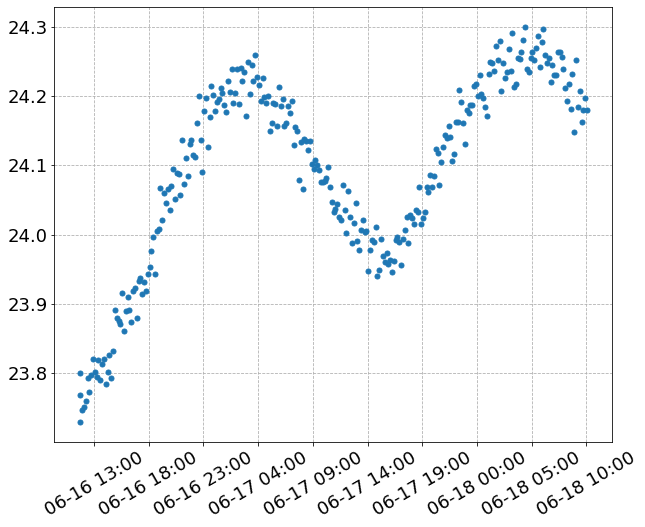

In [1328]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df_slow.index, df_slow['Yoke (center magnet)'])

In [1329]:
.1 * 5e-5

5e-06

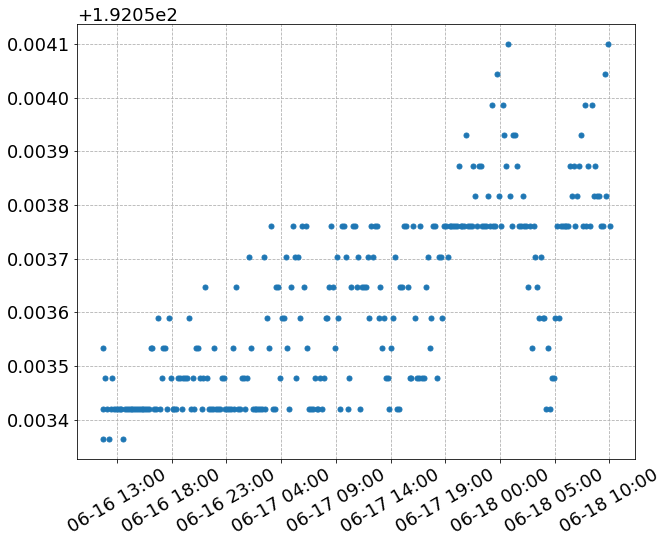

In [1330]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df_slow.index, df_slow['Magnet Current [A]'])

In [1331]:
5e-3 * 7e-4

3.5e-06

In [1332]:
np.max([df_slow['Coil 1'], df_slow['Coil 2']])

44.3134537

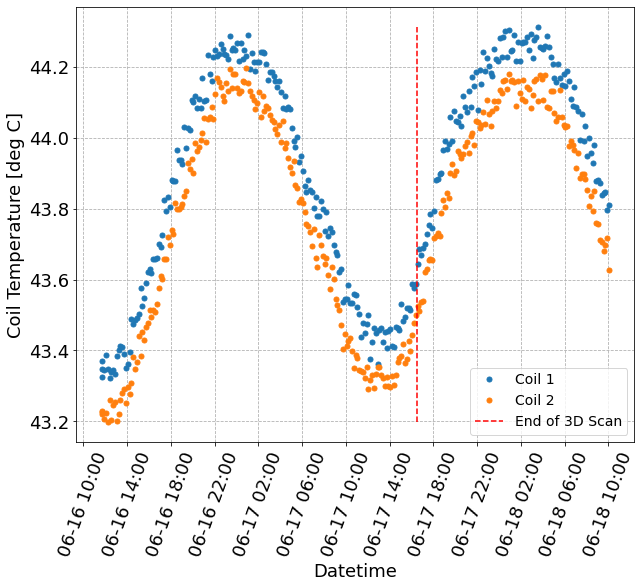

In [1333]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df_slow.index, df_slow['Coil 1'], label='Coil 1', nmaj=10)
ax = datetime_plt(ax, df_slow.index, df_slow['Coil 2'], label='Coil 2', nmaj=10)
yma = np.max([df_slow['Coil 1'], df_slow['Coil 2']])
ymi = np.min([df_slow['Coil 1'], df_slow['Coil 2']])
tf = df_3d.index[-1]
# ax = datetime_plt(ax, [tf, tf], [ymi, yma], label='End of 3D Scan', nmaj=10)
ax.plot([tf, tf], [ymi, yma], 'r--', label='End of 3D Scan')
ax.legend(fontsize=14);
ax.xaxis.set_tick_params(rotation=70)
ax.set_xlabel('Datetime')
ax.set_ylabel('Coil Temperature [deg C]');

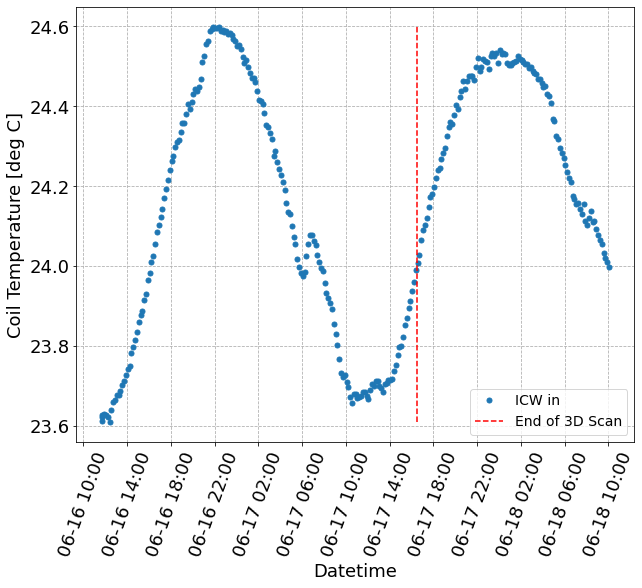

In [1424]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df_slow.index, df_slow['ICW in'], label='ICW in', nmaj=10)
# ax = datetime_plt(ax, df_slow.index, df_slow['Coil 2'], label='Coil 2', nmaj=10)
# yma = np.max([df_slow['Coil 1'], df_slow['Coil 2']])
# ymi = np.min([df_slow['Coil 1'], df_slow['Coil 2']])
yma = np.max(df_slow['ICW in'])
ymi = np.min(df_slow['ICW in'])
# ymi = np.min([df_slow['Coil 1'], df_slow['Coil 2']])

tf = df_3d.index[-1]
# ax = datetime_plt(ax, [tf, tf], [ymi, yma], label='End of 3D Scan', nmaj=10)
ax.plot([tf, tf], [ymi, yma], 'r--', label='End of 3D Scan')
ax.legend(fontsize=14);
ax.xaxis.set_tick_params(rotation=70)
ax.set_xlabel('Datetime')
ax.set_ylabel('Coil Temperature [deg C]');

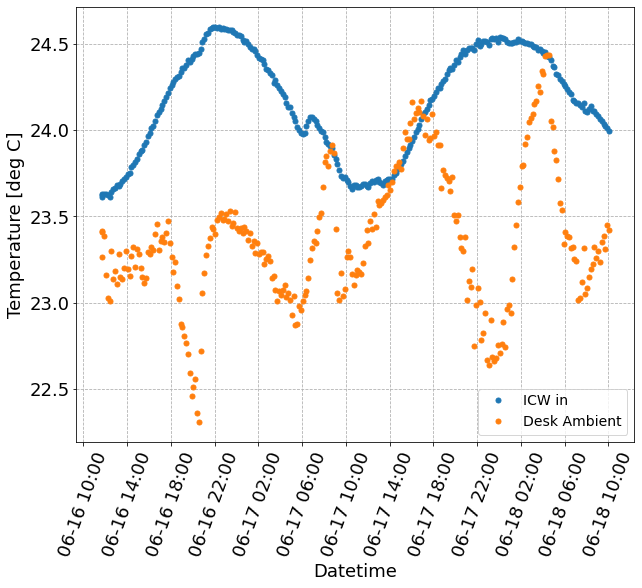

In [1413]:
fig, ax = plt.subplots()
ax = datetime_plt(ax, df_slow.index, df_slow['ICW in'], label='ICW in', nmaj=10)
ax = datetime_plt(ax, df_slow.index, df_slow['Desk Ambient'], label='Desk Ambient', nmaj=10)
# yma = np.max([df_slow['Coil 1'], df_slow['Coil 2']])
# ymi = np.min([df_slow['Coil 1'], df_slow['Coil 2']])
# tf = df_3d.index[-1]
# # ax = datetime_plt(ax, [tf, tf], [ymi, yma], label='End of 3D Scan', nmaj=10)
# ax.plot([tf, tf], [ymi, yma], 'r--', label='End of 3D Scan')
ax.legend(fontsize=14);
ax.xaxis.set_tick_params(rotation=70)
ax.set_xlabel('Datetime')
ax.set_ylabel('Temperature [deg C]');

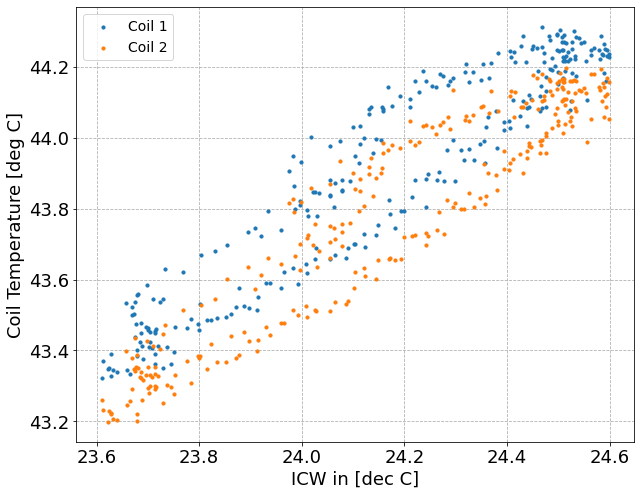

In [1420]:
fig, ax = plt.subplots()
ax.scatter(df_slow['ICW in'], df_slow['Coil 1'], label='Coil 1', s=10)
ax.scatter(df_slow['ICW in'], df_slow['Coil 2'], label='Coil 2', s=10)
# ax = datetime_plt(ax, df_slow.index, df_slow['ICW in'], label='ICW in', nmaj=10)
# ax = datetime_plt(ax, df_slow.index, df_slow['Desk Ambient'], label='Desk Ambient', nmaj=10)
# yma = np.max([df_slow['Coil 1'], df_slow['Coil 2']])
# ymi = np.min([df_slow['Coil 1'], df_slow['Coil 2']])
# tf = df_3d.index[-1]
# # ax = datetime_plt(ax, [tf, tf], [ymi, yma], label='End of 3D Scan', nmaj=10)
# ax.plot([tf, tf], [ymi, yma], 'r--', label='End of 3D Scan')
ax.legend(fontsize=14);
#ax.xaxis.set_tick_params(rotation=70)
ax.set_xlabel('ICW in [dec C]')
ax.set_ylabel('Coil Temperature [deg C]');

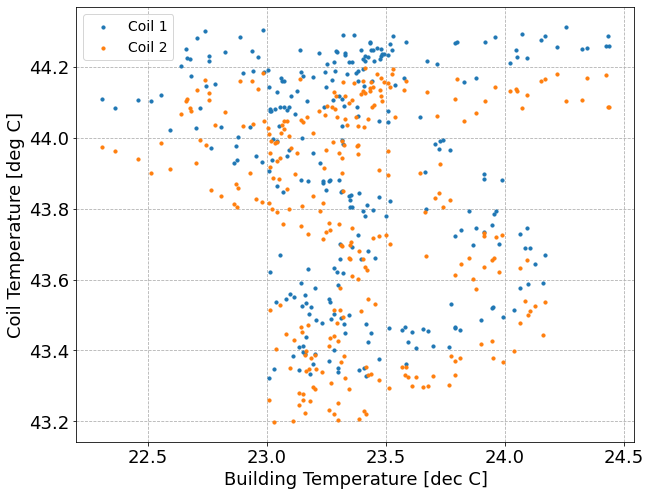

In [1421]:
fig, ax = plt.subplots()
ax.scatter(df_slow['Desk Ambient'], df_slow['Coil 1'], label='Coil 1', s=10)
ax.scatter(df_slow['Desk Ambient'], df_slow['Coil 2'], label='Coil 2', s=10)
# ax = datetime_plt(ax, df_slow.index, df_slow['ICW in'], label='ICW in', nmaj=10)
# ax = datetime_plt(ax, df_slow.index, df_slow['Desk Ambient'], label='Desk Ambient', nmaj=10)
# yma = np.max([df_slow['Coil 1'], df_slow['Coil 2']])
# ymi = np.min([df_slow['Coil 1'], df_slow['Coil 2']])
# tf = df_3d.index[-1]
# # ax = datetime_plt(ax, [tf, tf], [ymi, yma], label='End of 3D Scan', nmaj=10)
# ax.plot([tf, tf], [ymi, yma], 'r--', label='End of 3D Scan')
ax.legend(fontsize=14);
#ax.xaxis.set_tick_params(rotation=70)
ax.set_xlabel('Building Temperature [dec C]')
ax.set_ylabel('Coil Temperature [deg C]');

In [1334]:
tf

Timestamp('2021-06-17 16:29:59')

In [1335]:
df_slow['Magnet Current [A]']

Datetime
2021-06-16 11:41:47    192.053363
2021-06-16 11:42:27    192.053420
2021-06-16 11:42:59    192.053533
2021-06-16 11:53:55    192.053477
2021-06-16 12:03:55    192.053420
                          ...    
2021-06-18 09:23:47    192.053760
2021-06-18 09:33:47    192.054043
2021-06-18 09:43:47    192.053817
2021-06-18 09:53:47    192.054100
2021-06-18 10:03:47    192.053760
Name: Magnet Current [A], Length: 281, dtype: float64

In [1336]:
# WRONG COORDINATES

In [1337]:
#mag_mm_to_zaber_ADC(416169, 'Y')

In [1338]:
# zaber_ADC_to_mag_mm(416169, 'Y')

- This is wrong and needs to be fixed. Should look at carefully soon. Will want it working for presenting results.

In [1339]:
# TEST FROM NEW POSITION

In [1340]:
ADC_to_mm(416169, 'Y')

124.6

In [1341]:
ADC_to_mm(417000, 'Y'), ADC_to_mm(417250, 'Y')

(124.92460937499999, 125.02226562499999)

In [1342]:
ADC_to_mm(1649035, 'Z')

124.5

In [1343]:
ADC_to_mm(1648000, 'Z'), ADC_to_mm(1647500, 'Z')

(124.904296875, 125.099609375)

In [1344]:
ADC_to_mm(1650000, 'Z')

124.123046875

In [1345]:
mm_to_ADC(150, 'Z')

1583755.0

In [1346]:
mm_to_ADC(227, 'Z') # 3 mm below brass #2

1386635.0

In [1347]:
mm_to_ADC(53, 'Z') # 3 mm above brass # 1

1832075.0

- Z limits are off. Should inspect visually after next degauss.

In [1348]:
mm_to_ADC(51+spacer_R, 'Y')

NameError: name 'spacer_R' is not defined

In [1349]:
mm_to_ADC(226+spacer_R, 'Y')

NameError: name 'spacer_R' is not defined

In [1350]:
(700495-637825) * mm_per_ADC

24.48046875

- Y limits also off. Looks to be about the amount from NMR sample to bigger sharpie line. Measure this.

In [1351]:
mm_to_ADC(0, 'X')

394286.0

In [1352]:
mm_to_ADC(75, 'X')

586286.0

In [1353]:
mm_to_ADC(75, 'X') - mm_to_ADC(0, 'X')

192000.0

In [1354]:
# actual limits
(554838 - 422190)

132648

In [1355]:
(554838 - 422190) * mm_per_ADC

51.815625000000004

In [1356]:
(554838 - 422190) * mm_per_ADC + 12-2 + 2 + 10

73.81562500000001

In [1357]:
### Testing new columns

In [1358]:
len(df['magnet_X_mm'].unique())

51

# Plotting Functions

## Planes of NMR Data

In [1359]:
def scatter_plane(df, plane_str, plane_val, X, Y, plotfile=None):
    df_ = df.query(f'magnet_{plane_str}_mm == {plane_val}').copy()
    ADC = df_[f'Zaber_Meas_Encoder_{plane_str}'].iloc[0]
    # plot
    fig, ax = plt.subplots()
    sc = ax.scatter(df_[f'magnet_{X}_mm'], df_[f'magnet_{Y}_mm'], c=df_['NMR [T]'], s=25)
    cb = fig.colorbar(sc, label='NMR [T]')
    ax.set_xlabel(f'{X} [mm]')
    ax.set_ylabel(f'{Y} [mm]')
    fig.suptitle(f'{plane_str} = {plane_val:.2f} [mm] = {int(ADC)} [ADC]')
    
    if not plotfile is None:
        fig.savefig(plotfile+'.pdf', facecolor='white', transparent=False)
        fig.savefig(plotfile+'.png', facecolor='white', transparent=False)
    return fig, ax
    
#     xmin = df[f'Zaber_Meas_{mm}_X'].min()
#     df_ = df.query(f'`Zaber_Pattern_X` == {xval}').copy()
#     x_mm = df_[f'Zaber_Meas_{mm}_X'].values[0]
#     ymin = df_[f'Zaber_Meas_{mm}_Y'].min()
#     zmin = -df_[f'Zaber_Meas_{mm}_Z'].max()
#     # plot
#     fig, ax = plt.subplots()
#     sc = ax.scatter(1e-3*(df_[f'Zaber_Meas_{mm}_Y']-ymin), 1e-3*(-df_[f'Zaber_Meas_{mm}_Z']+zmin),
#                     c=df_['NMR [T]'], s=25)
#     cb = fig.colorbar(sc, label='NMR [T]')
#     ax.set_xlabel('Zaber Y [mm]')
#     ax.set_ylabel('Zaber Z [mm]')
#     fig.suptitle(f'Zaber X = {1e-3*(x_mm - xmin)} [mm] = {xval} [ADC]')
# #     fig.suptitle(f'Zaber Encoder X = {xval} [ADC]')
#     #ax.set_facecolor('white')
#     if not plotfile is None:
#         fig.savefig(plotfile+'.pdf', facecolor='white', transparent=False)
#         fig.savefig(plotfile+'.png', facecolor='white', transparent=False)
#     return fig, ax

In [1360]:
df_6_15['magnet_Z_mm'].unique()

array([129.5, 124.5])

In [1361]:
df_3d['magnet_Z_mm'].unique()

array([134.5, 132.5, 130.5, 128.5, 126.5, 124.5, 122.5, 120.5, 118.5,
       116.5, 114.5])

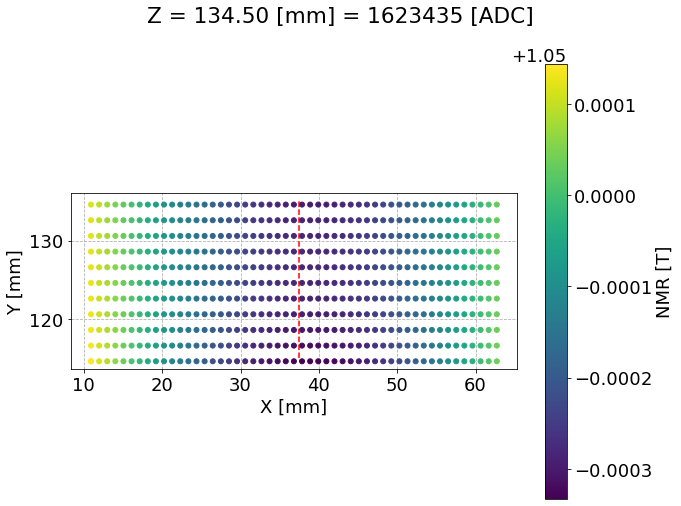

In [1363]:
# fig, ax = scatter_plane(df3d_, 'Z', 129.5, 'X', 'Y')
fig, ax = scatter_plane(df3d_, 'Z', 134.5, 'X', 'Y')
ax.plot([37.5, 37.5],[115, 135], 'r--')
ax.set_aspect('equal')

In [1364]:
df_3d['magnet_X_mm'].unique()

array([10.9      , 11.9359375, 12.971875 , 14.0078125, 15.04375  ,
       16.0796875, 17.115625 , 18.1515625, 19.1875   , 20.2234375,
       21.259375 , 22.2953125, 23.33125  , 24.3671875, 25.403125 ,
       26.4390625, 27.475    , 28.5109375, 29.546875 , 30.5828125,
       31.61875  , 32.6546875, 33.690625 , 34.7265625, 35.7625   ,
       36.7984375, 37.834375 , 38.8703125, 39.90625  , 40.9421875,
       41.978125 , 43.0140625, 44.05     , 45.0859375, 46.121875 ,
       47.1578125, 48.19375  , 49.2296875, 50.265625 , 51.3015625,
       52.3375   , 53.3734375, 54.409375 , 55.4453125, 56.48125  ,
       57.5171875, 58.553125 , 59.5890625, 60.625    , 61.6609375,
       62.696875 ])

In [1365]:
df_3d.magnet_Z_mm.unique()

array([134.5, 132.5, 130.5, 128.5, 126.5, 124.5, 122.5, 120.5, 118.5,
       116.5, 114.5])

In [1366]:
#df3d_2 = df3d_.query('(magnet_Z_mm == 129.50) & (magnet_X_mm < 37.5)').copy()
#df3d_2 = df3d_.query('(magnet_Z_mm == 129.50) & (magnet_X_mm < 54.0)').copy()
#df3d_2 = df3d_.query('(magnet_Z_mm == 129.50)').copy()
##df3d_2 = df3d_.query('(magnet_Z_mm == 134.5) & (magnet_X_mm < 16.0)').iloc[1:].copy()
###df3d_2 = df3d_.query('(magnet_Z_mm == 134.5) & (10.9 < magnet_X_mm < 60.0)').copy()
##df3d_2 = df3d_.query('(magnet_Z_mm == 124.5) & (10.9 < magnet_X_mm < 60.0)').copy()
# df3d_2 = df3d_.query('(magnet_Z_mm == 125.5)').copy()
df3d_2 = df3d_.query('(magnet_Z_mm == 124.5)').copy()

In [1367]:
df3d_2

Time  Magnet Current [V]  \
Datetime                                                         
2021-06-16 11:44:59  6/16/2021 11:44:59 AM          192.053420   
2021-06-16 11:47:41  6/16/2021 11:47:41 AM          192.053420   
2021-06-16 11:50:29  6/16/2021 11:50:29 AM          192.053420   
2021-06-16 11:53:22  6/16/2021 11:53:22 AM          192.053420   
2021-06-16 11:56:49  6/16/2021 11:56:49 AM          192.053420   
...                                    ...                 ...   
2021-06-17 16:16:31   6/17/2021 4:16:31 PM          192.053647   
2021-06-17 16:19:27   6/17/2021 4:19:27 PM          192.053590   
2021-06-17 16:22:22   6/17/2021 4:22:22 PM          192.053420   
2021-06-17 16:25:49   6/17/2021 4:25:49 PM          192.053477   
2021-06-17 16:28:42   6/17/2021 4:28:42 PM          192.053703   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-16 11:44:59           24.302533  1.050127        0.0         422190.0   
2021-06-16 11:47:41           24.302750  1.050123        0.0         422190.0   
2021-06-16 11:50:29           24.302033  1.050120        0.0         422190.0   
2021-06-16 11:53:22           24.302067  1.050118        0.0         422190.0   
2021-06-16 11:56:49           24.302367  1.050117        0.0         422190.0   
...                                 ...       ...        ...              ...   
2021-06-17 16:16:31           24.327967  1.050036        0.0         554790.0   
2021-06-17 16:19:27           24.328933  1.050035        0.0         554790.0   
2021-06-17 16:22:22           24.329017  1.050032        0.0         554790.0   
2021-06-17 16:25:49           24.329133  1.050031        0.0         554790.0   
2021-06-17 16:28:42           24.329750  1.050030        0.0         554790.0   

                     Zaber_Pattern_Y  Zaber_Pattern_Z  Zaber_Meas_Encoder_X  \
Datetime                                                                      
2021-06-16 11:44:59         390569.0        1649035.0              422190.0   
2021-06-16 11:47:41         395689.0        1649035.0              422190.0   
2021-06-16 11:50:29         400809.0        1649035.0              422190.0   
2021-06-16 11:53:22         405929.0        1649035.0              422190.0   
2021-06-16 11:56:49         411049.0        1649035.0              422190.0   
...                              ...              ...                   ...   
2021-06-17 16:16:31         421289.0        1649035.0              554790.0   
2021-06-17 16:19:27         426409.0        1649035.0              554790.0   
2021-06-17 16:22:22         431529.0        1649035.0              554790.0   
2021-06-17 16:25:49         436649.0        1649035.0              554790.0   
2021-06-17 16:28:42         441769.0        1649035.0              554790.0   

                     Zaber_Meas_Micron_X  Zaber_Meas_Encoder_Y  \
Datetime                                                         
2021-06-16 11:44:59         164917.96875              390569.0   
2021-06-16 11:47:41         164917.96875              395689.0   
2021-06-16 11:50:29         164917.96875              400809.0   
2021-06-16 11:53:22         164917.96875              405929.0   
2021-06-16 11:56:49         164917.96875              411049.0   
...                                  ...                   ...   
2021-06-17 16:16:31         216714.84375              421289.0   
2021-06-17 16:19:27         216714.84375              426409.0   
2021-06-17 16:22:22         216714.84375              431529.0   
2021-06-17 16:25:49         216714.84375              436649.0   
2021-06-17 16:28:42         216714.84375              441769.0   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-06-16 11:44:59        152566.015625             1649035.0   
2021-06-16 11:47:41        154566.015625

In [1368]:
len(df3d_), len(df3d_2)

(6172, 561)

In [1369]:
len(df3d_2.magnet_X_mm.unique()), len(df3d_2.magnet_Y_mm.unique())

(51, 11)

In [1370]:
len(df3d_2.magnet_X_mm.unique()) * len(df3d_2.magnet_Y_mm.unique())

561

In [1371]:
fig = mu2e_plot3d(df3d_2, 'magnet_X_mm', 'magnet_Y_mm', 'NMR [T]', "`NMR [T]` > 0.", mode='plotly')

/home/ckampa/anaconda3/envs/mu2e/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:173: DeprecationWarning:

plotly.graph_objs.ColorBar is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.marker.ColorBar
  - plotly.graph_objs.surface.ColorBar
  - etc.




In [1372]:
df_3d['magnet_X_mm'].min(), df_3d['magnet_X_mm'].max()

(10.9, 62.696875)

In [1373]:
df_3d['magnet_X_mm'].max() - df_3d['magnet_X_mm'].min()

51.796875

In [1374]:
fig.show()

In [1375]:
df3d_

Time  Magnet Current [V]  \
Datetime                                                         
2021-06-16 11:41:51  6/16/2021 11:41:51 AM          192.053363   
2021-06-16 11:43:46  6/16/2021 11:43:46 AM          192.053477   
2021-06-16 11:44:01  6/16/2021 11:44:01 AM          192.053420   
2021-06-16 11:44:15  6/16/2021 11:44:15 AM          192.053420   
2021-06-16 11:44:30  6/16/2021 11:44:30 AM          192.053477   
...                                    ...                 ...   
2021-06-17 16:28:57   6/17/2021 4:28:57 PM          192.053760   
2021-06-17 16:29:13   6/17/2021 4:29:13 PM          192.053703   
2021-06-17 16:29:28   6/17/2021 4:29:28 PM          192.053760   
2021-06-17 16:29:43   6/17/2021 4:29:43 PM          192.053703   
2021-06-17 16:29:59   6/17/2021 4:29:59 PM          192.053817   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-16 11:41:51           24.303133  1.050143        0.0              0.0   
2021-06-16 11:43:46           24.302533  1.050143        0.0         422190.0   
2021-06-16 11:44:01           24.302517  1.050139        0.0         422190.0   
2021-06-16 11:44:15           24.302483  1.050135        0.0         422190.0   
2021-06-16 11:44:30           24.302550  1.050132        0.0         422190.0   
...                                 ...       ...        ...              ...   
2021-06-17 16:28:57           24.329867  1.050030        0.0         554790.0   
2021-06-17 16:29:13           24.329967  1.050030        0.0         554790.0   
2021-06-17 16:29:28           24.330083  1.050030        0.0         554790.0   
2021-06-17 16:29:43           24.330200  1.050030        0.0         554790.0   
2021-06-17 16:29:59           24.330350  1.050031        0.0         554790.0   

                     Zaber_Pattern_Y  Zaber_Pattern_Z  Zaber_Meas_Encoder_X  \
Datetime                                                                      
2021-06-16 11:41:51              0.0              0.0              422190.0   
2021-06-16 11:43:46         390569.0        1623435.0              422190.0   
2021-06-16 11:44:01         390569.0        1628555.0              422190.0   
2021-06-16 11:44:15         390569.0        1633675.0              422190.0   
2021-06-16 11:44:30         390569.0        1638795.0              422190.0   
...                              ...              ...                   ...   
2021-06-17 16:28:57         441769.0        1654155.0              554790.0   
2021-06-17 16:29:13         441769.0        1659275.0              554790.0   
2021-06-17 16:29:28         441769.0        1664395.0              554790.0   
2021-06-17 16:29:43         441769.0        1669515.0              554790.0   
2021-06-17 16:29:59         441769.0        1674635.0              554790.0   

                     Zaber_Meas_Micron_X  Zaber_Meas_Encoder_Y  \
Datetime                                                         
2021-06-16 11:41:51         164917.96875              390569.0   
2021-06-16 11:43:46         164917.96875              390569.0   
2021-06-16 11:44:01         164917.96875              390569.0   
2021-06-16 11:44:15         164917.96875              390569.0   
2021-06-16 11:44:30         164917.96875              390569.0   
...                                  ...                   ...   
2021-06-17 16:28:57         216714.84375              441769.0   
2021-06-17 16:29:13         216714.84375              441769.0   
2021-06-17 16:29:28         216714.84375              441769.0   
2021-06-17 16:29:43         216714.84375              441769.0   
2021-06-17 16:29:59         216714.84375              441769.0   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-06-16 11:41:51        152566.015625             1623435.0   
2021-06-16 11:43:46        152566.015625

In [1376]:
# checking yaw and roll corrections

In [1377]:
phi = -0.0886 # yaw
theta = 0.0957 # roll
x0 = 10.1 # distance from pole 1

In [1378]:
df3d_['magnet_Y_prime_mm'] = df3d_['magnet_Y_mm'] + (df3d_['magnet_X_mm']-x0) * phi
df3d_['magnet_Z_prime_mm'] = df3d_['magnet_Z_mm'] + (df3d_['magnet_X_mm']-x0) * theta

In [1379]:
df3d_.magnet_X_mm.unique()

array([10.9      , 11.9359375, 12.971875 , 14.0078125, 15.04375  ,
       16.0796875, 17.115625 , 18.1515625, 19.1875   , 20.2234375,
       21.259375 , 22.2953125, 23.33125  , 24.3671875, 25.403125 ,
       26.4390625, 27.475    , 28.5109375, 29.546875 , 30.5828125,
       31.61875  , 32.6546875, 33.690625 , 34.7265625, 35.7625   ,
       36.7984375, 37.834375 , 38.8703125, 39.90625  , 40.9421875,
       41.978125 , 43.0140625, 44.05     , 45.0859375, 46.121875 ,
       47.1578125, 48.19375  , 49.2296875, 50.265625 , 51.3015625,
       52.3375   , 53.3734375, 54.409375 , 55.4453125, 56.48125  ,
       57.5171875, 58.553125 , 59.5890625, 60.625    , 61.6609375,
       62.696875 ])

BEFORE CORRECTION
AFTER CORRECTION


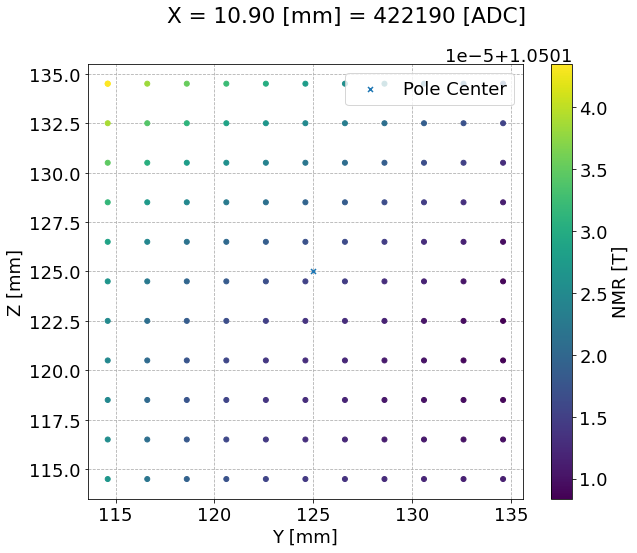

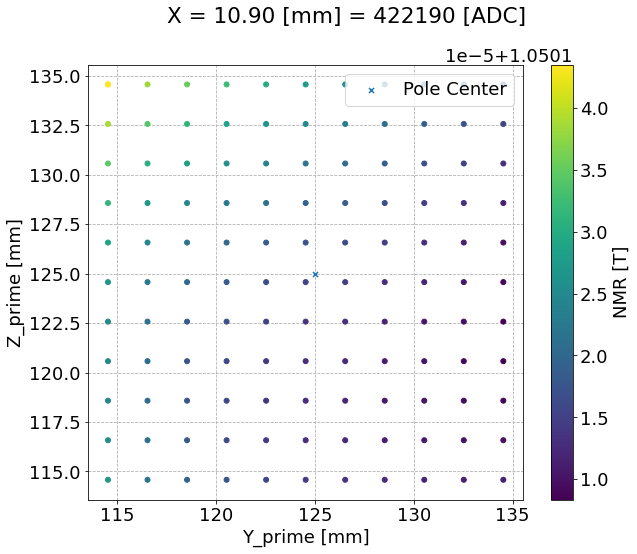

In [1096]:
# x = 10.9 -- no correction
print('BEFORE CORRECTION')
fig, ax = scatter_plane(df3d_, 'X', 10.9, 'Y', 'Z' )
ax.scatter([125.],[125.], s=25, marker='x', label='Pole Center')
ax.set_aspect('equal')
ax.legend();

print('AFTER CORRECTION')
fig, ax = scatter_plane(df3d_, 'X', 10.9, 'Y_prime', 'Z_prime' )
ax.scatter([125.],[125.], s=25, marker='x', label='Pole Center')
ax.set_aspect('equal')
ax.legend();

BEFORE CORRECTION
AFTER CORRECTION


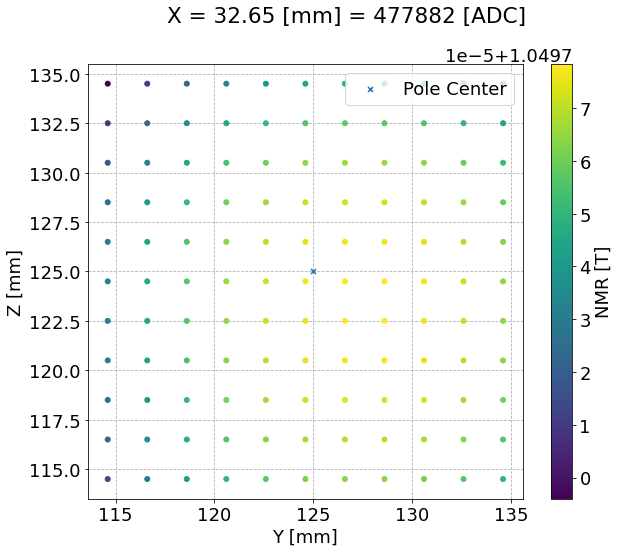

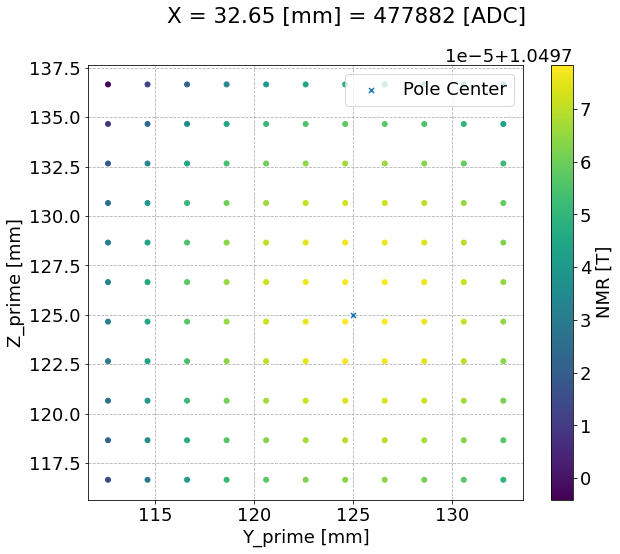

In [1097]:
# x = 32.6546875 -- correction from measurement point
print('BEFORE CORRECTION')
fig, ax = scatter_plane(df3d_, 'X', 32.6546875, 'Y', 'Z' )
ax.scatter([125.],[125.], s=25, marker='x', label='Pole Center')
ax.set_aspect('equal')
ax.legend();

print('AFTER CORRECTION')
fig, ax = scatter_plane(df3d_, 'X', 32.6546875, 'Y_prime', 'Z_prime' )
ax.scatter([125.],[125.], s=25, marker='x', label='Pole Center')
ax.set_aspect('equal')
ax.legend();

BEFORE CORRECTION
AFTER CORRECTION


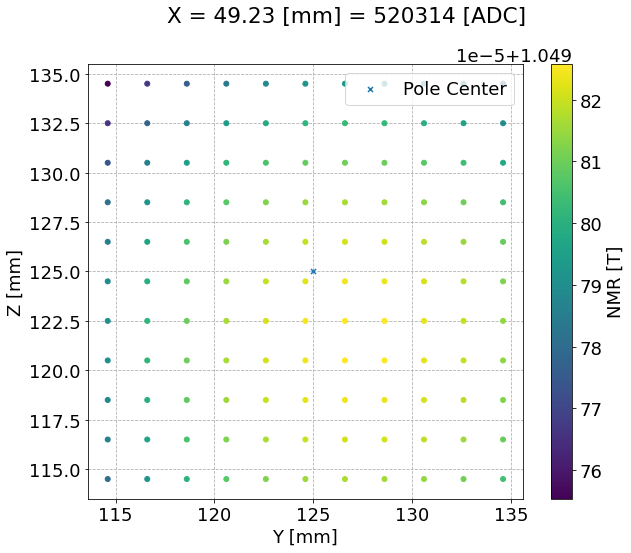

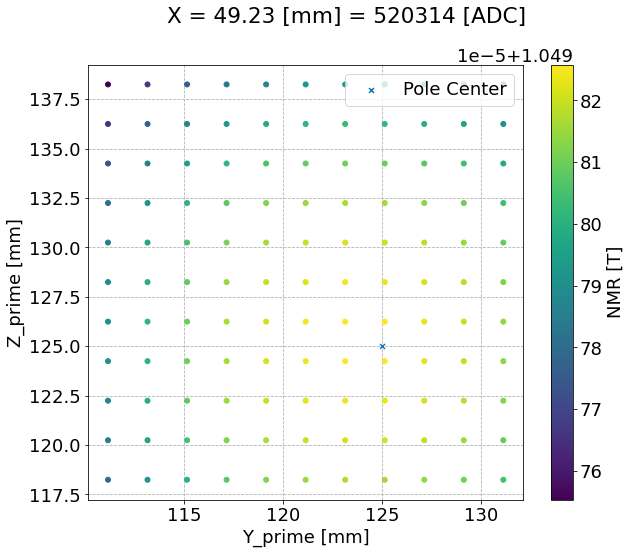

In [1098]:
# x = 49.2296875 -- correction from measurement point
print('BEFORE CORRECTION')
fig, ax = scatter_plane(df3d_, 'X', 49.2296875, 'Y', 'Z' )
ax.scatter([125.],[125.], s=25, marker='x', label='Pole Center')
ax.set_aspect('equal')
ax.legend();

print('AFTER CORRECTION')
fig, ax = scatter_plane(df3d_, 'X', 49.2296875, 'Y_prime', 'Z_prime' )
ax.scatter([125.],[125.], s=25, marker='x', label='Pole Center')
ax.set_aspect('equal')
ax.legend();

BEFORE CORRECTION
AFTER CORRECTION


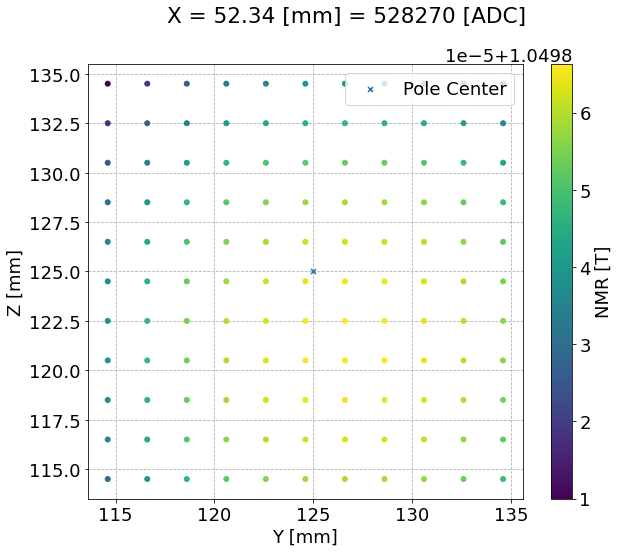

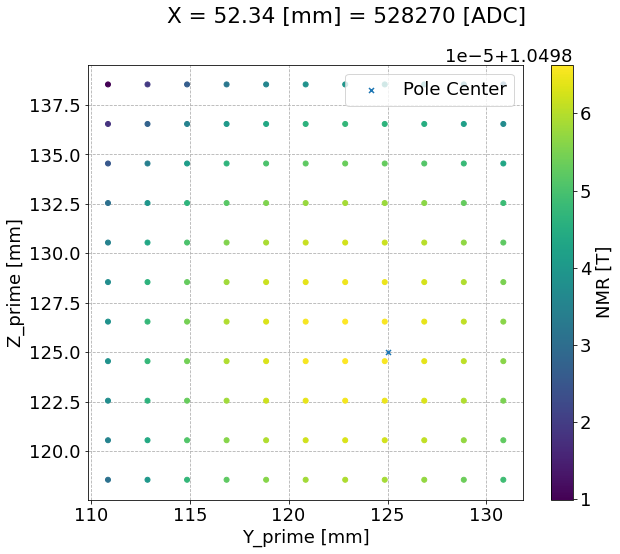

In [1099]:
# x = 52.696875 -- correction from measurement point
print('BEFORE CORRECTION')
fig, ax = scatter_plane(df3d_, 'X', 52.3375, 'Y', 'Z' )
ax.scatter([125.],[125.], s=25, marker='x', label='Pole Center')
ax.set_aspect('equal')
ax.legend();

print('AFTER CORRECTION')
fig, ax = scatter_plane(df3d_, 'X', 52.3375, 'Y_prime', 'Z_prime' )
ax.scatter([125.],[125.], s=25, marker='x', label='Pole Center')
ax.set_aspect('equal')
ax.legend();

In [650]:
df3d_

Time  Magnet Current [V]  \
Datetime                                                         
2021-06-16 11:41:51  6/16/2021 11:41:51 AM          192.053363   
2021-06-16 11:43:46  6/16/2021 11:43:46 AM          192.053477   
2021-06-16 11:44:01  6/16/2021 11:44:01 AM          192.053420   
2021-06-16 11:44:15  6/16/2021 11:44:15 AM          192.053420   
2021-06-16 11:44:30  6/16/2021 11:44:30 AM          192.053477   
...                                    ...                 ...   
2021-06-16 13:37:56   6/16/2021 1:37:56 PM          192.053420   
2021-06-16 13:38:12   6/16/2021 1:38:12 PM          192.053477   
2021-06-16 13:38:27   6/16/2021 1:38:27 PM          192.053420   
2021-06-16 13:38:42   6/16/2021 1:38:42 PM          192.053420   
2021-06-16 13:38:58   6/16/2021 1:38:58 PM          192.053477   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-16 11:41:51           24.303133  1.050143        0.0              0.0   
2021-06-16 11:43:46           24.302533  1.050143        0.0         422190.0   
2021-06-16 11:44:01           24.302517  1.050139        0.0         422190.0   
2021-06-16 11:44:15           24.302483  1.050135        0.0         422190.0   
2021-06-16 11:44:30           24.302550  1.050132        0.0         422190.0   
...                                 ...       ...        ...              ...   
2021-06-16 13:37:56           24.307633  1.050056        0.0         430146.0   
2021-06-16 13:38:12           24.307750  1.050055        0.0         430146.0   
2021-06-16 13:38:27           24.307800  1.050055        0.0         430146.0   
2021-06-16 13:38:42           24.307817  1.050054        0.0         430146.0   
2021-06-16 13:38:58           24.307867  1.050053        0.0         430146.0   

                     Zaber_Pattern_Y  Zaber_Pattern_Z  Zaber_Meas_Encoder_X  \
Datetime                                                                      
2021-06-16 11:41:51              0.0              0.0              422190.0   
2021-06-16 11:43:46         390569.0        1623435.0              422190.0   
2021-06-16 11:44:01         390569.0        1628555.0              422190.0   
2021-06-16 11:44:15         390569.0        1633675.0              422190.0   
2021-06-16 11:44:30         390569.0        1638795.0              422190.0   
...                              ...              ...                   ...   
2021-06-16 13:37:56         411049.0        1649035.0              430146.0   
2021-06-16 13:38:12         411049.0        1654155.0              430146.0   
2021-06-16 13:38:27         411049.0        1659275.0              430146.0   
2021-06-16 13:38:42         411049.0        1664395.0              430146.0   
2021-06-16 13:38:58         411049.0        1669515.0              430146.0   

                     Zaber_Meas_Micron_X  ...  Zaber_Meas_Encoder_Z  \
Datetime                                  ...                         
2021-06-16 11:41:51         164917.96875  ...             1623435.0   
2021-06-16 11:43:46         164917.96875  ...             1623435.0   
2021-06-16 11:44:01         164917.96875  ...             1628555.0   
2021-06-16 11:44:15         164917.96875  ...             1633675.0   
2021-06-16 11:44:30         164917.96875  ...             1638795.0   
...                                  ...  ...                   ...   
2021-06-16 13:37:56         168025.78125  ...             1649035.0   
2021-06-16 13:38:12         168025.78125  ...             1654155.0   
2021-06-16 13:38:27         168025.78125  ...             1659275.0   
2021-06-16 13:38:42         168025.78125  ...             1664395.0   
2021-06-16 13:38:58         168025.78125  ...             1669515.0   

                     Zaber_Meas_Micron_Z  seconds_delta  hours_delta  \
Datetime                                                               
2021-06-16 11:41:51        63

<ipython-input-981-e34682e5b772>:5: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



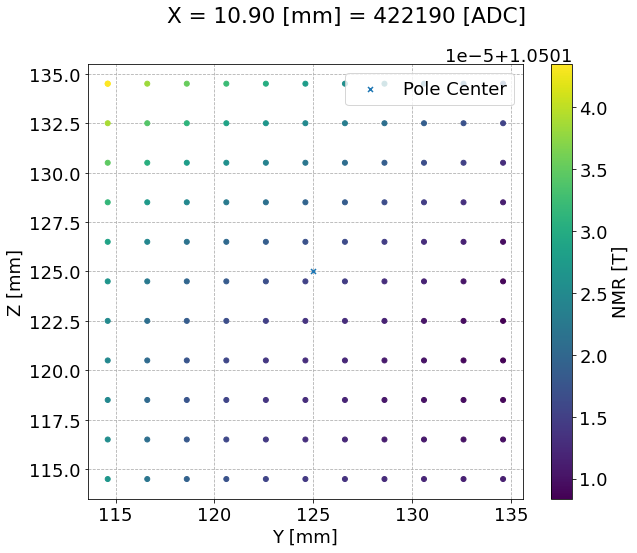

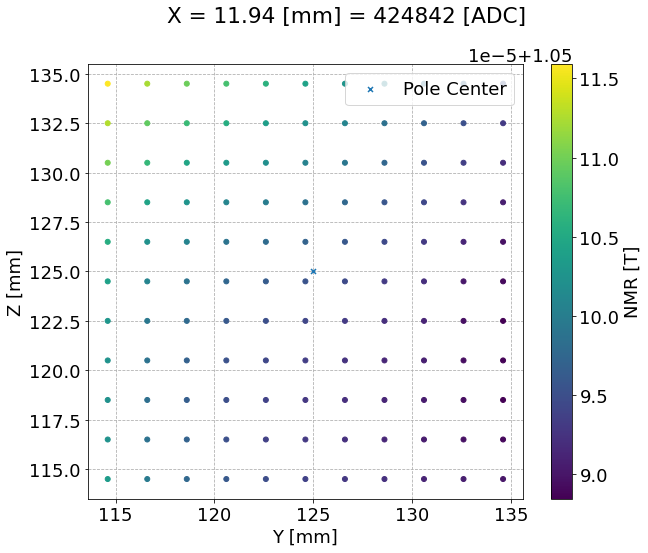

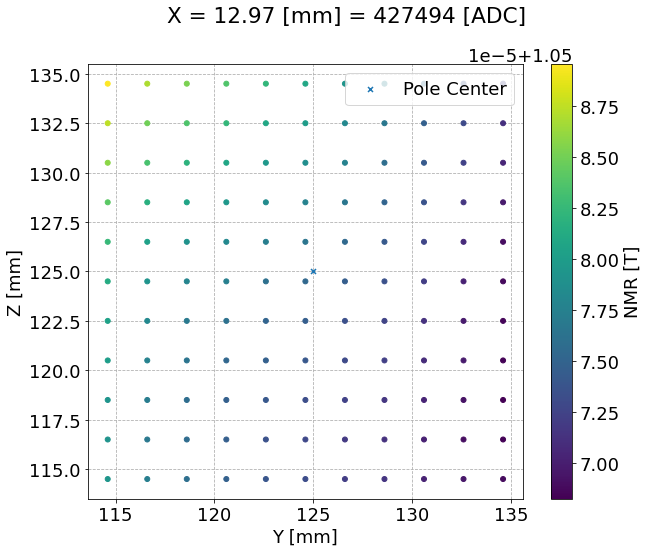

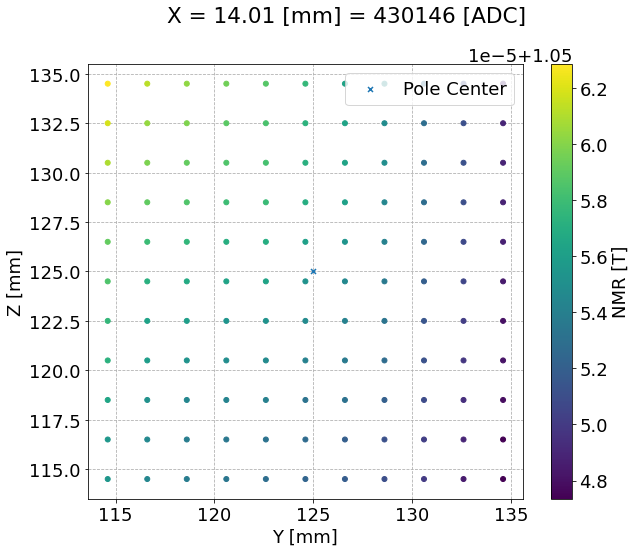

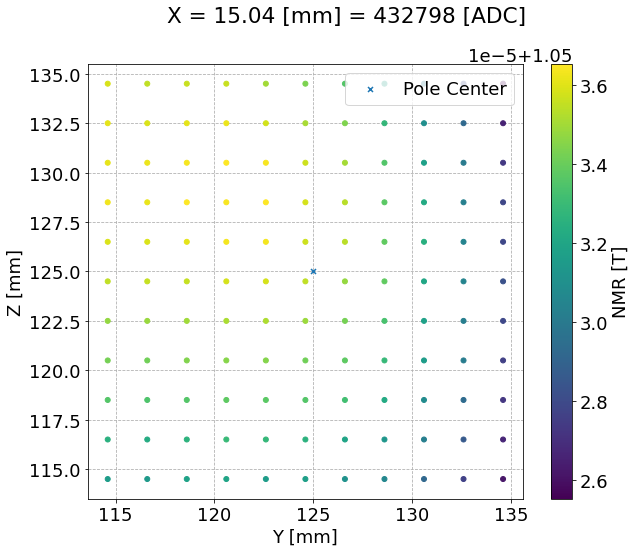

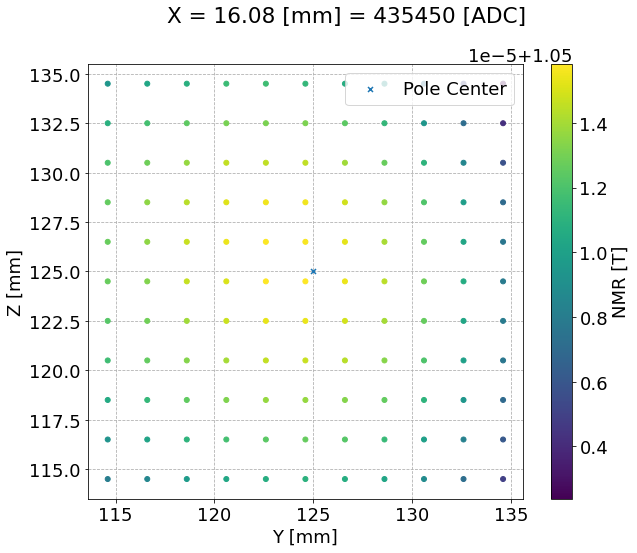

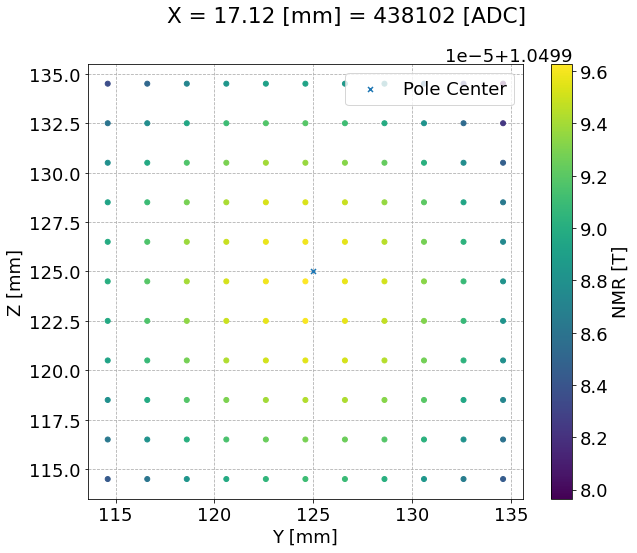

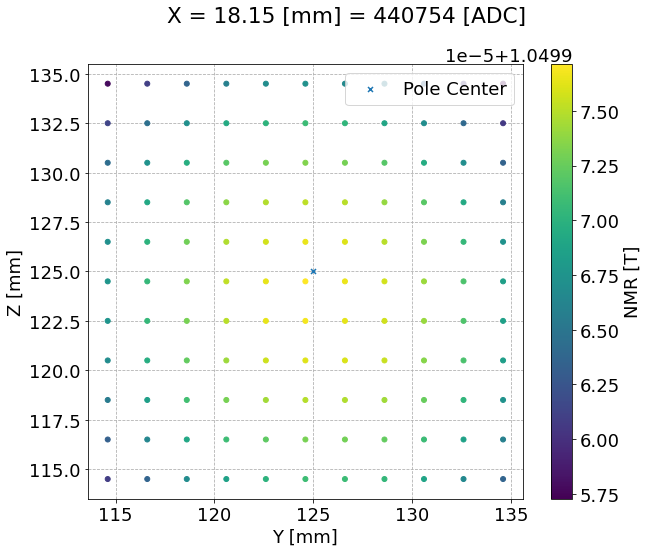

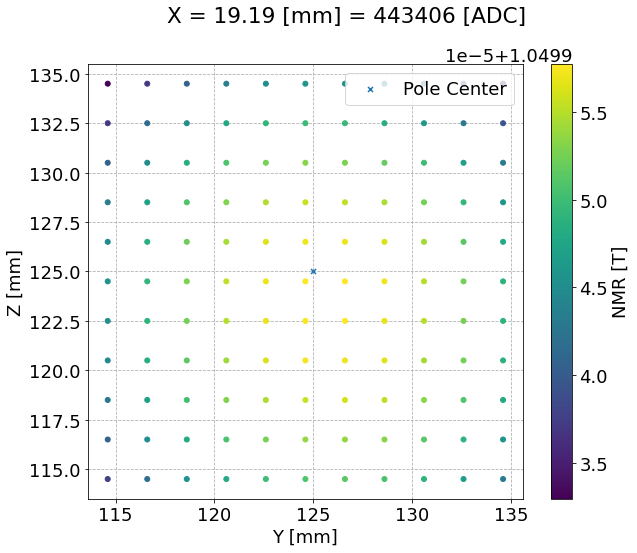

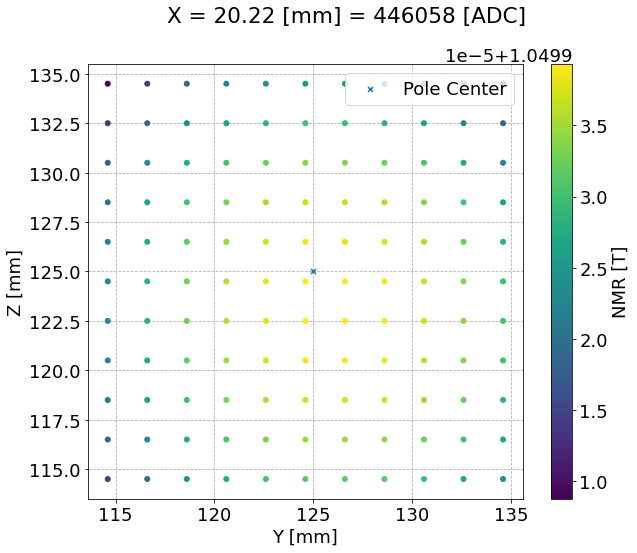

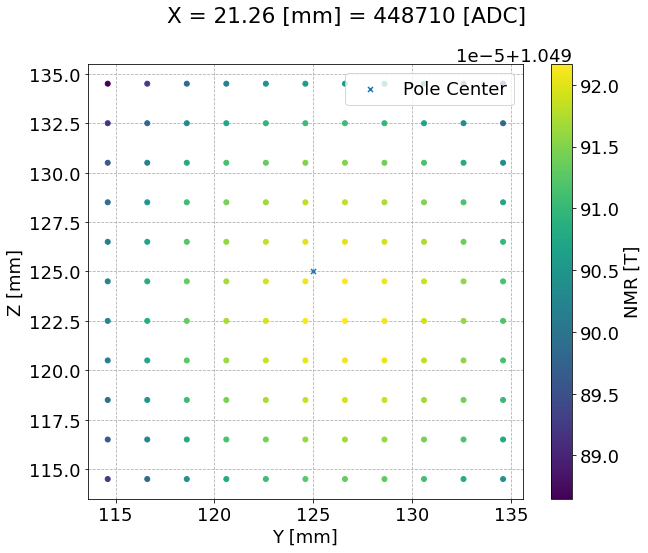

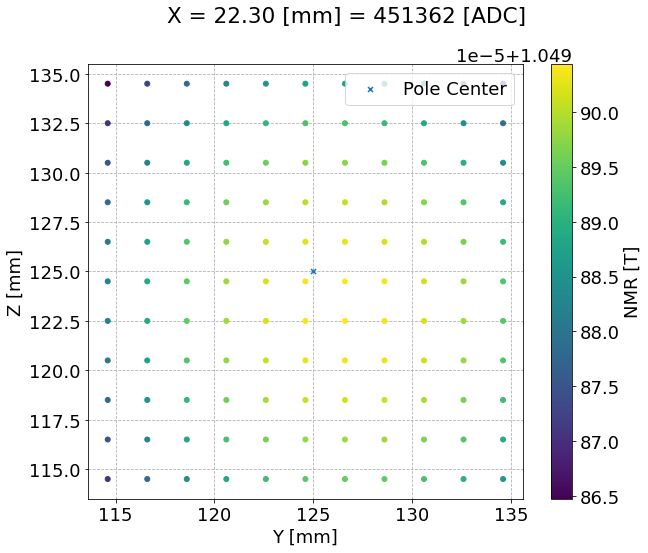

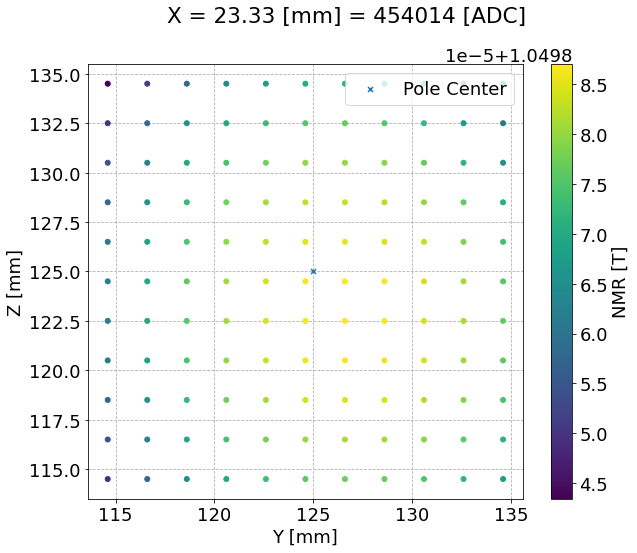

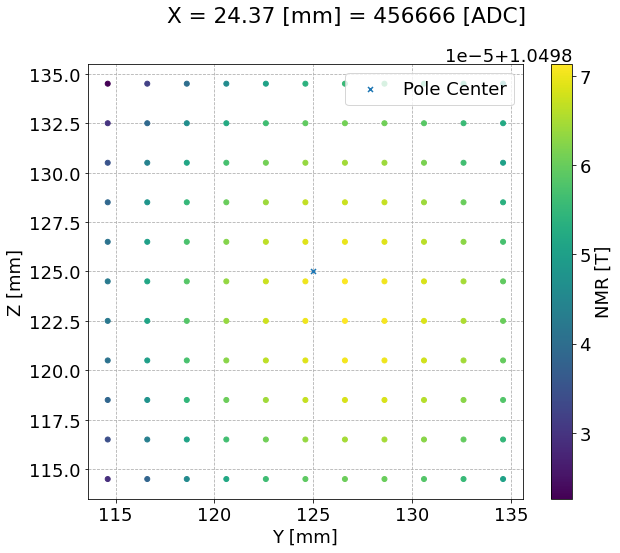

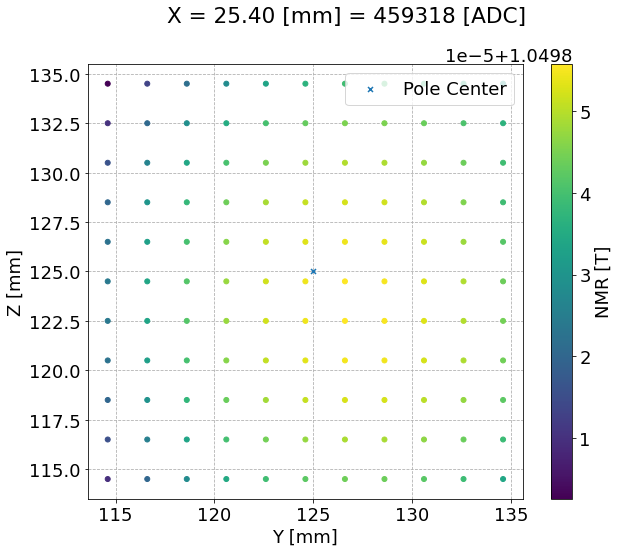

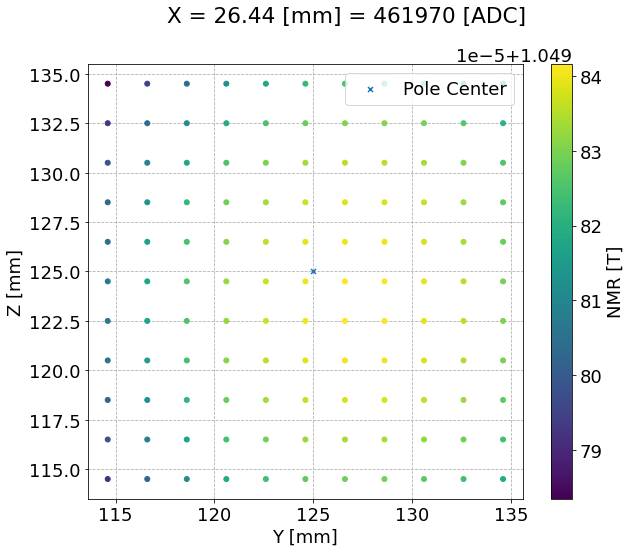

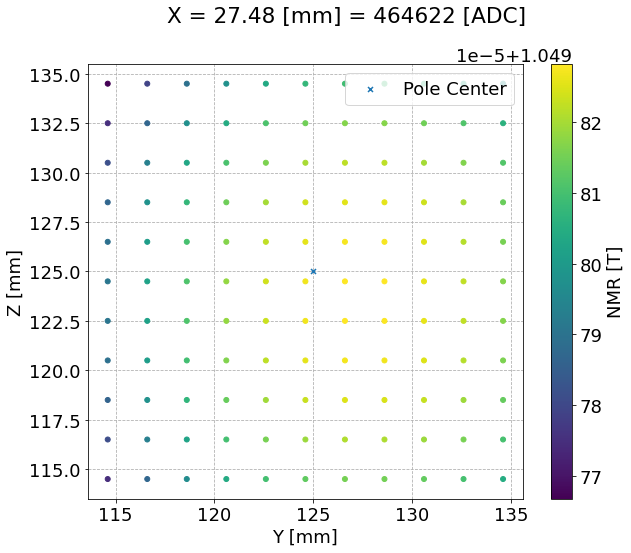

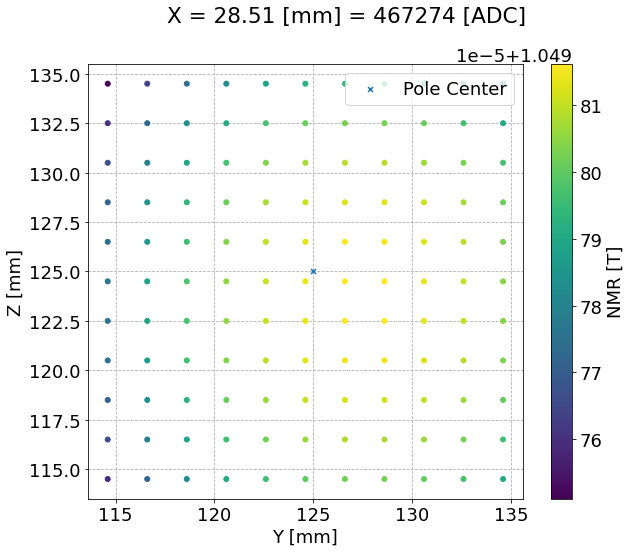

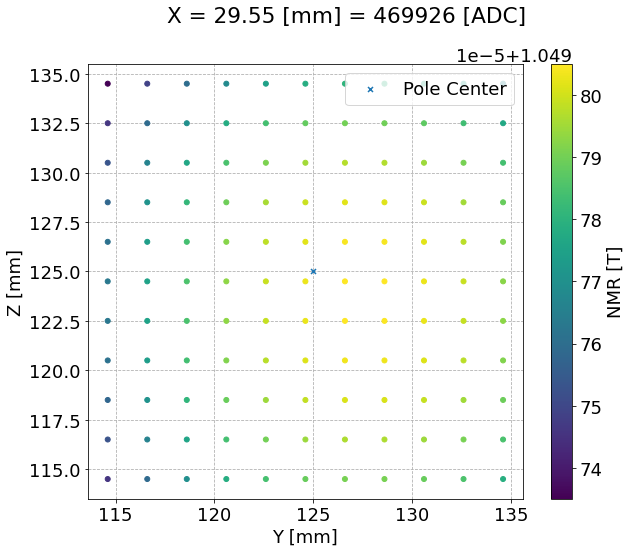

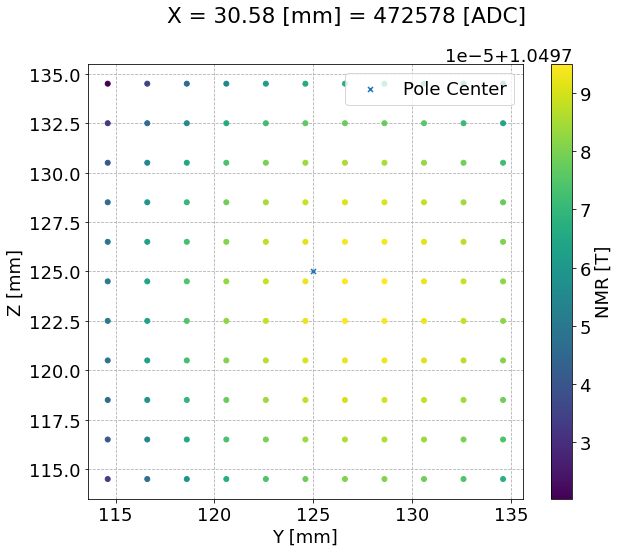

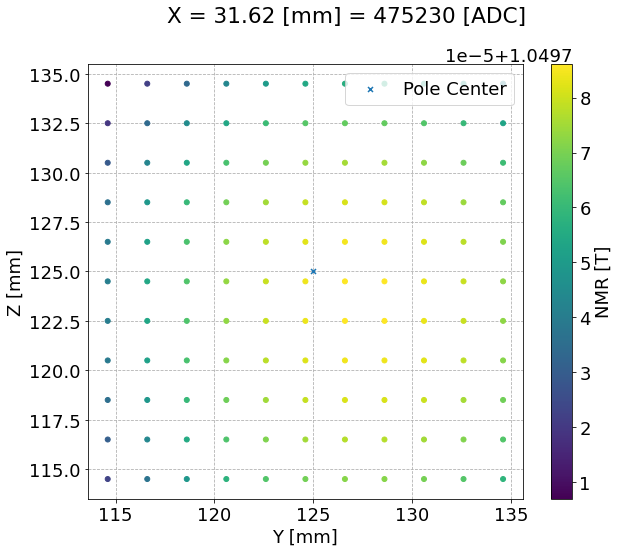

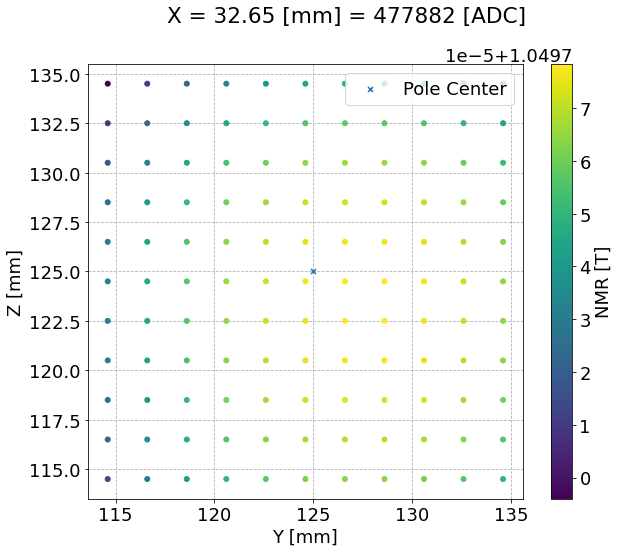

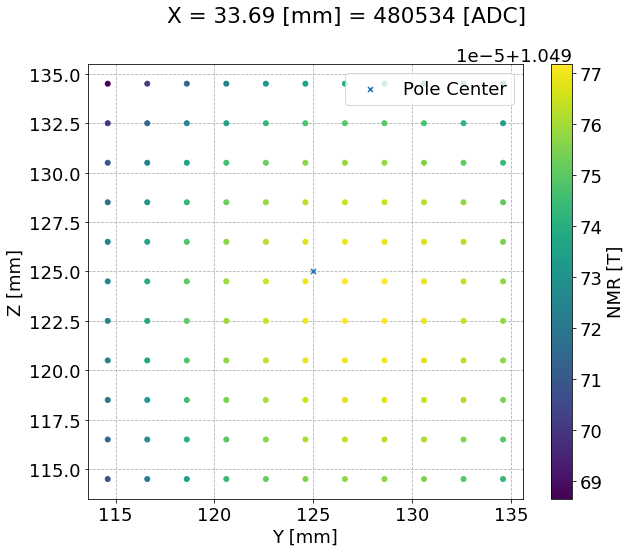

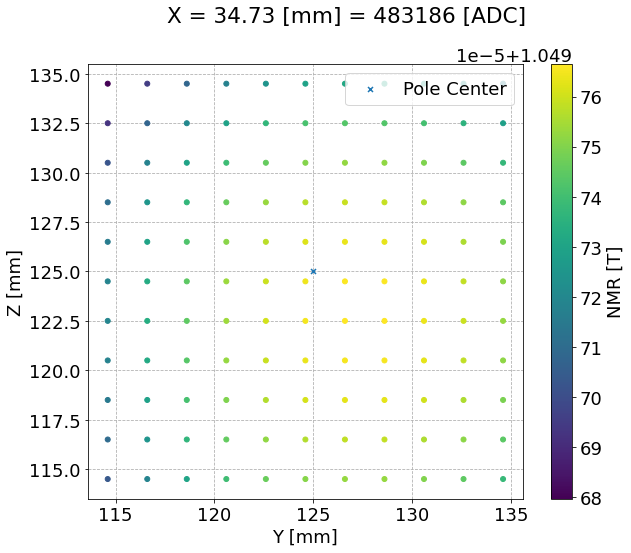

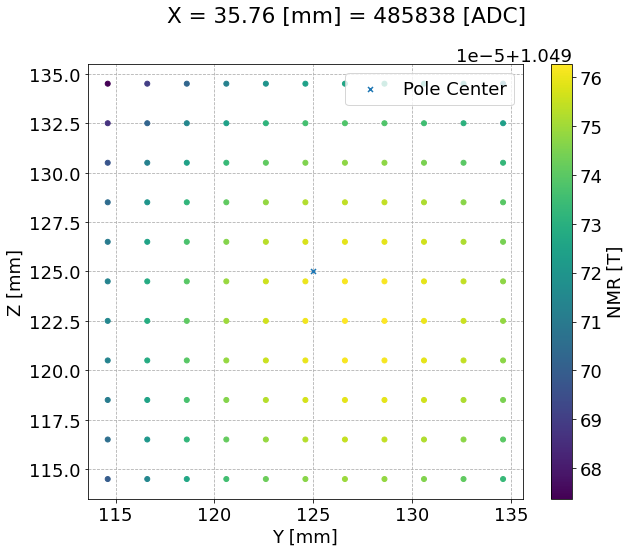

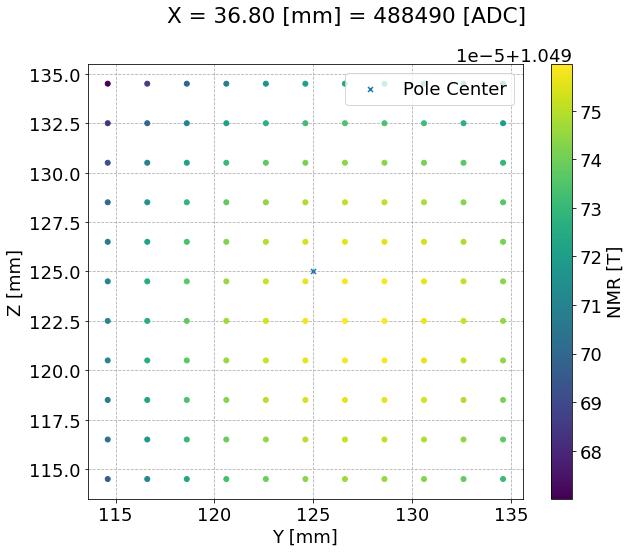

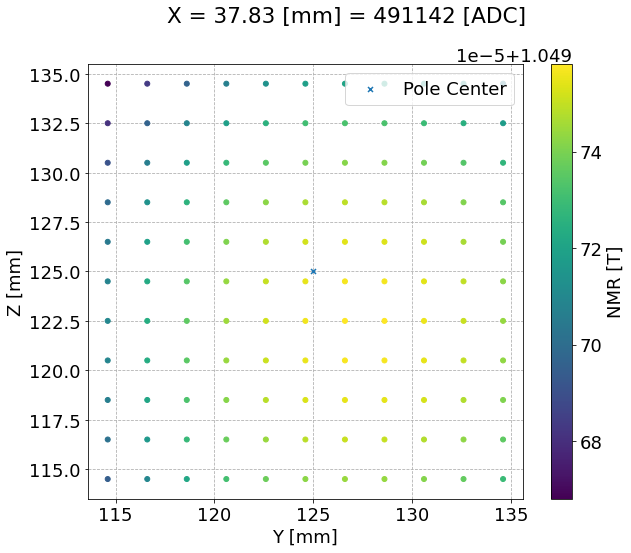

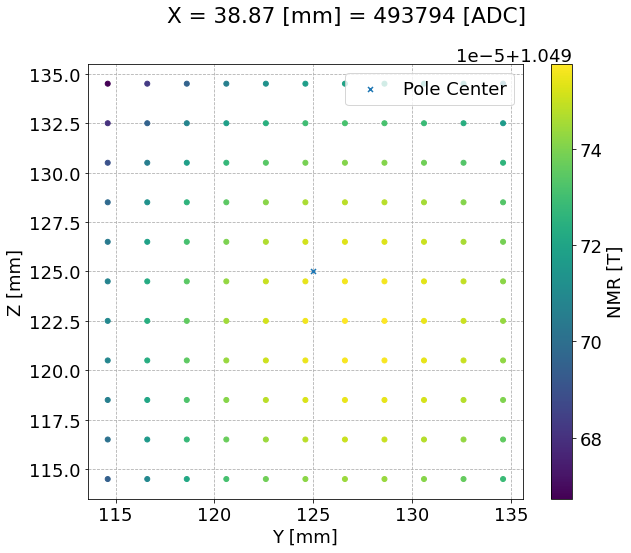

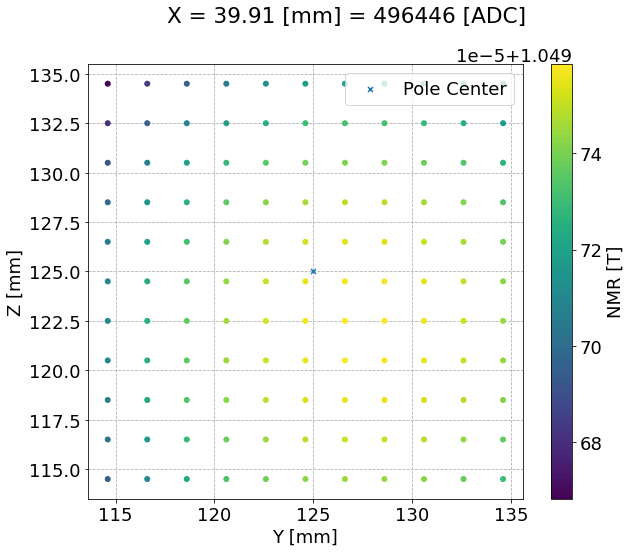

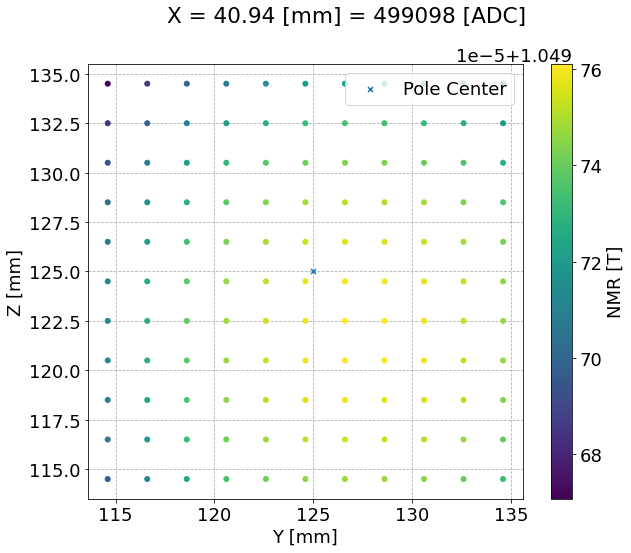

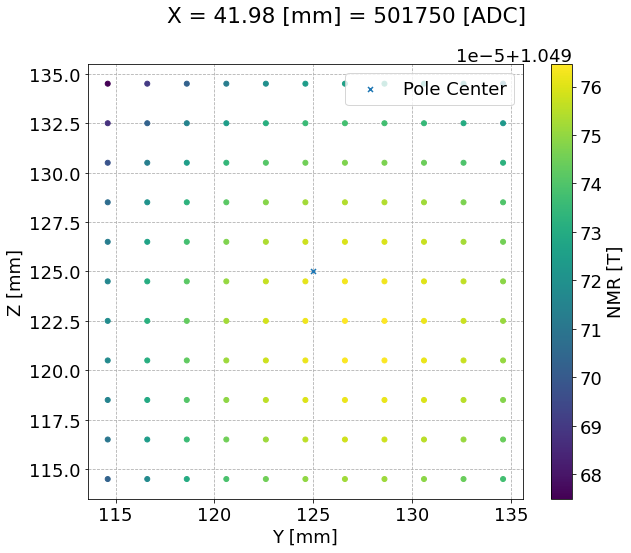

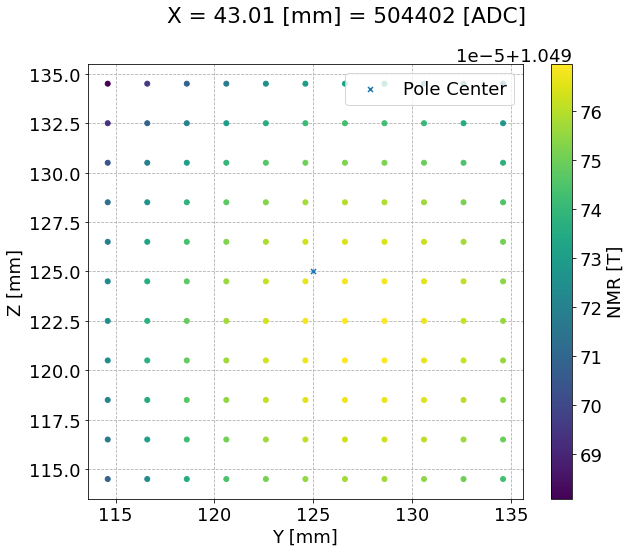

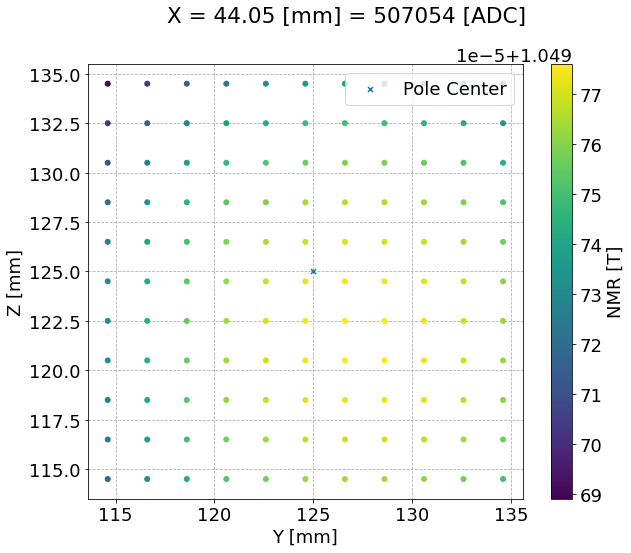

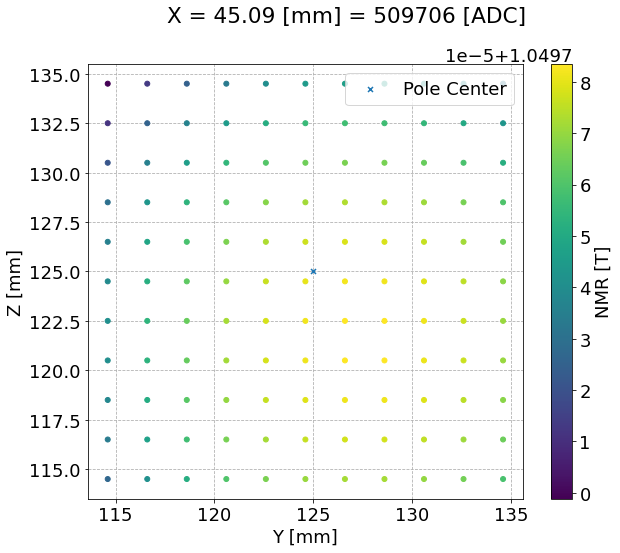

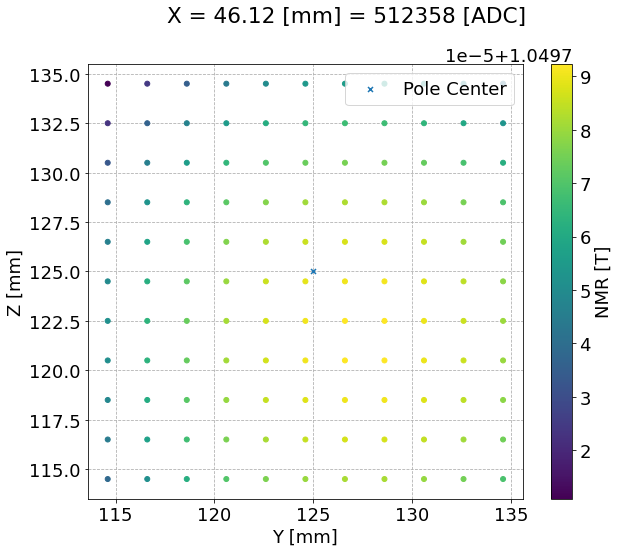

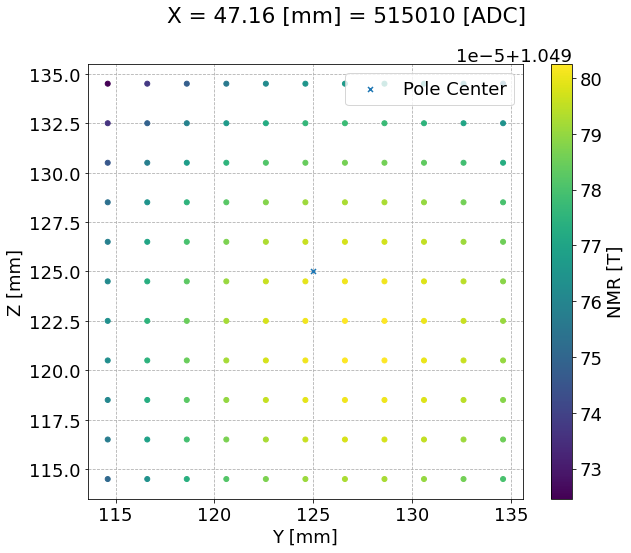

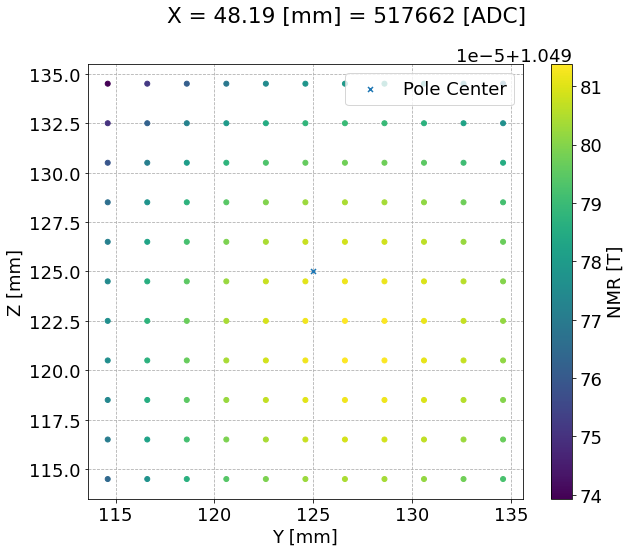

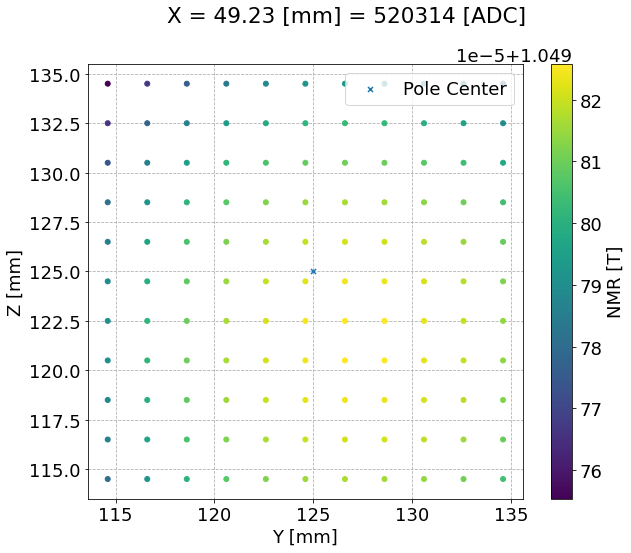

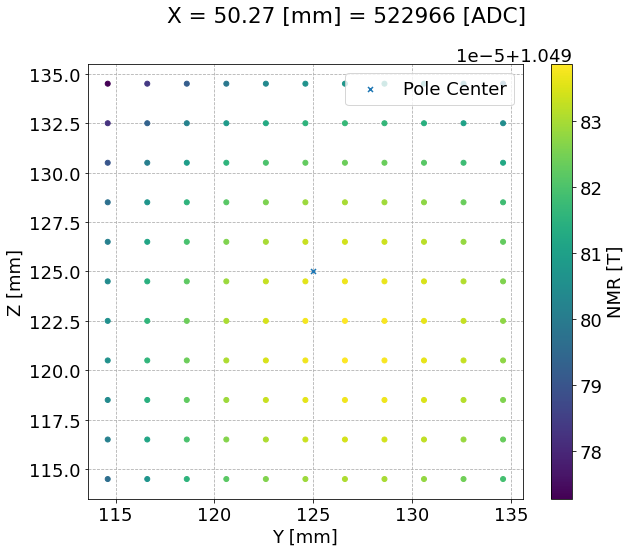

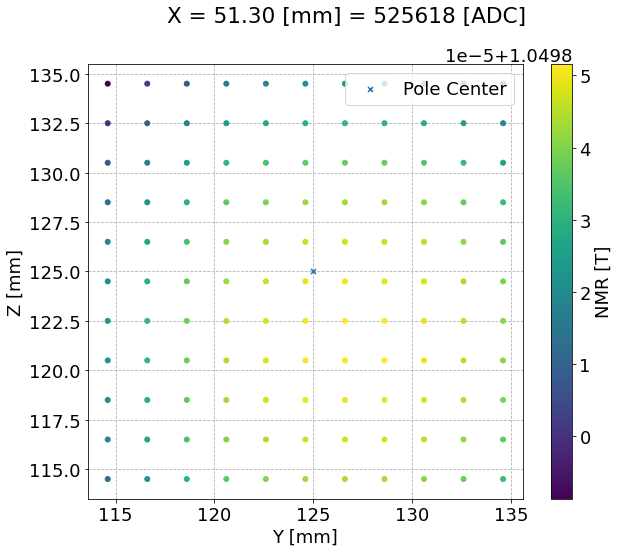

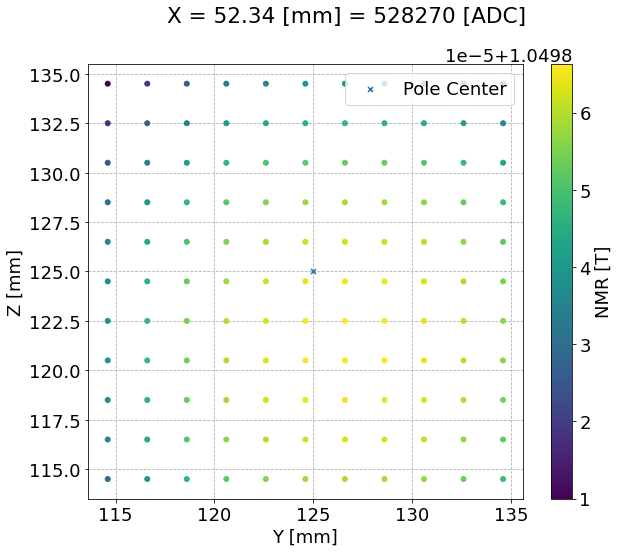

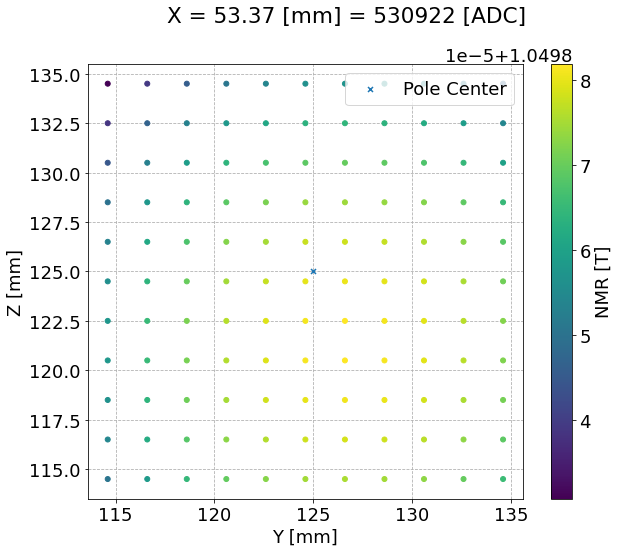

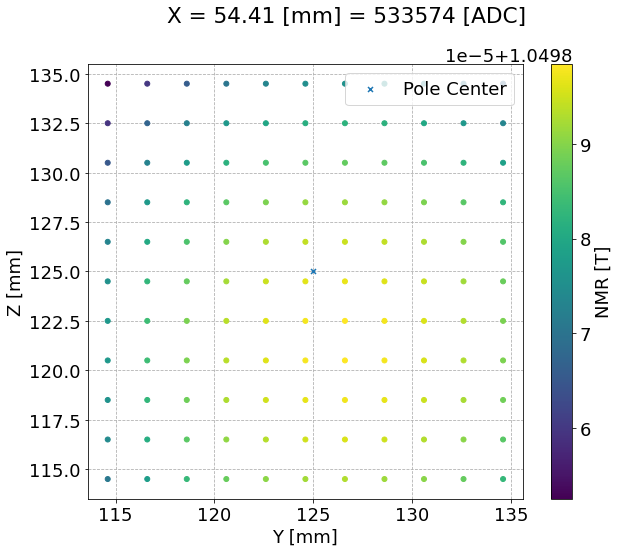

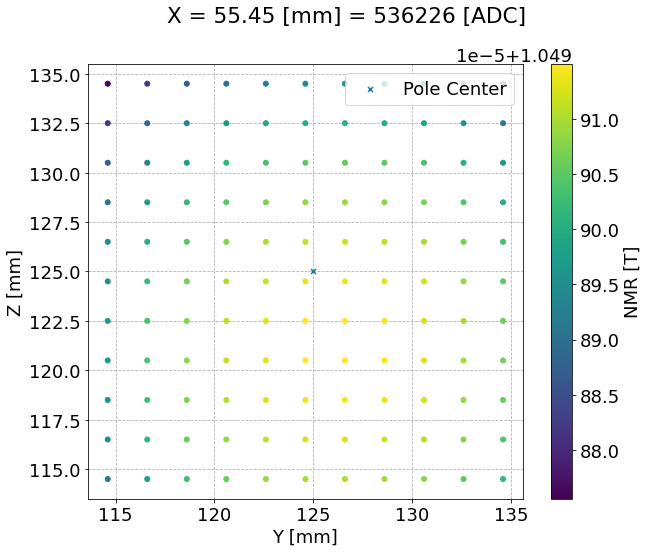

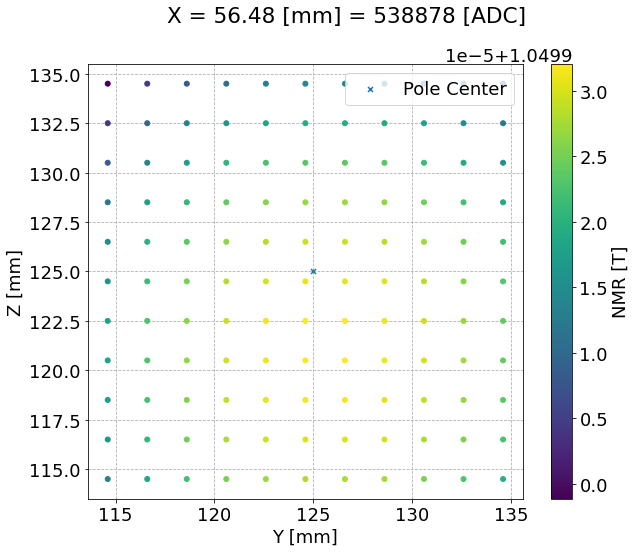

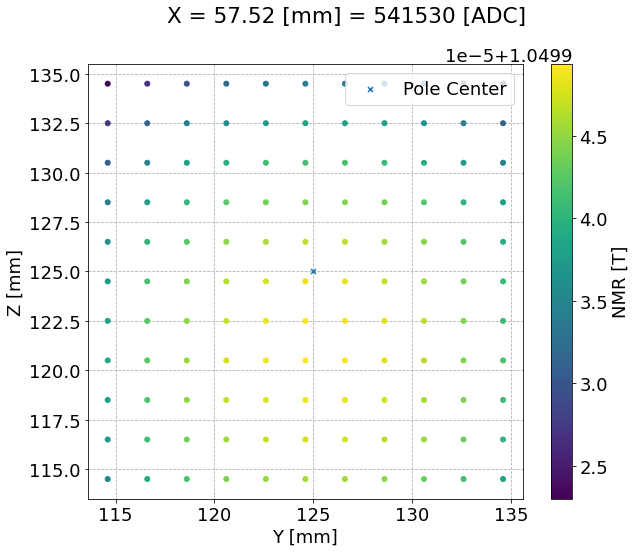

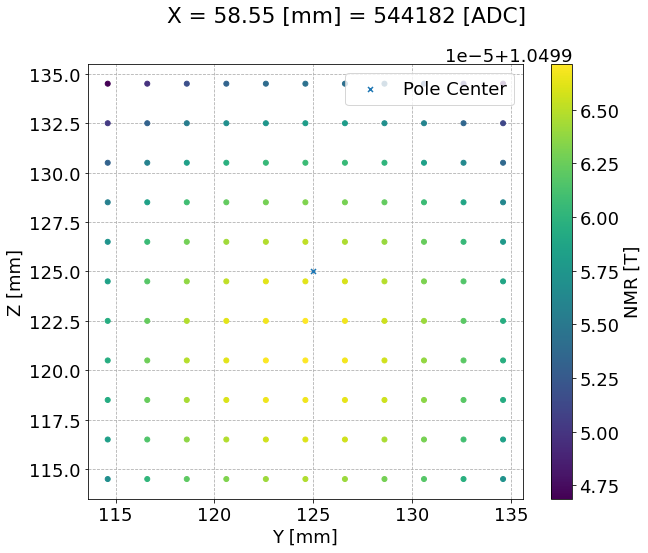

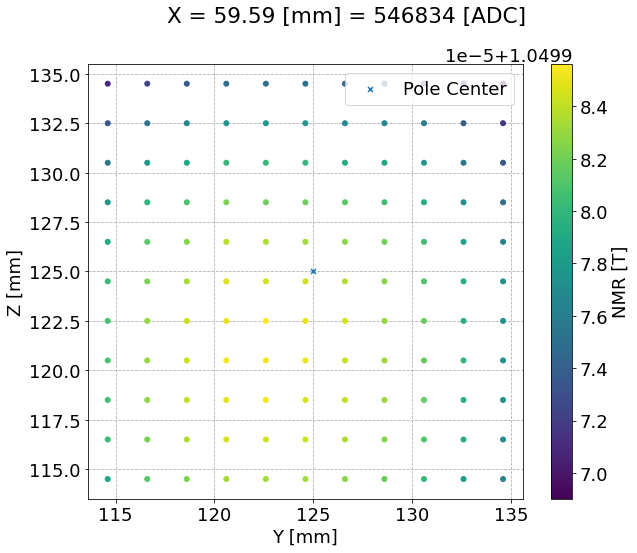

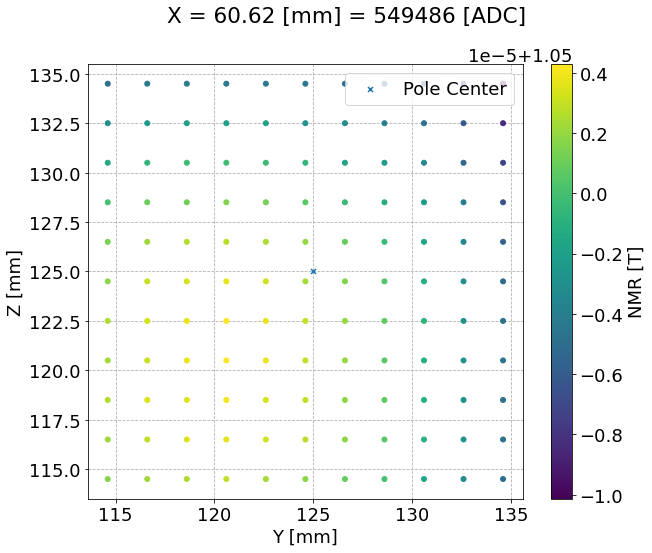

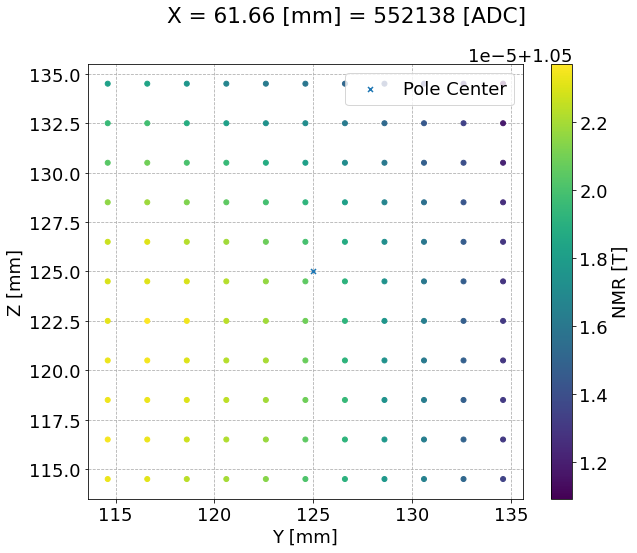

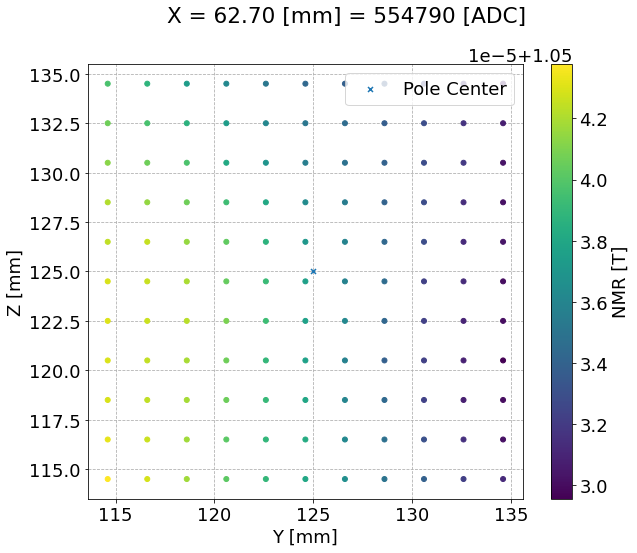

In [1100]:
for x_ in df3d_.magnet_X_mm.unique():
    fig, ax = scatter_plane(df3d_, 'X', x_, 'Y', 'Z')
    ax.scatter([125.],[125.], s=25, marker='x', label='Pole Center')
    ax.set_aspect('equal')
    ax.legend();

In [1101]:
len(df_3d), len(df3d_)

(6172, 6172)

In [1102]:
#from hallprobecalib.hpcplots import scatter3d

In [1242]:
fig = scatter3d([df3d_['magnet_X_mm']], [df3d_['magnet_Y_mm']], [df3d_['magnet_Z_mm']], [df3d_['NMR [T]']], aspect_auto=False)

In [1243]:
fig = scatter3d([df3d_['magnet_X_mm']], [df3d_['magnet_Y_mm']], [df3d_['magnet_Z_mm']], [df3d_['NMR [T]']], [''], size_list=[4], aspect_auto=False, inline=False)

In [1105]:
len(df), len(df_)

(6172, 50)

In [1106]:
len(df) - len(df_)

6122

In [1107]:
df_bad = df.query('`NMR [T]` < 1.13')

In [1108]:
len(df_bad)

6172

In [1109]:
df_bad

Time  Magnet Current [V]  \
Datetime                                                         
2021-06-16 11:41:51  6/16/2021 11:41:51 AM          192.053363   
2021-06-16 11:43:46  6/16/2021 11:43:46 AM          192.053477   
2021-06-16 11:44:01  6/16/2021 11:44:01 AM          192.053420   
2021-06-16 11:44:15  6/16/2021 11:44:15 AM          192.053420   
2021-06-16 11:44:30  6/16/2021 11:44:30 AM          192.053477   
...                                    ...                 ...   
2021-06-17 16:28:57   6/17/2021 4:28:57 PM          192.053760   
2021-06-17 16:29:13   6/17/2021 4:29:13 PM          192.053703   
2021-06-17 16:29:28   6/17/2021 4:29:28 PM          192.053760   
2021-06-17 16:29:43   6/17/2021 4:29:43 PM          192.053703   
2021-06-17 16:29:59   6/17/2021 4:29:59 PM          192.053817   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-16 11:41:51           24.303133  1.050143        0.0              0.0   
2021-06-16 11:43:46           24.302533  1.050143        0.0         422190.0   
2021-06-16 11:44:01           24.302517  1.050139        0.0         422190.0   
2021-06-16 11:44:15           24.302483  1.050135        0.0         422190.0   
2021-06-16 11:44:30           24.302550  1.050132        0.0         422190.0   
...                                 ...       ...        ...              ...   
2021-06-17 16:28:57           24.329867  1.050030        0.0         554790.0   
2021-06-17 16:29:13           24.329967  1.050030        0.0         554790.0   
2021-06-17 16:29:28           24.330083  1.050030        0.0         554790.0   
2021-06-17 16:29:43           24.330200  1.050030        0.0         554790.0   
2021-06-17 16:29:59           24.330350  1.050031        0.0         554790.0   

                     Zaber_Pattern_Y  Zaber_Pattern_Z  Zaber_Meas_Encoder_X  \
Datetime                                                                      
2021-06-16 11:41:51              0.0              0.0              422190.0   
2021-06-16 11:43:46         390569.0        1623435.0              422190.0   
2021-06-16 11:44:01         390569.0        1628555.0              422190.0   
2021-06-16 11:44:15         390569.0        1633675.0              422190.0   
2021-06-16 11:44:30         390569.0        1638795.0              422190.0   
...                              ...              ...                   ...   
2021-06-17 16:28:57         441769.0        1654155.0              554790.0   
2021-06-17 16:29:13         441769.0        1659275.0              554790.0   
2021-06-17 16:29:28         441769.0        1664395.0              554790.0   
2021-06-17 16:29:43         441769.0        1669515.0              554790.0   
2021-06-17 16:29:59         441769.0        1674635.0              554790.0   

                     Zaber_Meas_Micron_X  Zaber_Meas_Encoder_Y  \
Datetime                                                         
2021-06-16 11:41:51         164917.96875              390569.0   
2021-06-16 11:43:46         164917.96875              390569.0   
2021-06-16 11:44:01         164917.96875              390569.0   
2021-06-16 11:44:15         164917.96875              390569.0   
2021-06-16 11:44:30         164917.96875              390569.0   
...                                  ...                   ...   
2021-06-17 16:28:57         216714.84375              441769.0   
2021-06-17 16:29:13         216714.84375              441769.0   
2021-06-17 16:29:28         216714.84375              441769.0   
2021-06-17 16:29:43         216714.84375              441769.0   
2021-06-17 16:29:59         216714.84375              441769.0   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-06-16 11:41:51        152566.015625             1623435.0   
2021-06-16 11:43:46        152566.015625

In [1110]:
df['Zaber_Pattern_X'].unique()

array([     0., 422190., 424842., 427494., 430146., 432798., 435450.,
       438102., 440754., 443406., 446058., 448710., 451362., 454014.,
       456666., 459318., 461970., 464622., 467274., 469926., 472578.,
       475230., 477882., 480534., 483186., 485838., 488490., 491142.,
       493794., 496446., 499098., 501750., 504402., 507054., 509706.,
       512358., 515010., 517662., 520314., 522966., 525618., 528270.,
       530922., 533574., 536226., 538878., 541530., 544182., 546834.,
       549486., 552138., 554790.])

In [1111]:
df['magnet_Y_mm'].unique()

array([114.6, 116.6, 118.6, 120.6, 122.6, 124.6, 126.6, 128.6, 130.6,
       132.6, 134.6])

In [1112]:
df['magnet_Z_mm'].unique()

array([134.5, 132.5, 130.5, 128.5, 126.5, 124.5, 122.5, 120.5, 118.5,
       116.5, 114.5])

In [1381]:
#df_line = df_.query('(magnet_Y_mm == 125.6) & (magnet_Z_mm == 125.5)')
##df_line = df3d_.query('(magnet_Y_mm == 125.6) & (magnet_Z_mm == 125.5)')
df_line = df3d_.query('(magnet_Y_mm == 124.6) & (magnet_Z_mm == 124.5)')

In [1382]:
len(df_line)

51

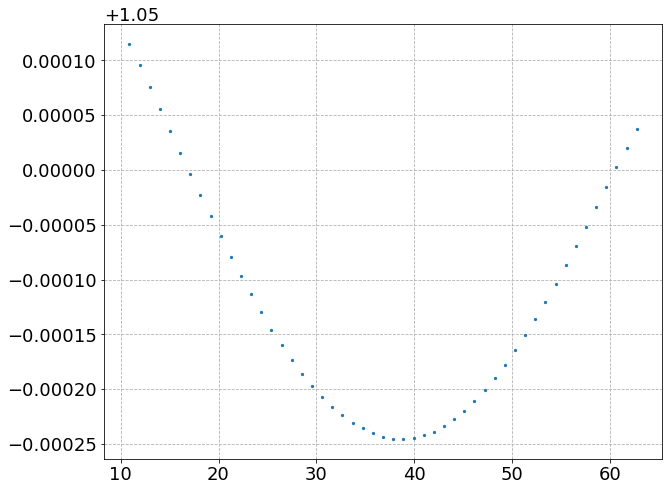

In [1383]:
fig, ax = plt.subplots()
ax.scatter(df_line['magnet_X_mm'], df_line['NMR [T]'], s=5)

In [1384]:
#df2 = load_data(ddir+'2021-06-14 104019.txt')
##df2 = load_data(ddir+'2021-06-15 073806.txt')
df2 = load_data(ddir+'2021-06-15 073806.txt')
df3 = load_data(ddir+'2021-06-16 074548.txt')
df_slow2 = load_data(ddir+'2021-06-15 073803slow.txt')
df_slow3 = load_data(ddir+'2021-06-16 074544slow.txt')

In [1410]:
#df2_ = df2.query('223 <= `Magnet Current [V]` <= 225')
#df2_ = df2.query('192 <= `Magnet Current [V]` <= 194')
df3_ = df3.query('192 <= `Magnet Current [V]` <= 194')
df2_ = df3_.loc['2021-06-16 09:00':]
df3_ = df3_.loc[:'2021-06-16 09:00']
# df3_ = df3_.loc['2021-06-16 09:00':]

In [1387]:
df3_

Time  Magnet Current [V]  \
Datetime                                                        
2021-06-16 07:45:49  6/16/2021 7:45:49 AM          192.053420   
2021-06-16 07:47:13  6/16/2021 7:47:13 AM          192.053420   
2021-06-16 07:47:34  6/16/2021 7:47:34 AM          192.053363   
2021-06-16 07:47:55  6/16/2021 7:47:55 AM          192.053307   
2021-06-16 07:48:16  6/16/2021 7:48:16 AM          192.053420   
2021-06-16 07:48:37  6/16/2021 7:48:37 AM          192.053420   
2021-06-16 07:48:58  6/16/2021 7:48:58 AM          192.053363   
2021-06-16 07:49:20  6/16/2021 7:49:20 AM          192.053137   
2021-06-16 07:49:41  6/16/2021 7:49:41 AM          192.053363   
2021-06-16 07:50:02  6/16/2021 7:50:02 AM          192.053420   
2021-06-16 07:50:23  6/16/2021 7:50:23 AM          192.053250   
2021-06-16 07:50:44  6/16/2021 7:50:44 AM          192.053420   
2021-06-16 07:51:05  6/16/2021 7:51:05 AM          192.053420   
2021-06-16 07:51:27  6/16/2021 7:51:27 AM          192.053250   
2021-06-16 07:51:48  6/16/2021 7:51:48 AM          192.053420   
2021-06-16 07:52:41  6/16/2021 7:52:41 AM          192.053420   
2021-06-16 07:53:03  6/16/2021 7:53:03 AM          192.053363   
2021-06-16 07:53:24  6/16/2021 7:53:24 AM          192.053420   
2021-06-16 07:53:45  6/16/2021 7:53:45 AM          192.053420   
2021-06-16 07:54:06  6/16/2021 7:54:06 AM          192.053420   
2021-06-16 07:54:28  6/16/2021 7:54:28 AM          192.053420   
2021-06-16 07:54:49  6/16/2021 7:54:49 AM          192.053477   
2021-06-16 07:55:10  6/16/2021 7:55:10 AM          192.053420   
2021-06-16 07:55:31  6/16/2021 7:55:31 AM          192.053420   
2021-06-16 07:55:52  6/16/2021 7:55:52 AM          192.053420   
2021-06-16 07:56:14  6/16/2021 7:56:14 AM          192.053533   
2021-06-16 07:56:35  6/16/2021 7:56:35 AM          192.053533   
2021-06-16 07:56:56  6/16/2021 7:56:56 AM          192.053590   
2021-06-16 07:57:49  6/16/2021 7:57:49 AM          192.053420   
2021-06-16 07:58:10  6/16/2021 7:58:10 AM          192.053420   
2021-06-16 07:58:31  6/16/2021 7:58:31 AM          192.053420   
2021-06-16 07:58:53  6/16/2021 7:58:53 AM          192.053420   
2021-06-16 07:59:14  6/16/2021 7:59:14 AM          192.053420   
2021-06-16 07:59:36  6/16/2021 7:59:36 AM          192.053420   
2021-06-16 07:59:57  6/16/2021 7:59:57 AM          192.053420   
2021-06-16 08:00:18  6/16/2021 8:00:18 AM          192.053363   
2021-06-16 08:00:39  6/16/2021 8:00:39 AM          192.053307   
2021-06-16 08:01:01  6/16/2021 8:01:01 AM          192.053420   
2021-06-16 08:01:22  6/16/2021 8:01:22 AM          192.053363   
2021-06-16 08:01:43  6/16/2021 8:01:43 AM          192.053307   
2021-06-16 08:02:36  6/16/2021 8:02:36 AM          192.053363   
2021-06-16 08:02:57  6/16/2021 8:02:57 AM          192.053420   
2021-06-16 08:03:18  6/16/2021 8:03:18 AM          192.053420   
2021-06-16 08:03:39  6/16/2021 8:03:39 AM          192.053420   
2021-06-16 08:04:00  6/16/2021 8:04:00 AM          192.053420   
2021-06-16 08:04:21  6/16/2021 8:04:21 AM          192.053420   
2021-06-16 08:04:42  6/16/2021 8:04:42 AM          192.053363   
2021-06-16 08:05:03  6/16/2021 8:05:03 AM          192.053420   
2021-06-16 08:05:24  6/16/2021 8:05:24 AM          192.053420   
2021-06-16 08:05:45  6/16/2021 8:05:45 AM          192.053420   
2021-06-16 08:06:06  6/16/2021 8:06:06 AM          192.053420   
2021-06-16 08:06:27  6/16/2021 8:06:27 AM          192.053420   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-16 07:45:49           24.344133  1.050077        0.0              0.0   
2021-06-16 07:47:13           24.344017  1.050068        0.0         422190.0   
2021-06-16 07:47:34           24.343950  1.050049        0.0         424842.0   
2021-06-16 07:47:55           24.343850  1.050030        0.0         427494.0   
2021-06-16 07:48:16           24.343817 

In [1388]:
df2_

Time  Magnet Current [V]  \
Datetime                                                        
2021-06-15 14:29:28  6/15/2021 2:29:28 PM          192.053080   
2021-06-15 14:29:49  6/15/2021 2:29:49 PM          192.053023   
2021-06-15 14:30:10  6/15/2021 2:30:10 PM          192.053080   
2021-06-15 14:30:31  6/15/2021 2:30:31 PM          192.053080   
2021-06-15 14:30:52  6/15/2021 2:30:52 PM          192.053137   
2021-06-15 14:31:13  6/15/2021 2:31:13 PM          192.053080   
2021-06-15 14:31:34  6/15/2021 2:31:34 PM          192.053080   
2021-06-15 14:31:55  6/15/2021 2:31:55 PM          192.053080   
2021-06-15 14:32:16  6/15/2021 2:32:16 PM          192.053080   
2021-06-15 14:32:37  6/15/2021 2:32:37 PM          192.053080   
2021-06-15 14:32:57  6/15/2021 2:32:57 PM          192.053080   
2021-06-15 14:33:18  6/15/2021 2:33:18 PM          192.053137   
2021-06-15 14:33:39  6/15/2021 2:33:39 PM          192.053137   
2021-06-15 14:34:00  6/15/2021 2:34:00 PM          192.053193   
2021-06-15 14:34:21  6/15/2021 2:34:21 PM          192.053193   
2021-06-15 14:35:13  6/15/2021 2:35:13 PM          192.053080   
2021-06-15 14:35:34  6/15/2021 2:35:34 PM          192.053080   
2021-06-15 14:35:55  6/15/2021 2:35:55 PM          192.053080   
2021-06-15 14:36:16  6/15/2021 2:36:16 PM          192.053193   
2021-06-15 14:36:37  6/15/2021 2:36:37 PM          192.053080   
2021-06-15 14:36:58  6/15/2021 2:36:58 PM          192.053137   
2021-06-15 14:37:19  6/15/2021 2:37:19 PM          192.053250   
2021-06-15 14:37:40  6/15/2021 2:37:40 PM          192.053080   
2021-06-15 14:38:02  6/15/2021 2:38:02 PM          192.053080   
2021-06-15 14:38:23  6/15/2021 2:38:23 PM          192.053193   
2021-06-15 14:38:44  6/15/2021 2:38:44 PM          192.053080   
2021-06-15 14:39:05  6/15/2021 2:39:05 PM          192.053080   
2021-06-15 14:39:26  6/15/2021 2:39:26 PM          192.053080   
2021-06-15 14:40:19  6/15/2021 2:40:19 PM          192.053080   
2021-06-15 14:40:40  6/15/2021 2:40:40 PM          192.053080   
2021-06-15 14:41:01  6/15/2021 2:41:01 PM          192.053080   
2021-06-15 14:41:22  6/15/2021 2:41:22 PM          192.053080   
2021-06-15 14:41:43  6/15/2021 2:41:43 PM          192.053023   
2021-06-15 14:42:04  6/15/2021 2:42:04 PM          192.053023   
2021-06-15 14:42:25  6/15/2021 2:42:25 PM          192.053080   
2021-06-15 14:42:46  6/15/2021 2:42:46 PM          192.053080   
2021-06-15 14:43:08  6/15/2021 2:43:08 PM          192.053080   
2021-06-15 14:43:28  6/15/2021 2:43:28 PM          192.053080   
2021-06-15 14:43:50  6/15/2021 2:43:50 PM          192.053080   
2021-06-15 14:44:11  6/15/2021 2:44:11 PM          192.053080   
2021-06-15 14:45:03  6/15/2021 2:45:03 PM          192.053080   
2021-06-15 14:45:24  6/15/2021 2:45:24 PM          192.053080   
2021-06-15 14:45:45  6/15/2021 2:45:45 PM          192.053080   
2021-06-15 14:46:06  6/15/2021 2:46:06 PM          192.053137   
2021-06-15 14:46:27  6/15/2021 2:46:27 PM          192.053137   
2021-06-15 14:46:48  6/15/2021 2:46:48 PM          192.053080   
2021-06-15 14:47:09  6/15/2021 2:47:09 PM          192.053080   
2021-06-15 14:47:30  6/15/2021 2:47:30 PM          192.053137   
2021-06-15 14:47:51  6/15/2021 2:47:51 PM          192.053080   
2021-06-15 14:48:12  6/15/2021 2:48:12 PM          192.053080   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-15 14:29:28           24.342450  1.050094        0.0         424842.0   
2021-06-15 14:29:49           24.342700  1.050075        0.0         427494.0   
2021-06-15 14:30:10           24.342950  1.050056        0.0         430146.0   
2021-06-15 14:30:31           24.343233  1.050037        0.0         432798.0   
2021-06-15 14:30:52           24.343533  1.050019        0.0         435450.0   
2021-06-15 14:31:13           24.343733  1.050000        0.0         438102.0   
2021-06-

In [1389]:
37.5 + 20., 37.5 - 20.

(57.5, 17.5)

In [1390]:
37.8 + 20., 37.8 - 20.

(57.8, 17.799999999999997)

In [1391]:
y0 = df2_.magnet_Y_mm.iloc[1]
z0 = df2_.magnet_Z_mm.iloc[1]

In [1392]:
y0, z0

(124.6, 124.5)

In [1393]:
df.index[-1]-df.index[0]

Timedelta('1 days 04:48:08')

In [1394]:
df_line["NMR [T]"].mean()

1.0498791918431374

In [1395]:
mid = df_line["NMR [T]"].mean()

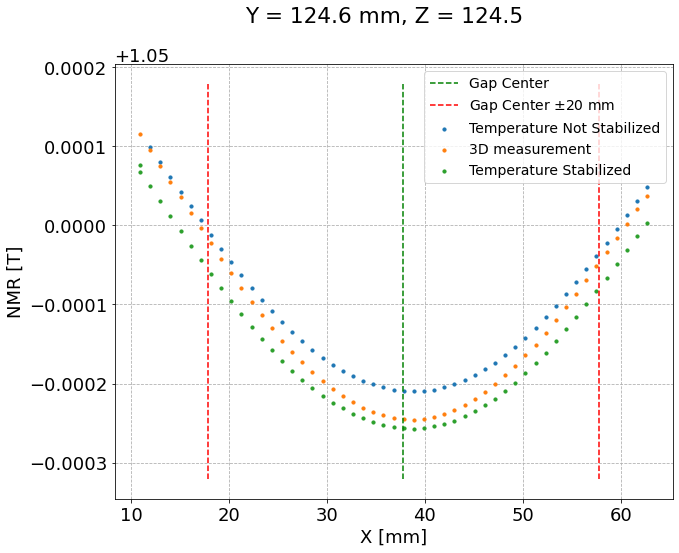

In [1411]:
fig, ax = plt.subplots()
ax.scatter(df2_['magnet_X_mm'], df2_['NMR [T]'], s=10, label='Temperature Not Stabilized')
ax.scatter(df_line['magnet_X_mm'], df_line['NMR [T]'], s=10, label='3D measurement')
ax.scatter(df3_['magnet_X_mm'], df3_['NMR [T]'], s=10, label='Temperature Stabilized')
#ax.plot([37.8, 37.8], [1.16-4e-4, 1.16+4.5e-4], 'g--', label='Gap Center')
#ax.plot([17.8, 17.8], [1.16-4e-4, 1.16+4.5e-4], 'r--', label=r'Gap Center $\pm 20$ mm')
#ax.plot([57.8, 57.8], [1.16-4e-4, 1.16+4.5e-4], 'r--')
pm = 2e-4
ax.plot([37.8, 37.8], [mid-pm, mid+pm*1.5], 'g--', label='Gap Center')
ax.plot([17.8, 17.8], [mid-pm, mid+pm*1.5], 'r--', label=r'Gap Center $\pm 20$ mm')
ax.plot([57.8, 57.8], [mid-pm, mid+pm*1.5], 'r--')

ax.set_xlabel('X [mm]')
ax.set_ylabel('NMR [T]')
fig.suptitle(f'Y = {y0} mm, Z = {z0}')
ax.legend(fontsize=14, loc='best');
# fig.savefig(plotdir+'pole_to_pole_comparison.pdf', facecolor='white', transparent=False)
# fig.savefig(plotdir+'pole_to_pole_comparison.png', facecolor='white', transparent=False)
fig.savefig('pole_to_pole_comparison.pdf', facecolor='white', transparent=False)
fig.savefig('pole_to_pole_comparison.png', facecolor='white', transparent=False)

In [1422]:
df2_.index[-1], df_line.index[0]

(Timestamp('2021-06-16 11:28:54'), Timestamp('2021-06-16 11:59:43'))

In [1397]:
df_line.index[0]

Timestamp('2021-06-16 11:59:43')

In [1398]:
df_3d.loc[df_line.index[0]]['NMR [T]']

1.050115291

In [1399]:
def find_neighbours_index(value, df):
#     exactmatch = df[df.index == value]
#     if not exactmatch.empty:
#         return exactmatch.index
#     else:
    lowerneighbour_ind = df[df.index < value].index[-1]#.idxmax()
    upperneighbour_ind = df[df.index > value].index[0]#.idxmin()
    return [lowerneighbour_ind, upperneighbour_ind] 

def interp_val(time, df, interp_col):
    xi, xf = find_neighbours_index(time, df)
    yi, yf = [df.loc[x_][interp_col] for x_ in [xi, xf]]
    return yi + (time-xi) / (xf-xi) * (yf-yi)

In [1400]:
xi, xf = find_neighbours_index(df_line.index[0], df_slow)
xi, xf

(Timestamp('2021-06-16 11:53:55'), Timestamp('2021-06-16 12:03:55'))

In [1401]:
interp_val(df_line.index[0], df_slow, 'Yoke (center magnet)')

23.749517482

In [1402]:
df_slow.loc[xi]['Yoke (center magnet)'], df_slow.loc[xf]['Yoke (center magnet)']

(23.746233, 23.7518959)

In [1403]:
[(i-df_line.index[0]).total_seconds()/60. for i in find_neighbours_index(df_line.index[0], df_slow)]

[-5.8, 4.2]

In [1404]:
df_line['Yoke (center magnet)'] = [interp_val(i, df_slow, 'Yoke (center magnet)') for i in df_line.index]
df2_['Yoke (center magnet)'] = [interp_val(i, df_slow2, 'Yoke (center magnet)') for i in df2_.index]
df3_['Yoke (center magnet)'] = [interp_val(i, df_slow3, 'Yoke (center magnet)') for i in df3_.index]

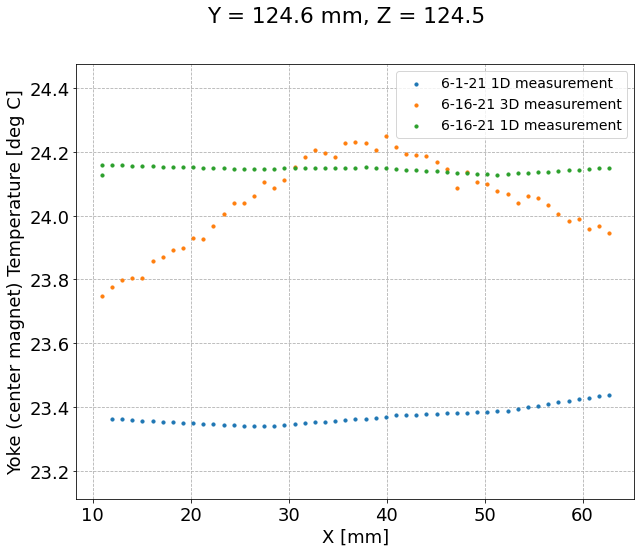

In [1405]:
fig, ax = plt.subplots()
ax.scatter(df2_['magnet_X_mm'], df2_['Yoke (center magnet)'], s=10, label='6-1-21 1D measurement')
ax.scatter(df_line['magnet_X_mm'], df_line['Yoke (center magnet)'], s=10, label='6-16-21 3D measurement')
ax.scatter(df3_['magnet_X_mm'], df3_['Yoke (center magnet)'], s=10, label='6-16-21 1D measurement')
# ax.plot([37.8, 37.8], [23, 24], 'g--', label='Gap Center')
# ax.plot([17.8, 17.8], [mid-4e-4, mid+4.5e-4], 'r--', label=r'Gap Center $\pm 20$ mm')
# ax.plot([57.8, 57.8], [mid-4e-4, mid+4.5e-4], 'r--')
all_temps = np.concatenate([_['Yoke (center magnet)'] for _ in [df_line, df2_, df3_]])
tma = np.max(all_temps)
tmi = np.min(all_temps)
tra = tma - tmi

ax.set_ylim([tmi-0.25*tra, tma+0.25*tra])

ax.set_xlabel('X [mm]')
ax.set_ylabel('Yoke (center magnet) Temperature [deg C]')
fig.suptitle(f'Y = {y0} mm, Z = {z0}')
ax.legend(fontsize=14, loc='best');
fig.savefig('pole_to_pole_temp_comparison.pdf', facecolor='white', transparent=False)
fig.savefig('pole_to_pole_temp_comparison.png', facecolor='white', transparent=False)

In [1408]:
B_on_T = -6e-5 # Tesla / deg
#B_corr = B_on_T * (df_line['Yoke (center magnet)']-df2_['Yoke (center magnet)'].iloc[-1])
B_corr = B_on_T * (df_line['Yoke (center magnet)']-df3_['Yoke (center magnet)'].iloc[-1])
df_line['NMR_corr'] = df_line['NMR [T]'] - B_corr

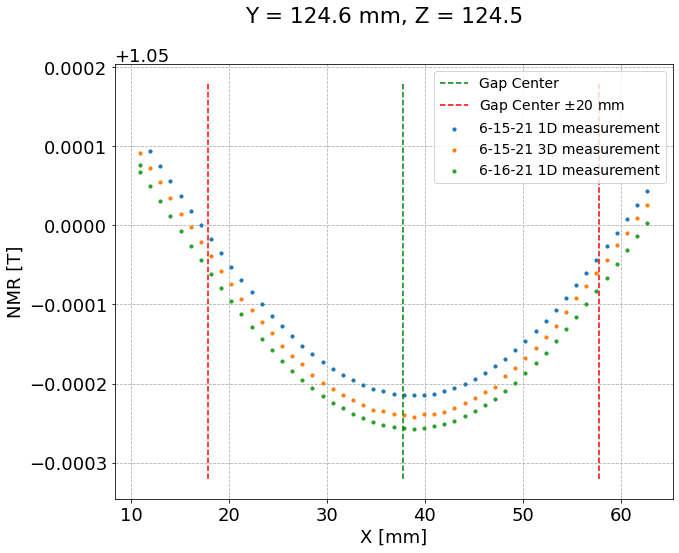

In [1409]:
fig, ax = plt.subplots()
ax.scatter(df2_['magnet_X_mm'], df2_['NMR [T]'], s=10, label='6-15-21 1D measurement')
ax.scatter(df_line['magnet_X_mm'], df_line['NMR_corr'], s=10, label='6-15-21 3D measurement')
ax.scatter(df3_['magnet_X_mm'], df3_['NMR [T]'], s=10, label='6-16-21 1D measurement')
#ax.plot([37.8, 37.8], [1.16-4e-4, 1.16+4.5e-4], 'g--', label='Gap Center')
#ax.plot([17.8, 17.8], [1.16-4e-4, 1.16+4.5e-4], 'r--', label=r'Gap Center $\pm 20$ mm')
#ax.plot([57.8, 57.8], [1.16-4e-4, 1.16+4.5e-4], 'r--')

pm = 2e-4
ax.plot([37.8, 37.8], [mid-pm, mid+pm*1.5], 'g--', label='Gap Center')
ax.plot([17.8, 17.8], [mid-pm, mid+pm*1.5], 'r--', label=r'Gap Center $\pm 20$ mm')
ax.plot([57.8, 57.8], [mid-pm, mid+pm*1.5], 'r--')


ax.set_xlabel('X [mm]')
ax.set_ylabel('NMR [T]')
fig.suptitle(f'Y = {y0} mm, Z = {z0}')
ax.legend(fontsize=14, loc='best');
fig.savefig('temp_corrected_pole_to_pole_comparison.pdf', facecolor='white', transparent=False)
fig.savefig('temp_corrected_pole_to_pole_comparison.png', facecolor='white', transparent=False)

In [1283]:
B_corr

Datetime
2021-06-15 14:59:37   -0.000002
2021-06-15 15:10:17   -0.000005
2021-06-15 15:20:56   -0.000008
2021-06-15 15:31:35   -0.000009
2021-06-15 15:42:15   -0.000011
2021-06-15 15:52:58   -0.000015
2021-06-15 16:04:10   -0.000013
2021-06-15 16:14:51   -0.000017
2021-06-15 16:25:31   -0.000020
2021-06-15 16:36:11   -0.000020
2021-06-15 16:46:50   -0.000021
2021-06-15 16:57:30   -0.000024
2021-06-15 17:08:13   -0.000022
2021-06-15 17:19:24   -0.000024
2021-06-15 17:30:04   -0.000026
2021-06-15 17:40:44   -0.000029
2021-06-15 17:51:23   -0.000029
2021-06-15 18:02:04   -0.000031
2021-06-15 18:12:43   -0.000031
2021-06-15 18:23:22   -0.000033
2021-06-15 18:34:36   -0.000034
2021-06-15 18:45:22   -0.000035
2021-06-15 18:56:03   -0.000033
2021-06-15 19:06:39   -0.000035
2021-06-15 19:17:19   -0.000038
2021-06-15 19:27:59   -0.000037
2021-06-15 19:39:10   -0.000037
2021-06-15 19:49:50   -0.000039
2021-06-15 20:00:30   -0.000040
2021-06-15 20:11:08   -0.000041
2021-06-15 20:21:46   -0.000043

In [823]:
yc = df_slow['Yoke (center magnet)']
yc.max() - yc.min()

0.48492239999999853

In [828]:
(yc.max() - yc.min()) * 5e-5

2.424611999999993e-05

In [827]:
mc = df_3d['Magnet Current [V]']
mc.max() - mc.min()

0.0005666670000152862

In [829]:
(mc.max() - mc.min()) * 1e-3

5.666670000152862e-07

In [108]:
idx = df2_['NMR [T]'].argmin()

In [109]:
df2_.iloc[idx]

Time                    6/15/2021 7:48:47 AM
Magnet Current [V]                 224.06119
Magnet Voltage [V]                 29.201067
NMR [T]                             1.159672
NMR [FFT]                                0.0
Zaber_Pattern_X                     491142.0
Zaber_Pattern_Y                     416169.0
Zaber_Pattern_Z                    1649035.0
Zaber_Meas_Encoder_X                491142.0
Zaber_Meas_Micron_X             191852.34375
Zaber_Meas_Encoder_Y                416169.0
Zaber_Meas_Micron_Y            162566.015625
Zaber_Meas_Encoder_Z               1649035.0
Zaber_Meas_Micron_Z            644154.296875
seconds_delta                          640.0
hours_delta                         0.177778
days_delta                          0.007407
magnet_X_mm                        37.834375
magnet_Y_mm                            124.6
magnet_Z_mm                            124.5
Name: 2021-06-15 07:48:47, dtype: object

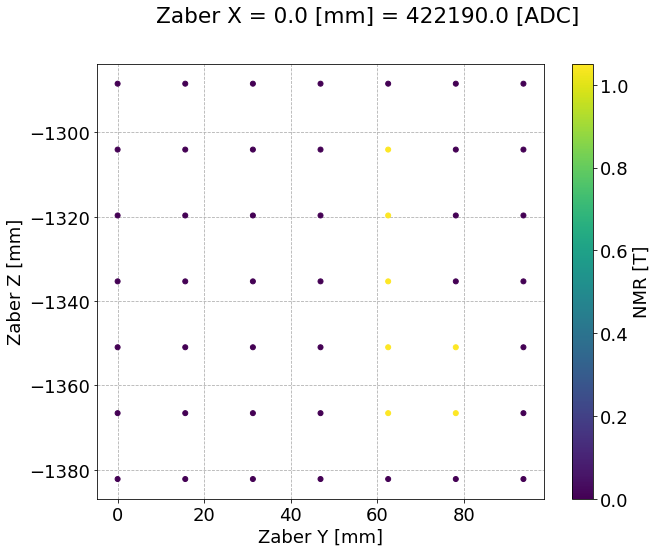

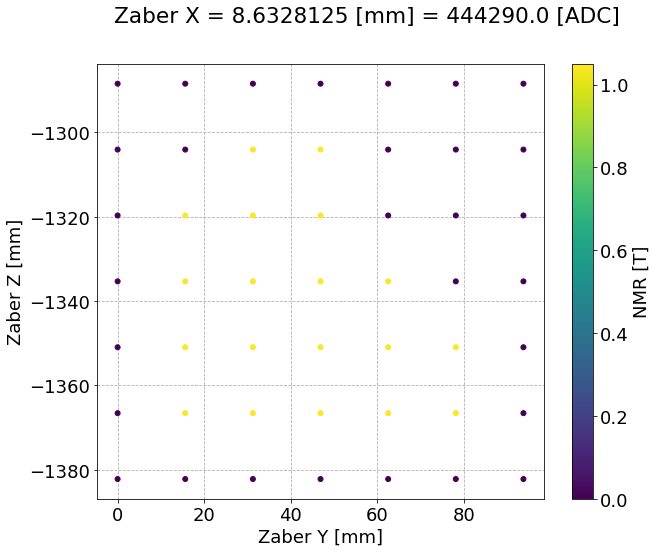

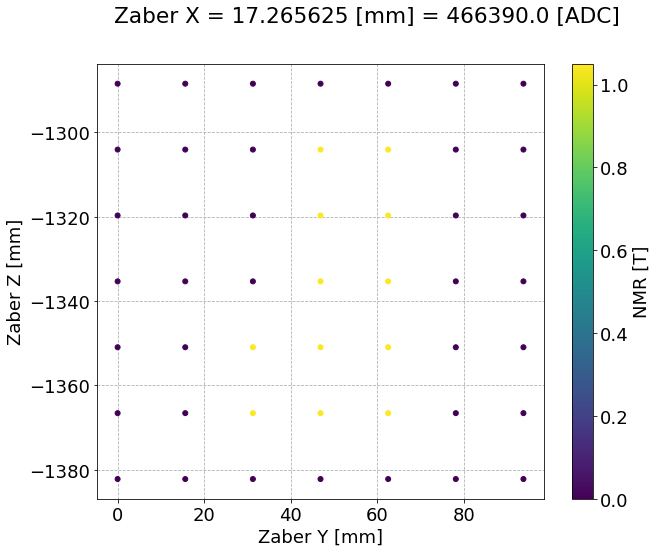

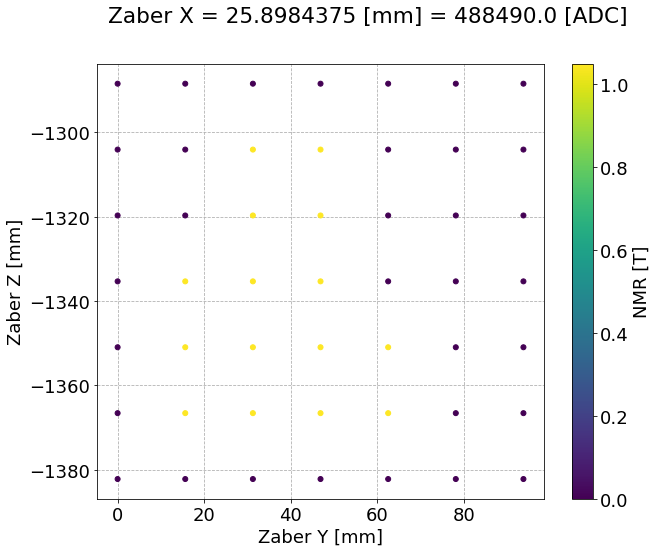

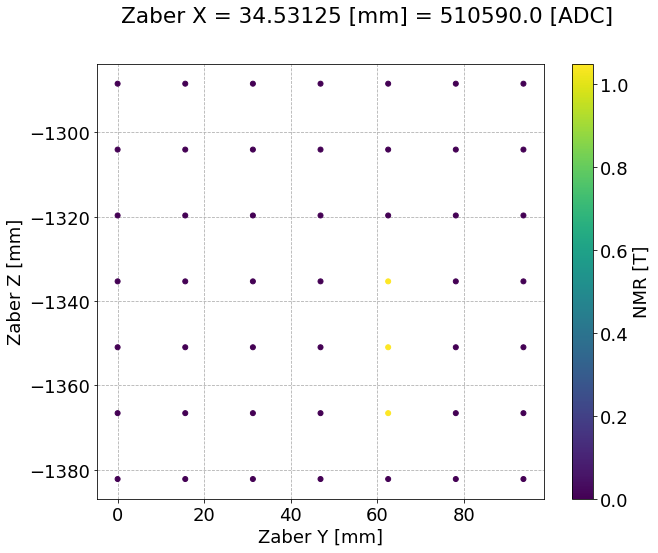

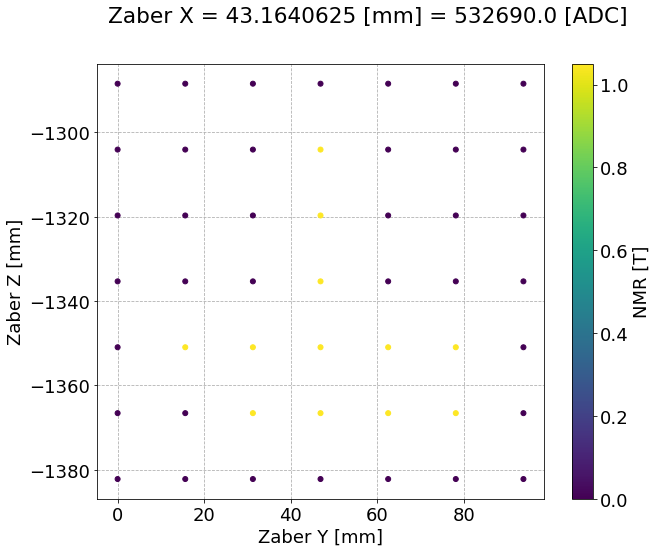

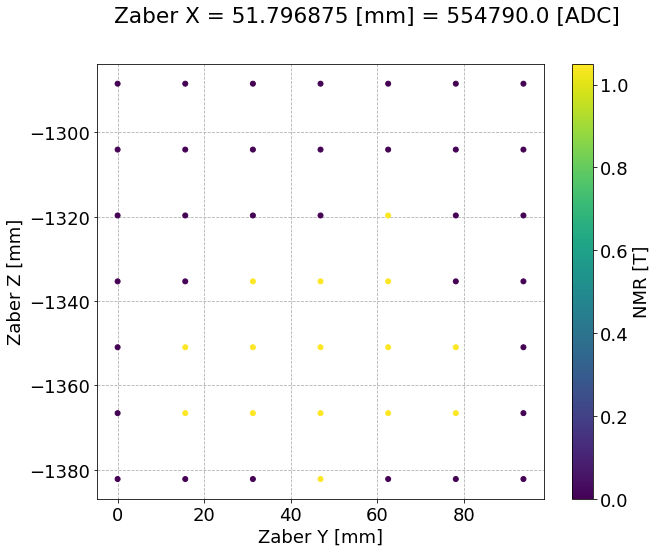

In [279]:
for xval in df['Zaber_Pattern_X'].unique():
    fig, ax = plot_xplane(df, xval, f'{plotdir_pattern}xslices/NMR_vs_Z_vs_Y_{int(xval):d}')

# 1D Data, side by side

In [136]:
# Load, Combine, Transform

In [908]:
df_6_14 = load_data(ddir+patternfile)
df_slow_6_14 = load_data(ddir+slowfile)
df_6_15 = load_data(ddir+patternfile_6_15)
df_slow_6_15 = load_data(ddir+slowfile_6_15)
df_6_16 = load_data(ddir+patternfile_6_16)
df_slow_6_16 = load_data(ddir+slowfile_6_16)

In [909]:
df_6_15

Time  Magnet Current [V]  \
Datetime                                                        
2021-06-15 07:38:07  6/15/2021 7:38:07 AM          224.061133   
2021-06-15 07:39:14  6/15/2021 7:39:14 AM          224.061360   
2021-06-15 07:39:35  6/15/2021 7:39:35 AM          224.061247   
2021-06-15 07:39:56  6/15/2021 7:39:56 AM          224.061303   
2021-06-15 07:40:17  6/15/2021 7:40:17 AM          224.061360   
...                                   ...                 ...   
2021-06-15 14:46:48  6/15/2021 2:46:48 PM          192.053080   
2021-06-15 14:47:09  6/15/2021 2:47:09 PM          192.053080   
2021-06-15 14:47:30  6/15/2021 2:47:30 PM          192.053137   
2021-06-15 14:47:51  6/15/2021 2:47:51 PM          192.053080   
2021-06-15 14:48:12  6/15/2021 2:48:12 PM          192.053080   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-15 07:38:07           29.205083  1.160179        0.0              0.0   
2021-06-15 07:39:14           29.204067  1.160174        0.0         422190.0   
2021-06-15 07:39:35           29.203917  1.160143        0.0         424842.0   
2021-06-15 07:39:56           29.203850  1.160112        0.0         427494.0   
2021-06-15 07:40:17           29.203833  1.160081        0.0         430146.0   
...                                 ...       ...        ...              ...   
2021-06-15 14:46:48           24.356000  1.049973        0.0         544182.0   
2021-06-15 14:47:09           24.356267  1.049991        0.0         546834.0   
2021-06-15 14:47:30           24.356533  1.050008        0.0         549486.0   
2021-06-15 14:47:51           24.356800  1.050026        0.0         552138.0   
2021-06-15 14:48:12           24.357050  1.050043        0.0         554790.0   

                     Zaber_Pattern_Y  Zaber_Pattern_Z  Zaber_Meas_Encoder_X  \
Datetime                                                                      
2021-06-15 07:38:07              0.0              0.0              422190.0   
2021-06-15 07:39:14         416169.0        1649035.0              422190.0   
2021-06-15 07:39:35         416169.0        1649035.0              424842.0   
2021-06-15 07:39:56         416169.0        1649035.0              427494.0   
2021-06-15 07:40:17         416169.0        1649035.0              430146.0   
...                              ...              ...                   ...   
2021-06-15 14:46:48         416169.0        1649035.0              544182.0   
2021-06-15 14:47:09         416169.0        1649035.0              546834.0   
2021-06-15 14:47:30         416169.0        1649035.0              549486.0   
2021-06-15 14:47:51         416169.0        1649035.0              552138.0   
2021-06-15 14:48:12         416169.0        1649035.0              554790.0   

                     Zaber_Meas_Micron_X  Zaber_Meas_Encoder_Y  \
Datetime                                                         
2021-06-15 07:38:07         164917.96875              403369.0   
2021-06-15 07:39:14         164917.96875              416169.0   
2021-06-15 07:39:35         165953.90625              416169.0   
2021-06-15 07:39:56         166989.84375              416169.0   
2021-06-15 07:40:17         168025.78125              416169.0   
...                                  ...                   ...   
2021-06-15 14:46:48         212571.09375              416169.0   
2021-06-15 14:47:09         213607.03125              416169.0   
2021-06-15 14:47:30         214642.96875              416169.0   
2021-06-15 14:47:51         215678.90625              416169.0   
2021-06-15 14:48:12         216714.84375              416169.0   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-06-15 07:38:07        157566.015625             1636235.0   
2021-06-15 07:39:14        162566.015625            

In [910]:
df_6_16

Time  Magnet Current [V]  \
Datetime                                                         
2021-06-16 07:45:49   6/16/2021 7:45:49 AM          192.053420   
2021-06-16 07:47:13   6/16/2021 7:47:13 AM          192.053420   
2021-06-16 07:47:34   6/16/2021 7:47:34 AM          192.053363   
2021-06-16 07:47:55   6/16/2021 7:47:55 AM          192.053307   
2021-06-16 07:48:16   6/16/2021 7:48:16 AM          192.053420   
...                                    ...                 ...   
2021-06-16 11:27:30  6/16/2021 11:27:30 AM          192.053420   
2021-06-16 11:27:51  6/16/2021 11:27:51 AM          192.053477   
2021-06-16 11:28:12  6/16/2021 11:28:12 AM          192.053590   
2021-06-16 11:28:33  6/16/2021 11:28:33 AM          192.053420   
2021-06-16 11:28:54  6/16/2021 11:28:54 AM          192.053477   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-16 07:45:49           24.344133  1.050077        0.0              0.0   
2021-06-16 07:47:13           24.344017  1.050068        0.0         422190.0   
2021-06-16 07:47:34           24.343950  1.050049        0.0         424842.0   
2021-06-16 07:47:55           24.343850  1.050030        0.0         427494.0   
2021-06-16 07:48:16           24.343817  1.050012        0.0         430146.0   
...                                 ...       ...        ...              ...   
2021-06-16 11:27:30           24.305517  1.049978        0.0         544182.0   
2021-06-16 11:27:51           24.305533  1.049995        0.0         546834.0   
2021-06-16 11:28:12           24.305533  1.050013        0.0         549486.0   
2021-06-16 11:28:33           24.305517  1.050031        0.0         552138.0   
2021-06-16 11:28:54           24.305517  1.050048        0.0         554790.0   

                     Zaber_Pattern_Y  Zaber_Pattern_Z  Zaber_Meas_Encoder_X  \
Datetime                                                                      
2021-06-16 07:45:49              0.0              0.0              422190.0   
2021-06-16 07:47:13         416169.0        1649035.0              422190.0   
2021-06-16 07:47:34         416169.0        1649035.0              424842.0   
2021-06-16 07:47:55         416169.0        1649035.0              427494.0   
2021-06-16 07:48:16         416169.0        1649035.0              430146.0   
...                              ...              ...                   ...   
2021-06-16 11:27:30         416169.0        1649035.0              544182.0   
2021-06-16 11:27:51         416169.0        1649035.0              546834.0   
2021-06-16 11:28:12         416169.0        1649035.0              549486.0   
2021-06-16 11:28:33         416169.0        1649035.0              552138.0   
2021-06-16 11:28:54         416169.0        1649035.0              554790.0   

                     Zaber_Meas_Micron_X  Zaber_Meas_Encoder_Y  \
Datetime                                                         
2021-06-16 07:45:49         164917.96875              416169.0   
2021-06-16 07:47:13         164917.96875              416169.0   
2021-06-16 07:47:34         165953.90625              416169.0   
2021-06-16 07:47:55         166989.84375              416169.0   
2021-06-16 07:48:16         168025.78125              416169.0   
...                                  ...                   ...   
2021-06-16 11:27:30         212571.09375              416169.0   
2021-06-16 11:27:51         213607.03125              416169.0   
2021-06-16 11:28:12         214642.96875              416169.0   
2021-06-16 11:28:33         215678.90625              416169.0   
2021-06-16 11:28:54         216714.84375              416169.0   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-06-16 07:45:49        162566.015625             1649035.0   
2021-06-16 07:47:13        162566.015625

In [911]:
# currents_6_14 = [224.]
# currents_6_15 = np.array([224., 128., 144., 160., 176.])
##currents_6_15 = np.array([128., 144., 160., 176., 224.])
currents_6_15 = np.array([128., 144., 160., 176., 192., 224.])
# currents_6_15 = np.array([224., 128., 144., 160., 176., 192.])
currents_6_16 = np.array([192., 208.])

In [921]:
df_[df_.index == '2021-06-16 10:01:02']

Time  Magnet Current [V]  \
Datetime                                                         
2021-06-16 10:01:02  6/16/2021 10:01:02 AM           208.05739   

                     Magnet Voltage [V]   NMR [T]  NMR [FFT]  Zaber_Pattern_X  \
Datetime                                                                        
2021-06-16 10:01:02           26.595233  1.108116        0.0         491142.0   

                     Zaber_Pattern_Y  Zaber_Pattern_Z  Zaber_Meas_Encoder_X  \
Datetime                                                                      
2021-06-16 10:01:02         416169.0        1649035.0              491142.0   

                     Zaber_Meas_Micron_X  Zaber_Meas_Encoder_Y  \
Datetime                                                         
2021-06-16 10:01:02         191852.34375              416169.0   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-06-16 10:01:02        162566.015625             1649035.0   

                     Zaber_Meas_Micron_Z  seconds_delta  hours_delta  \
Datetime                                                               
2021-06-16 10:01:02        644154.296875         8113.0     2.253611   

                     days_delta  magnet_X_mm  magnet_Y_mm  magnet_Z_mm  
Datetime                                                                
2021-06-16 10:01:02      0.0939    37.834375        124.6        124.5

In [926]:
dI = 3.
B_fracs = []
B_vals = []
x_mms = []
for I in currents_6_15:
    df_ = df_6_15.query(f'{I-dI} < `Magnet Current [V]` < {I+dI}').copy() # fix label [V] to [A]
    nmr_m = df_['NMR [T]'].mean()
    dnmr = 5e-3
    df_ = df_.query(f'abs(`NMR [T]`-{nmr_m}) > - {dnmr}').copy()
    B_frac_ = (df_['NMR [T]'] / df_.iloc[0]['NMR [T]']).values
#     B_frac = (df_['NMR [T]'] / df_[df_.index == '2021-06-16 10:01:02']['NMR [T]'])
    B_val_ = df_['NMR [T]']
    x_mm_ = df_['magnet_X_mm'].values
    B_fracs.append(B_frac_)
    B_vals.append(B_val_)
    x_mms.append(x_mm_)

In [927]:
dI = 3.
B_fracs2 = []
B_vals2 = []
x_mms2 = []
for I in currents_6_16:
    df_ = df_6_16.query(f'{I-dI} < `Magnet Current [V]` < {I+dI}').copy() # fix label [V] to [A]
    nmr_m = df_['NMR [T]'].mean()
    dnmr = 5e-3
    df_ = df_.query(f'abs(`NMR [T]`-{nmr_m}) > - {dnmr}').copy()
    B_frac_ = (df_['NMR [T]'] / df_.iloc[0]['NMR [T]']).values
#     B_frac = (df_['NMR [T]'] / df_[df_.index == '2021-06-16 10:01:02']['NMR [T]'])
    B_val_ = df_['NMR [T]']
    x_mm_ = df_['magnet_X_mm'].values
    B_fracs2.append(B_frac_)
    B_vals2.append(B_val_)
    x_mms2.append(x_mm_)

In [928]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

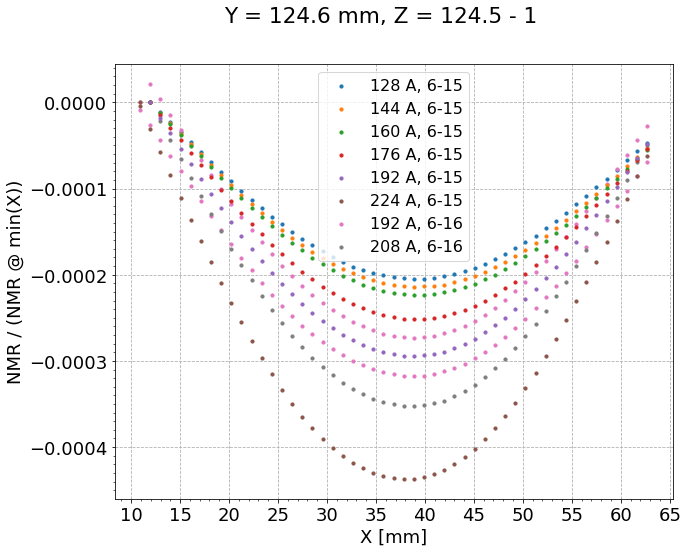

In [1423]:
fig, ax = plt.subplots()
for index, _ in enumerate(zip(currents_6_15, B_fracs, x_mms)):
    I, B, x = _
    ax.scatter(x, B-1, s=10, zorder=index+10, label=f'{int(I):d} A, 6-15')
    
for index, _ in enumerate(zip(currents_6_16, B_fracs2, x_mms2)):
    I, B, x = _
    ax.scatter(x, B-1, s=10, zorder=index+10, label=f'{int(I):d} A, 6-16')

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1e-5))
ax.set_xlabel('X [mm]')
ax.set_ylabel('NMR / (NMR @ min(X))')
fig.suptitle(f'Y = {y0} mm, Z = {z0} - 1 ')
ax.legend(fontsize=16, loc='best').set_zorder(100);

In [160]:
[np.max(B) for B in B_fracs]

[1.0, 1.0, 1.0, 1.0, 1.0]

In [161]:
[np.min(B) for B in B_fracs]

[0.9995629528512809,
 0.9997951203103804,
 0.999786199785313,
 0.9997768410023578,
 0.9997483732715875]

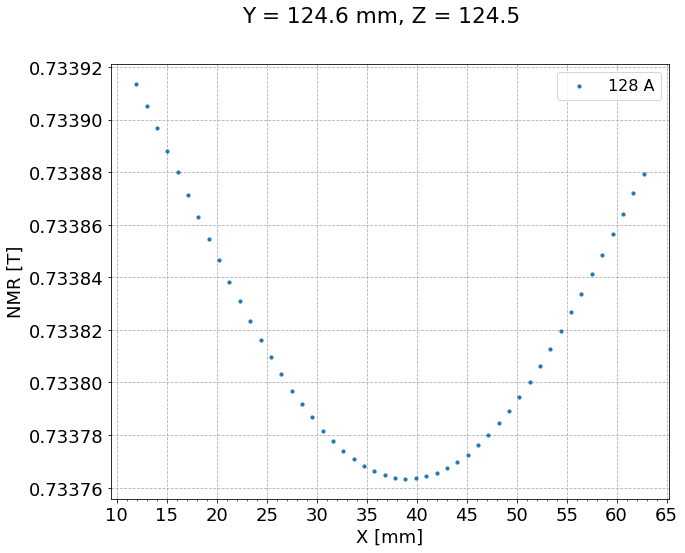

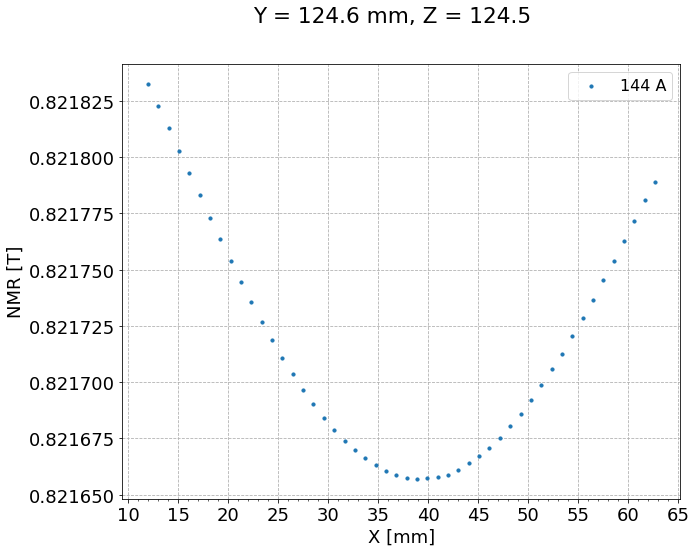

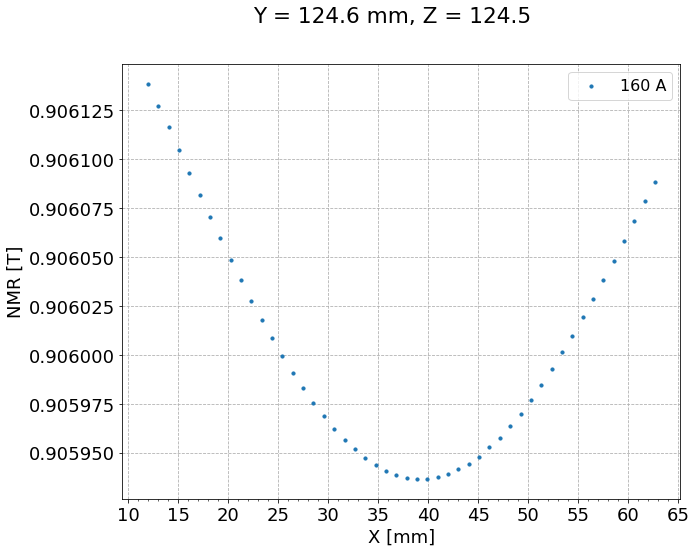

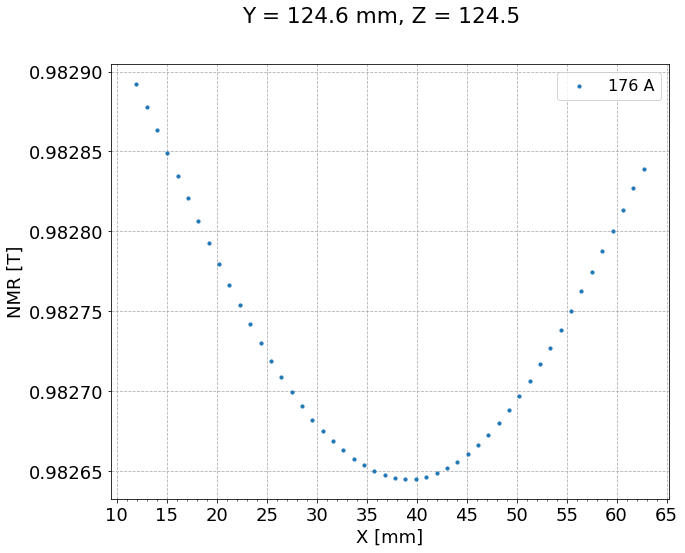

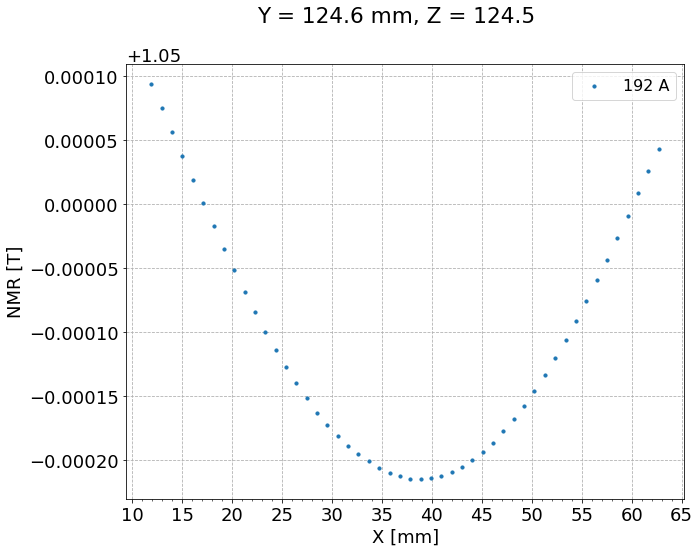

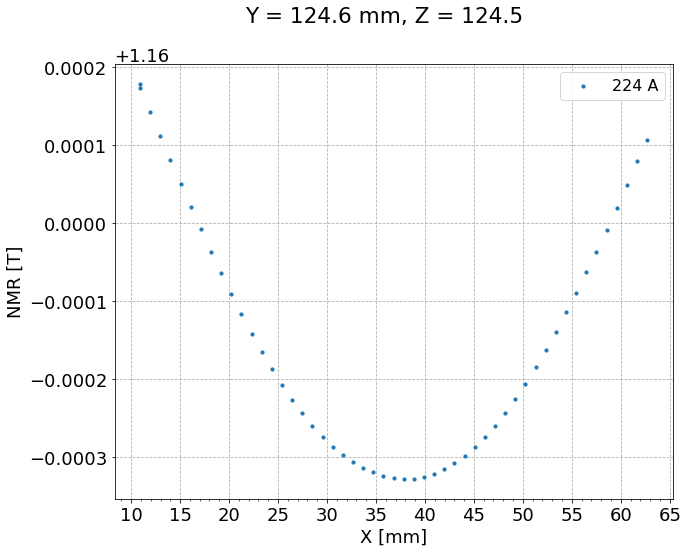

In [337]:
for index, _ in enumerate(zip(currents_6_15, B_vals, x_mms)):
    I, B, x = _
    fig, ax = plt.subplots()
    ax.scatter(x, B, s=10, zorder=index+10, label=f'{int(I):d} A')
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
#     ax.yaxis.set_minor_locator(MultipleLocator(1e-5))
    ax.set_xlabel('X [mm]')
    ax.set_ylabel('NMR [T]')
    fig.suptitle(f'Y = {y0} mm, Z = {z0}')
    ax.legend(fontsize=16, loc='best').set_zorder(100);